In [1]:
#ノイズの入ったヒートマップ削除

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
import os
from PIL import Image
if torch.cuda.is_available():
    print(torch.cuda.device_count())
device = torch.device("cuda:1")
print(device)
import glob
import re
import json
import seaborn
from pathlib import Path
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
import pandas as pd

3
cuda:1


/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_171919.jpg


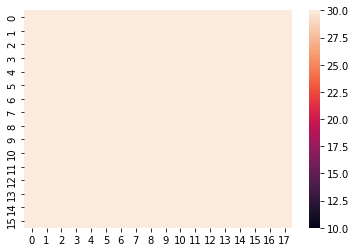

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_135928.jpg


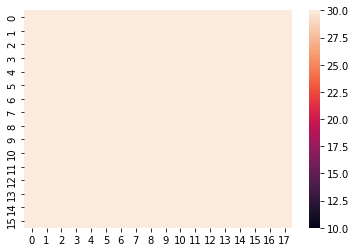

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_073256.jpg


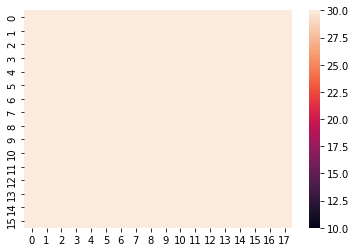

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_070100.jpg


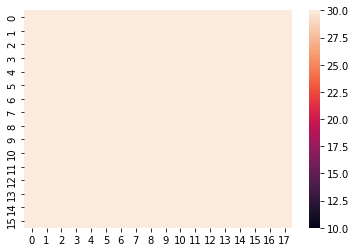

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_131421.jpg


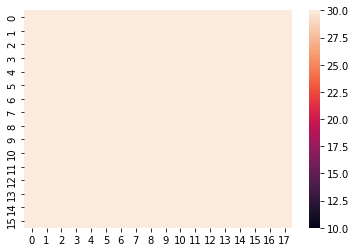

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_020316.jpg


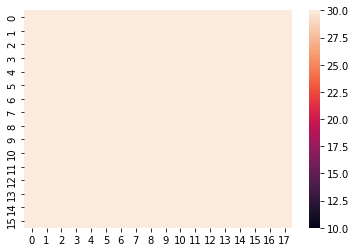

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_060750.jpg


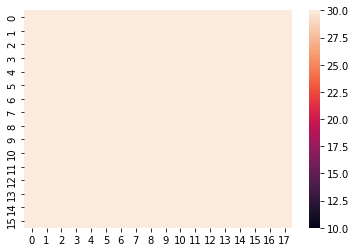

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_214421.jpg


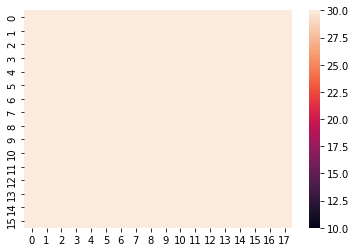

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_114456.jpg


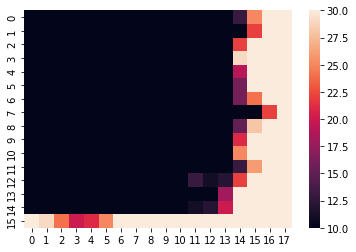

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_173612.jpg


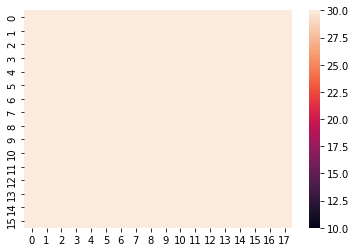

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_164055.jpg


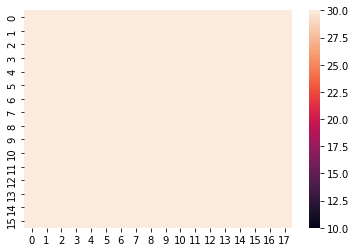

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_123635.jpg


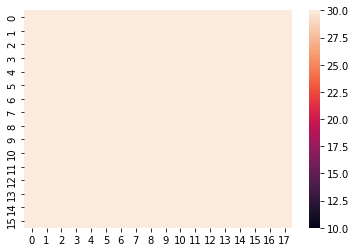

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_153659.jpg


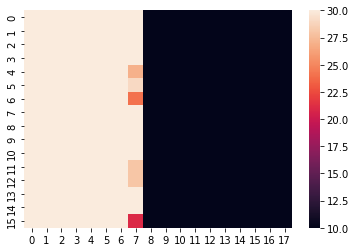

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_201705.jpg


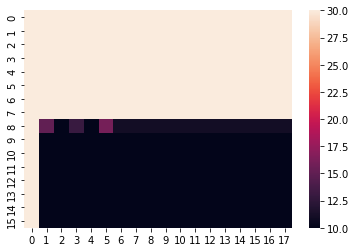

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_063945.jpg


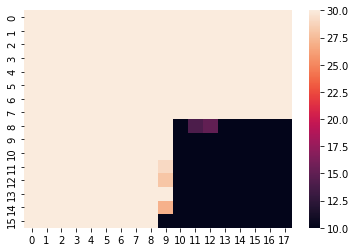

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_151920.jpg


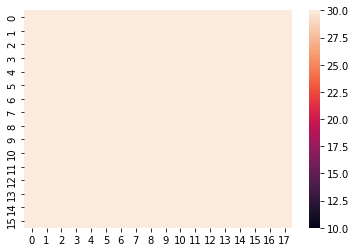

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_000226.jpg


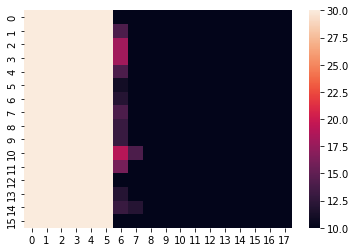

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_191523.jpg


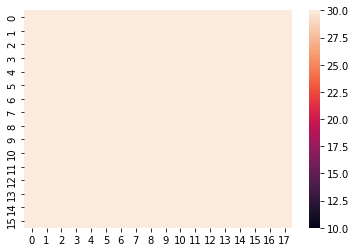

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_104431.jpg


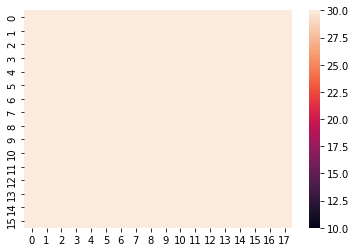

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_015756.jpg


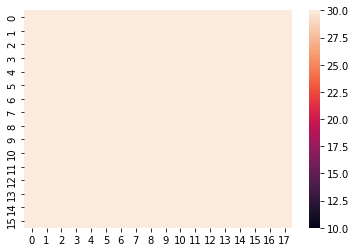

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_115338.jpg


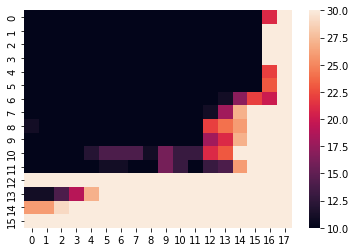

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_020500.jpg


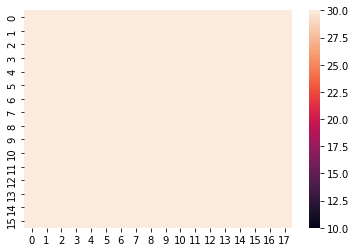

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_213902.jpg


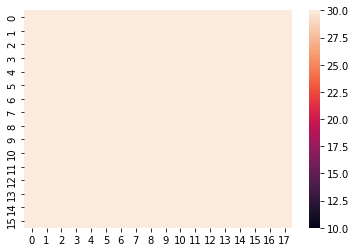

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_140641.jpg


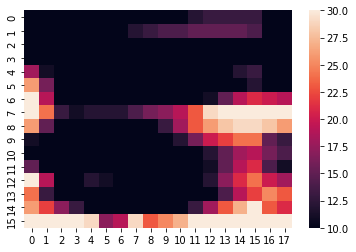

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_001131.jpg


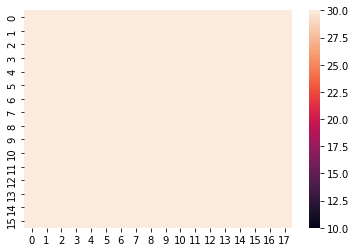

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_225655.jpg


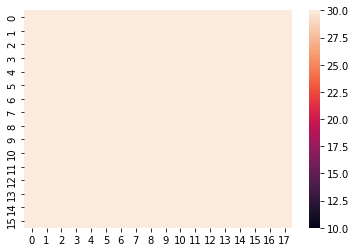

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_161836.jpg


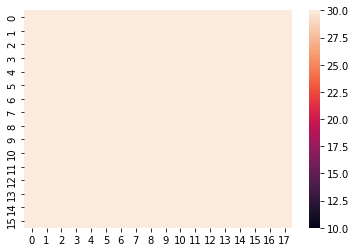

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_143911.jpg


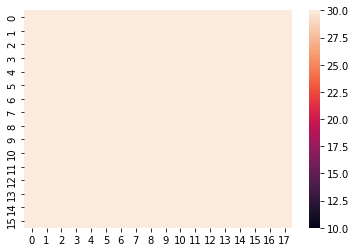

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_141155.jpg


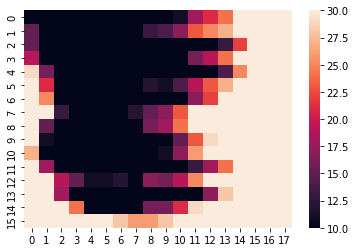

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_233605.jpg


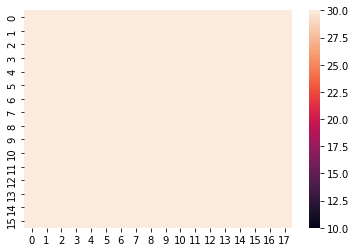

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_105213.jpg


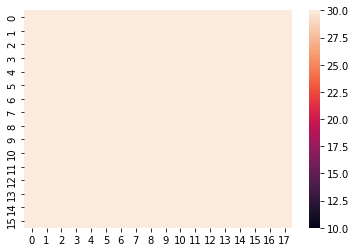

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_041911.jpg


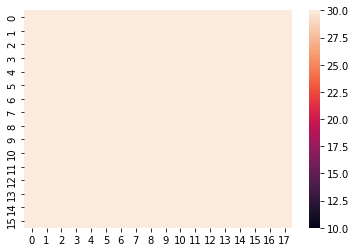

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211218_000247.jpg


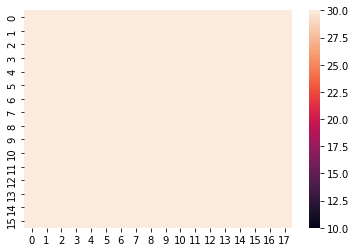

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_021354.jpg


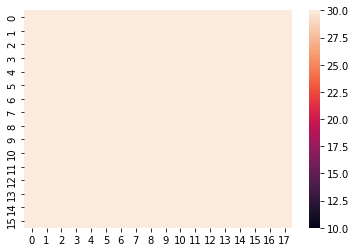

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_144035.jpg


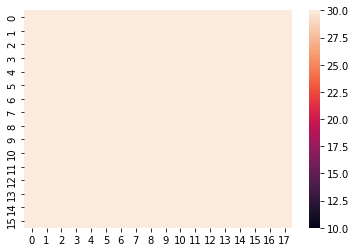

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_115015.jpg


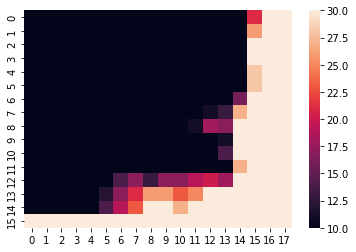

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_195316.jpg


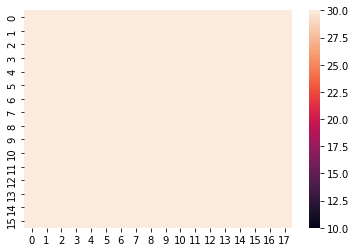

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_091041.jpg


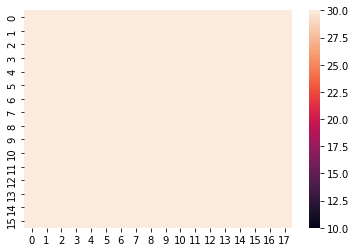

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_001834.jpg


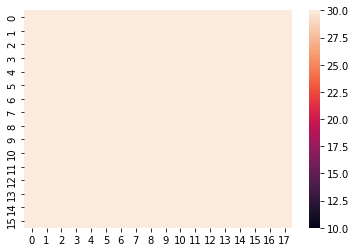

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_172849.jpg


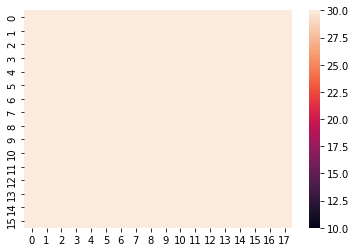

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_115534.jpg


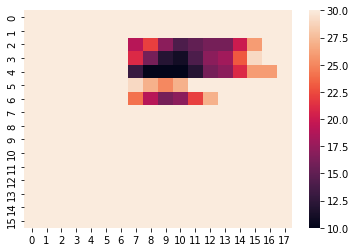

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_123938.jpg


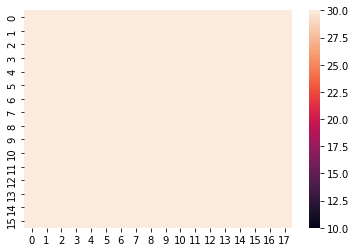

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_181454.jpg


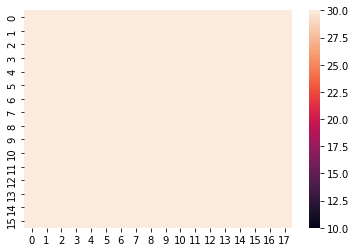

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_045851.jpg


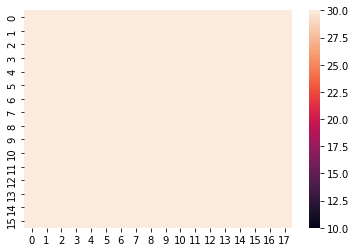

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_093002.jpg


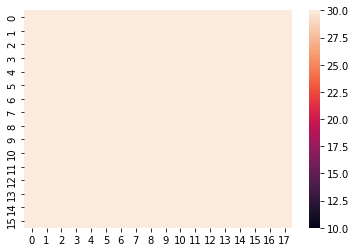

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_135043.jpg


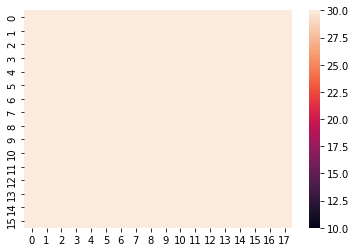

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_180934.jpg


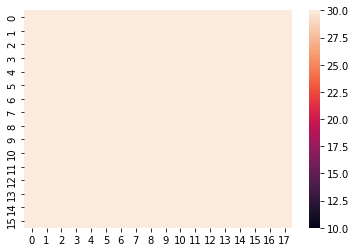

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_144555.jpg


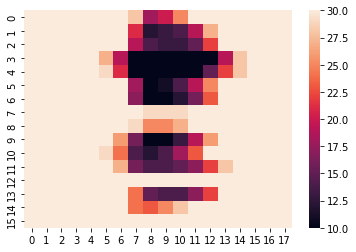

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_000051.jpg


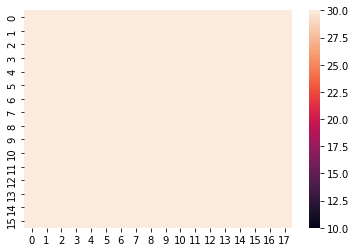

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_062908.jpg


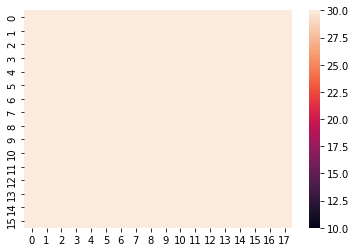

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_151747.jpg


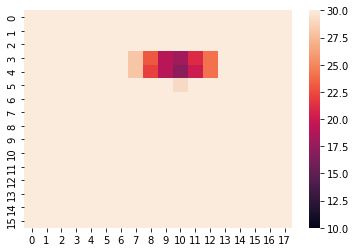

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_123810.jpg


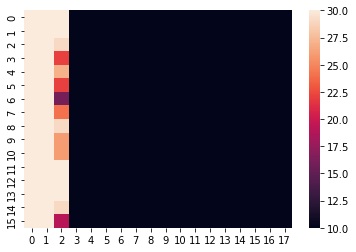

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_082028.jpg


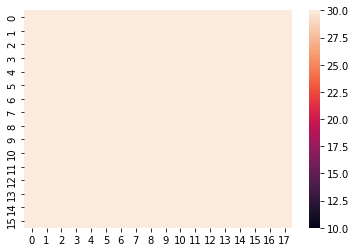

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_230930.jpg


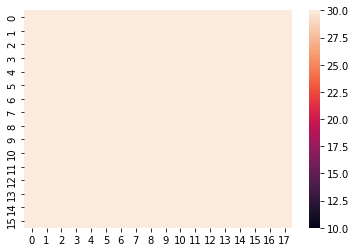

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_155122.jpg


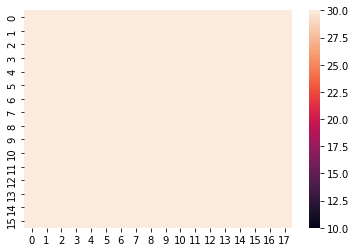

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_025901.jpg


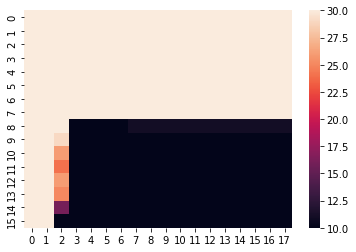

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_171155.jpg


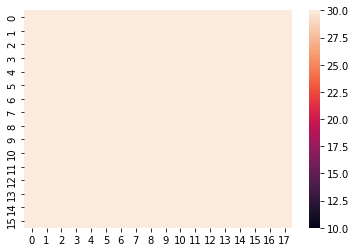

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_112701.jpg


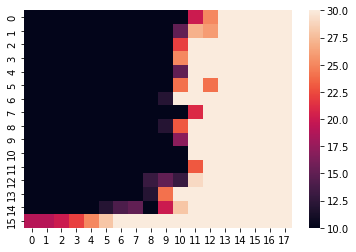

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_051634.jpg


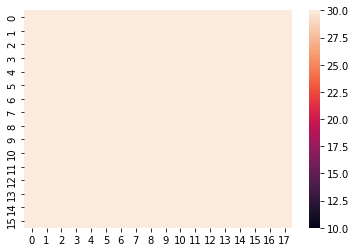

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_012040.jpg


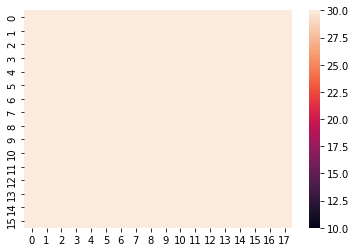

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_122210.jpg


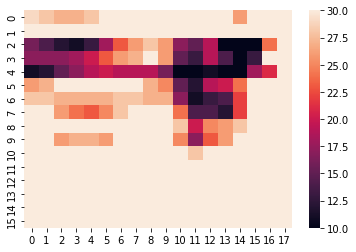

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_142247.jpg


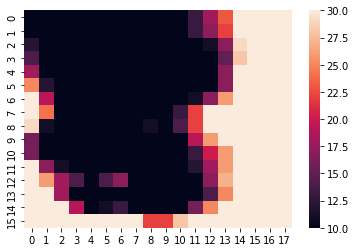

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_061508.jpg


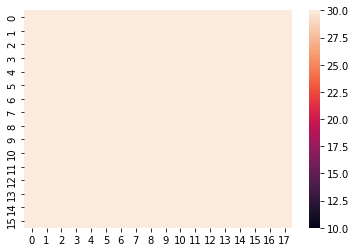

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_164853.jpg


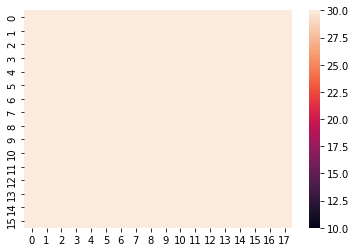

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_170211.jpg


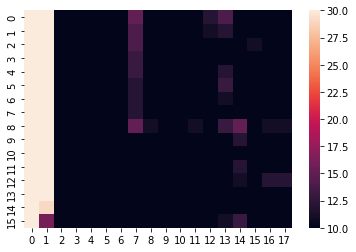

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_005649.jpg


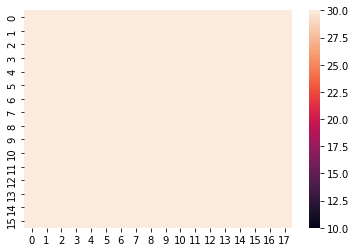

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_234704.jpg


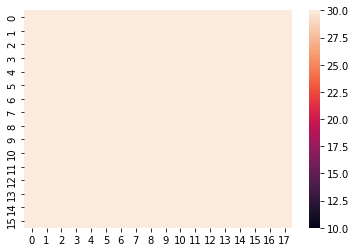

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_024040.jpg


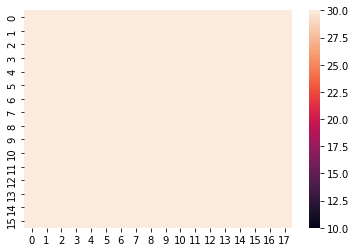

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_184132.jpg


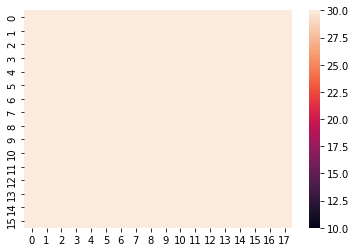

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_013824.jpg


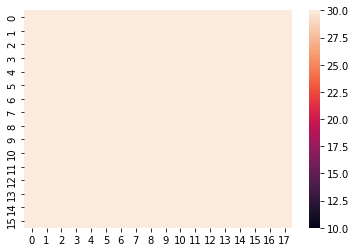

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_003250.jpg


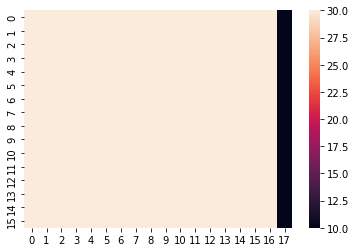

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_172329.jpg


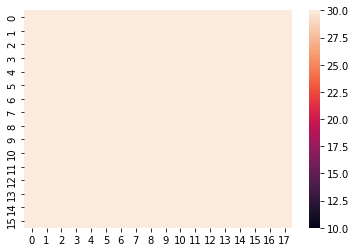

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_164339.jpg


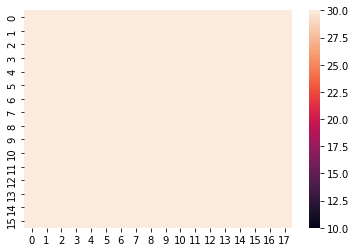

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_120620.jpg


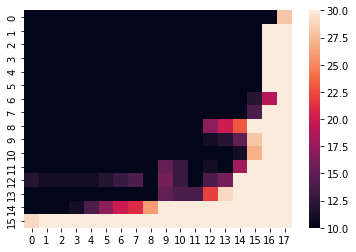

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_105701.jpg


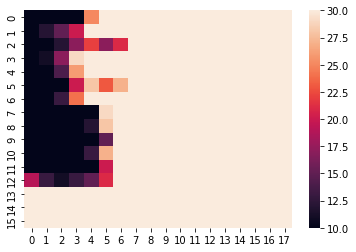

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_125733.jpg


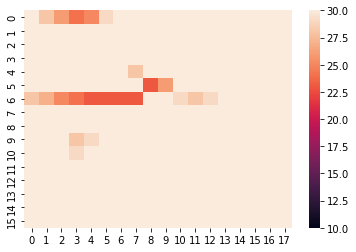

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_132610.jpg


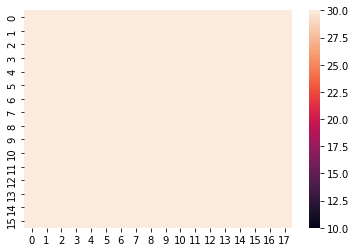

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_161418.jpg


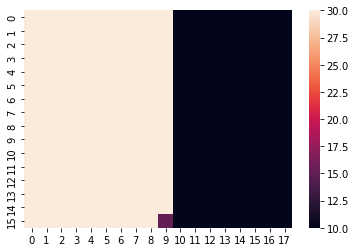

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_004510.jpg


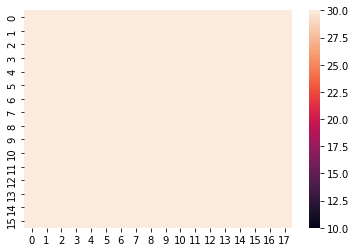

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_062546.jpg


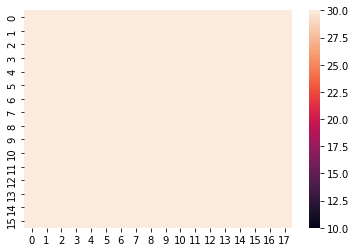

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_193639.jpg


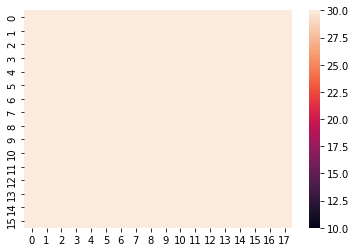

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_175026.jpg


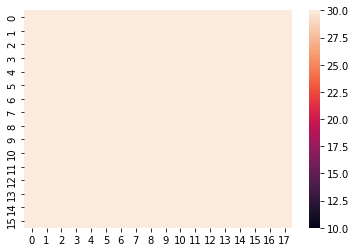

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_193444.jpg


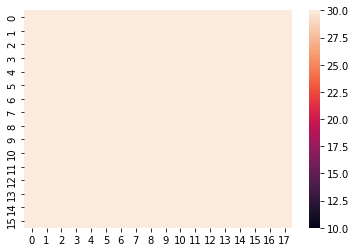

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_014343.jpg


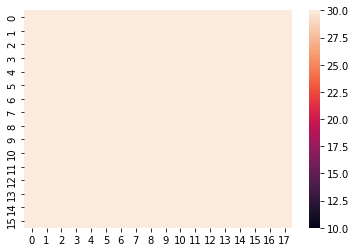

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_105816.jpg


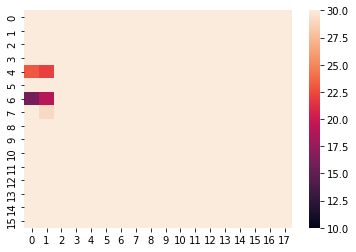

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_111259.jpg


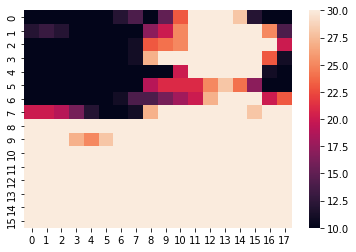

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_180220.jpg


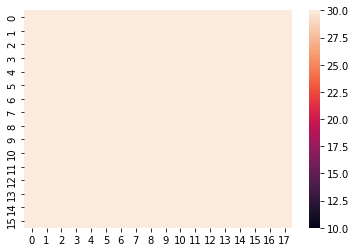

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_233101.jpg


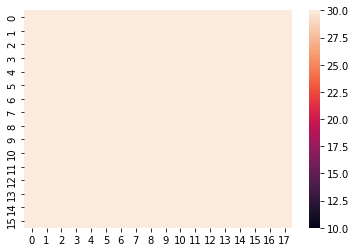

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_175011.jpg


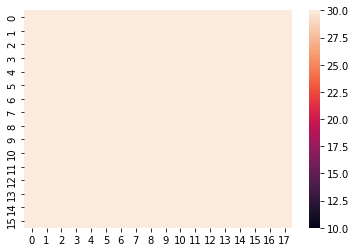

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_124329.jpg


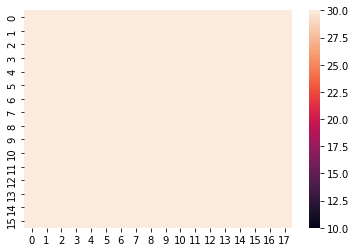

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_133444.jpg


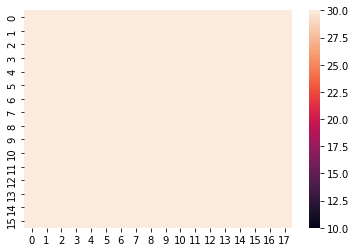

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_223017.jpg


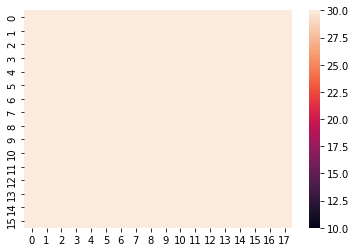

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_193119.jpg


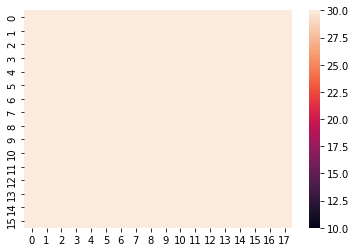

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_203305.jpg


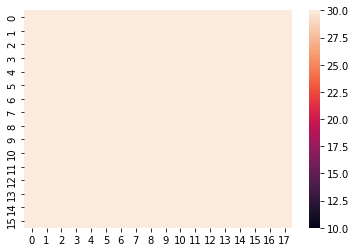

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_184652.jpg


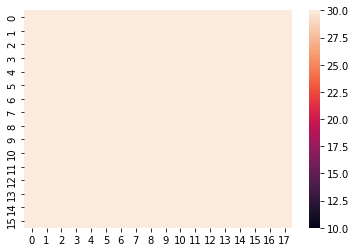

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_060430.jpg


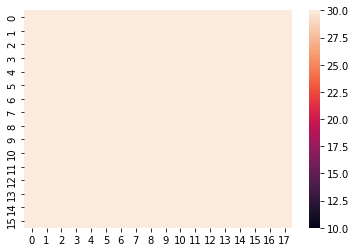

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_114300.jpg


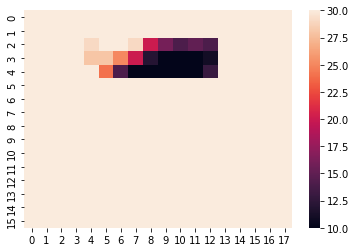

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_085805.jpg


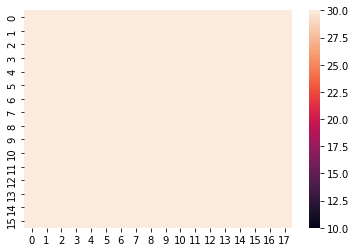

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_163347.jpg


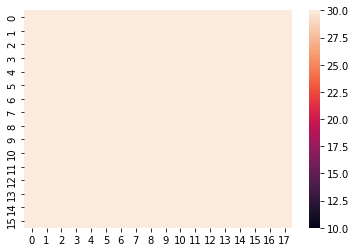

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_224615.jpg


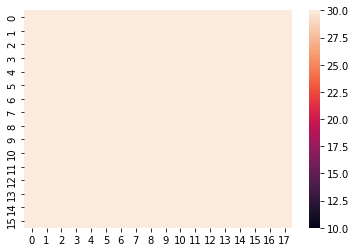

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_141920.jpg


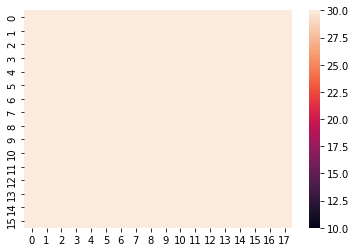

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_114105.jpg


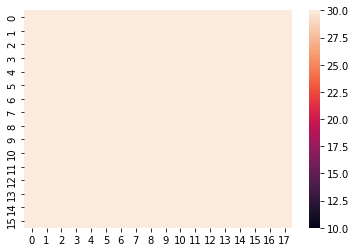

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_054116.jpg


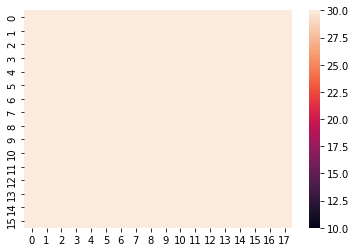

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_110546.jpg


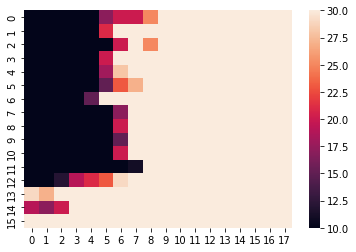

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_001316.jpg


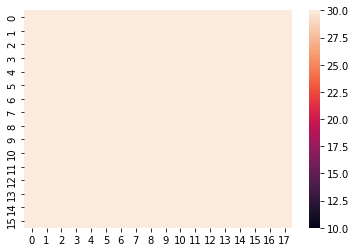

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_095640.jpg


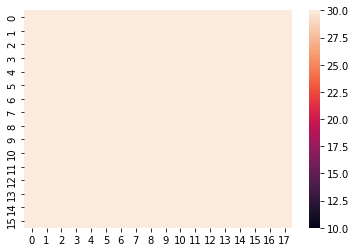

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_180415.jpg


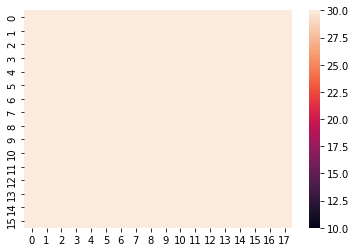

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_020835.jpg


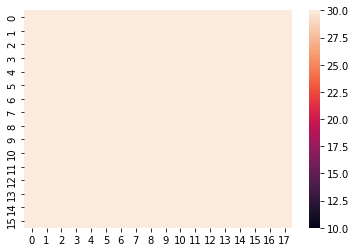

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_090002.jpg


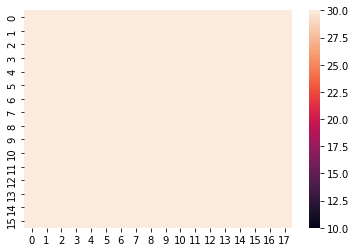

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_062027.jpg


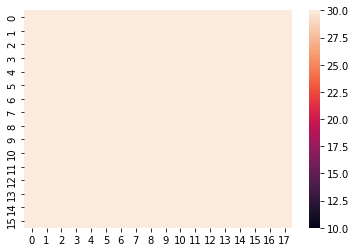

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_164931.jpg


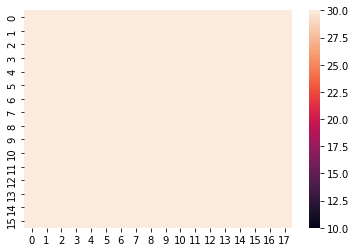

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_135244.jpg


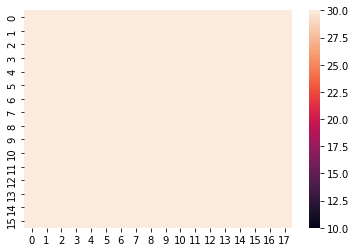

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_122716.jpg


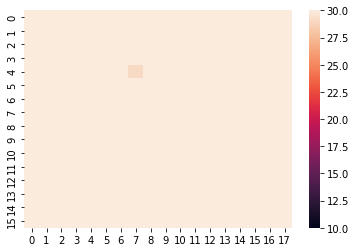

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_152512.jpg


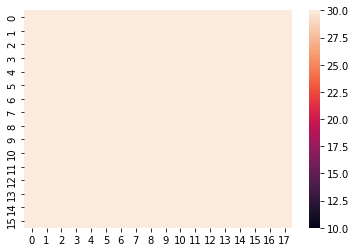

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_174450.jpg


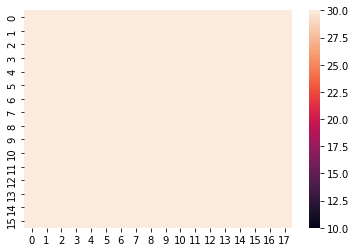

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_192601.jpg


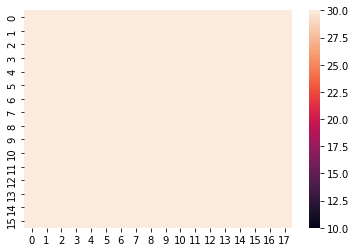

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_031229.jpg


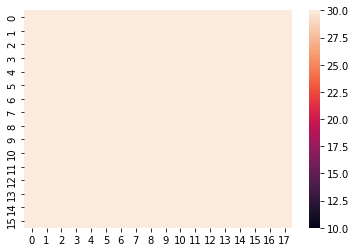

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_163905.jpg


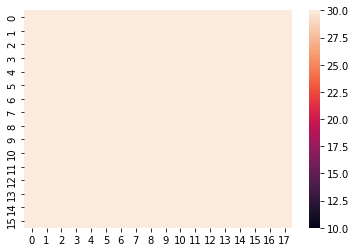

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_120416.jpg


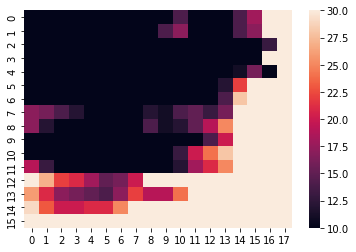

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_224255.jpg


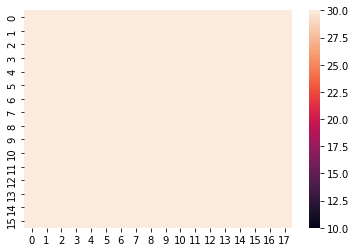

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_094754.jpg


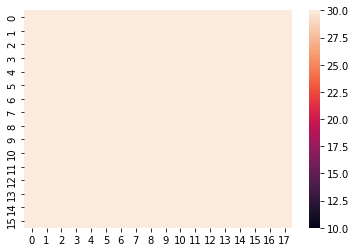

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_132520.jpg


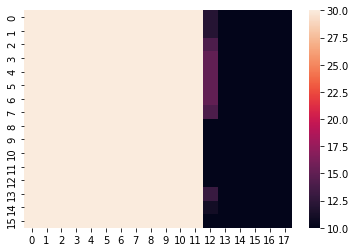

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_003433.jpg


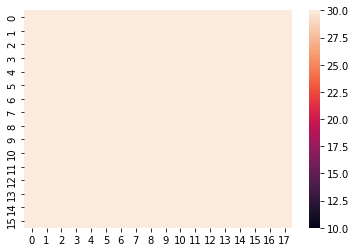

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_205628.jpg


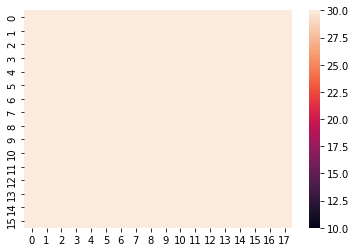

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_175336.jpg


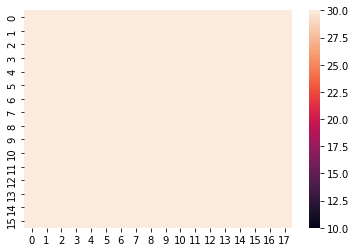

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_233705.jpg


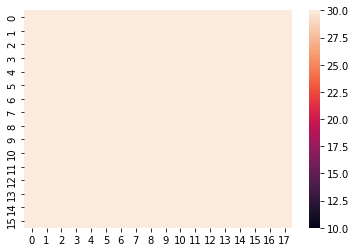

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_021913.jpg


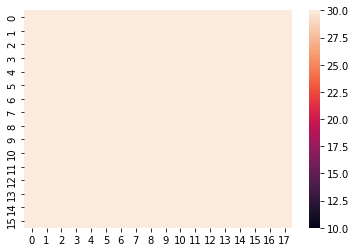

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_144834.jpg


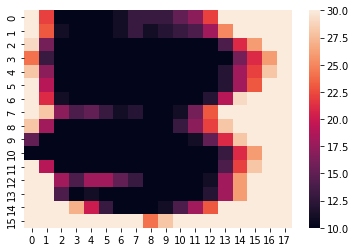

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_064504.jpg


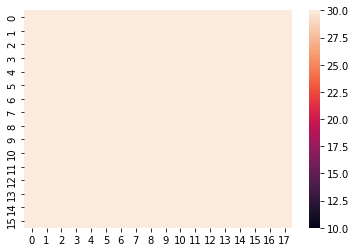

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_171728.jpg


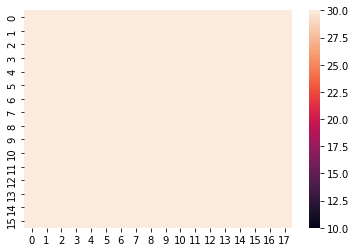

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_145632.jpg


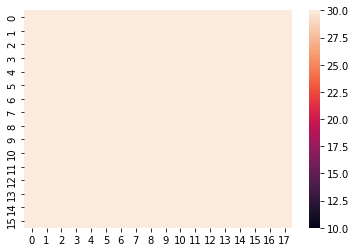

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_180803.jpg


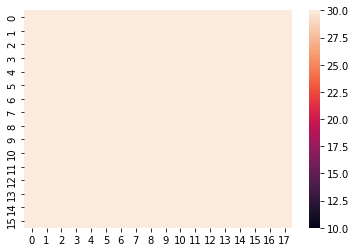

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_040207.jpg


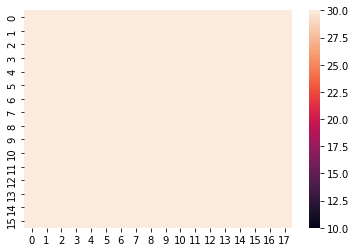

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_004329.jpg


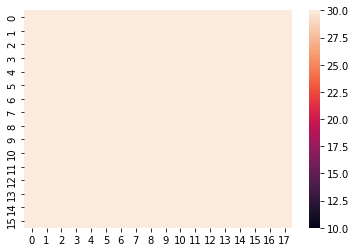

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_161230.jpg


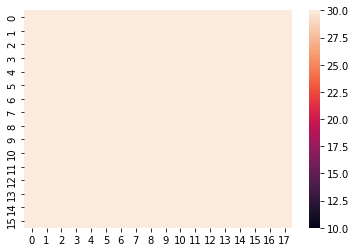

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_112059.jpg


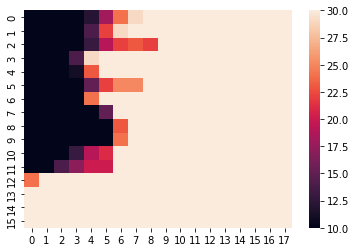

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_143518.jpg


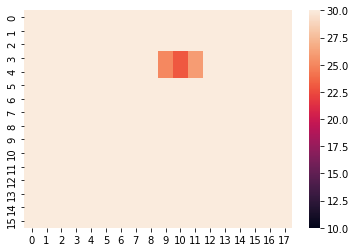

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_222658.jpg


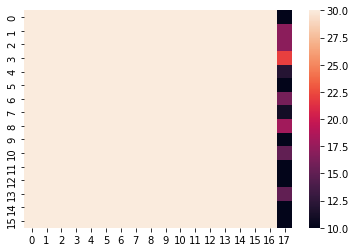

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_075054.jpg


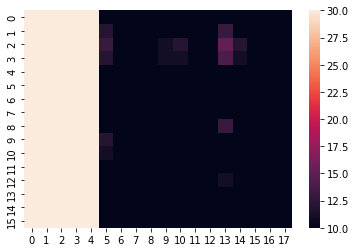

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_005030.jpg


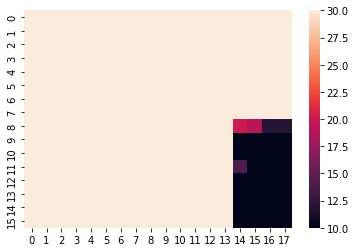

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_083213.jpg


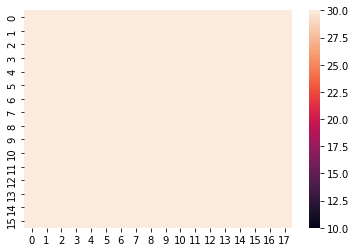

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_142751.jpg


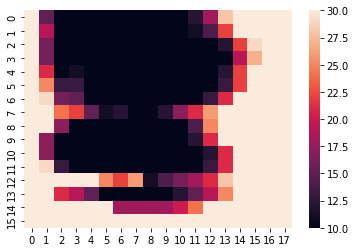

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_225853.jpg


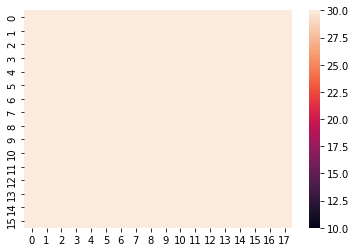

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_110220.jpg


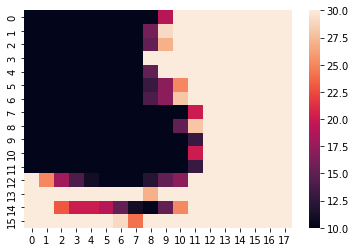

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211231_092457.jpg


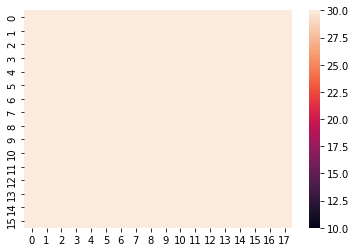

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_045519.jpg


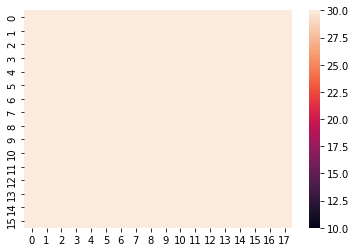

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_004847.jpg


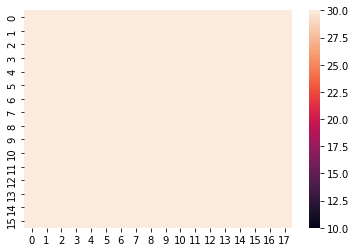

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_084407.jpg


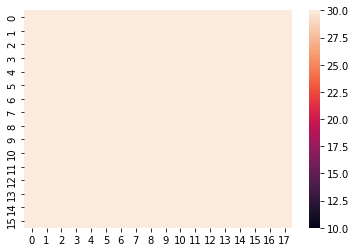

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_111624.jpg


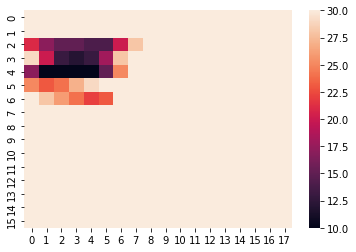

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_183521.jpg


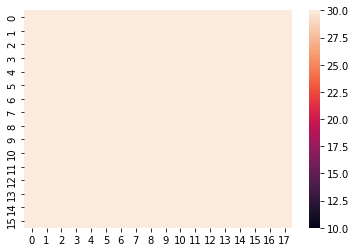

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_174817.jpg


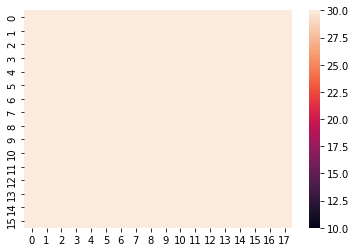

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_182014.jpg


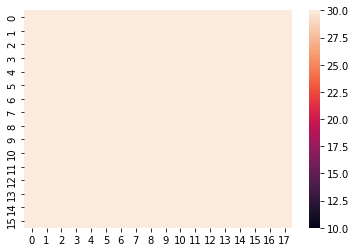

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_103544.jpg


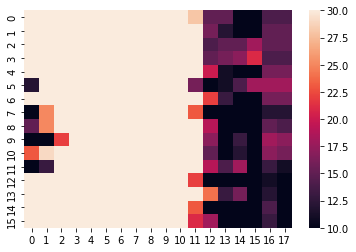

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_034049.jpg


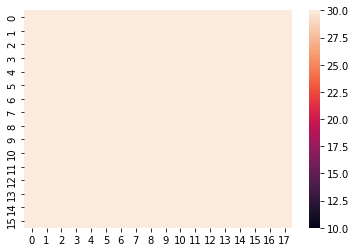

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_010055.jpg


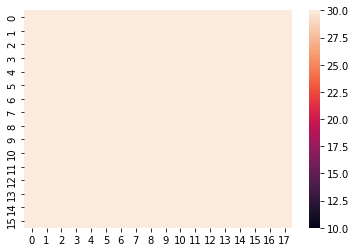

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_221100.jpg


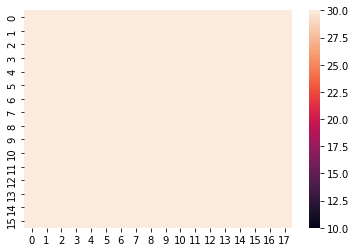

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_074014.jpg


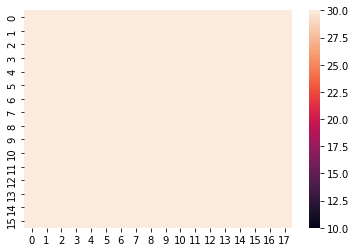

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211231_013404.jpg


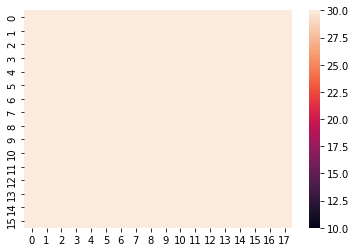

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_185956.jpg


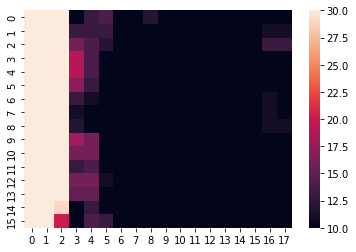

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_081012.jpg


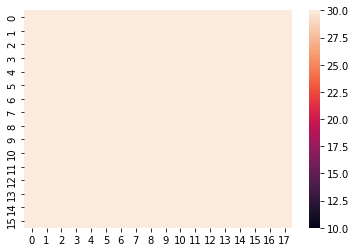

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_071659.jpg


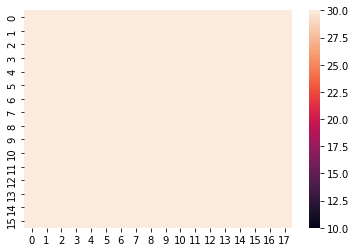

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_124813.jpg


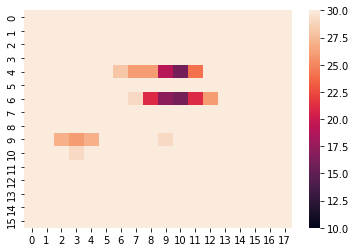

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_021538.jpg


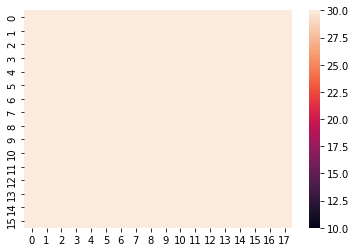

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_022952.jpg


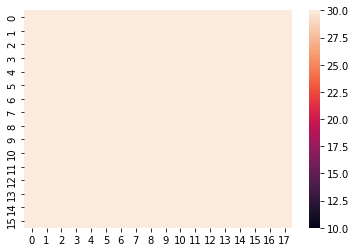

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_133113.jpg


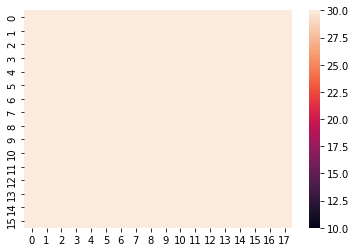

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_225334.jpg


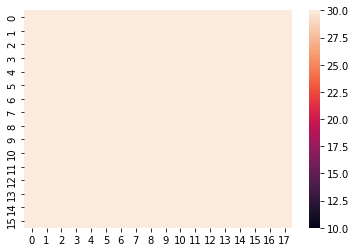

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_082051.jpg


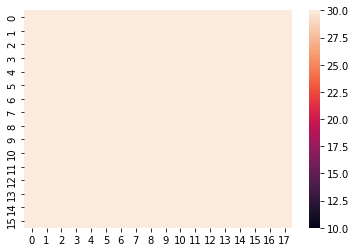

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_070819.jpg


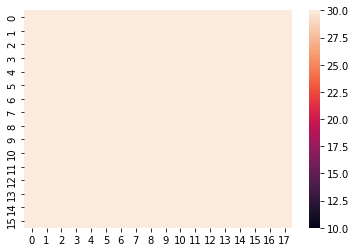

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_033904.jpg


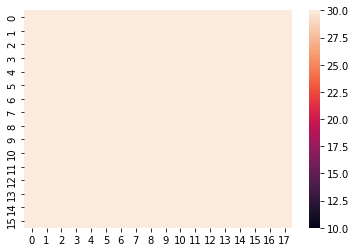

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_000757.jpg


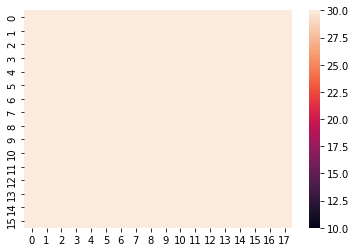

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_183422.jpg


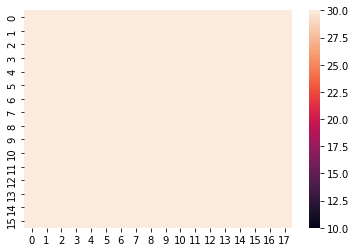

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_212101.jpg


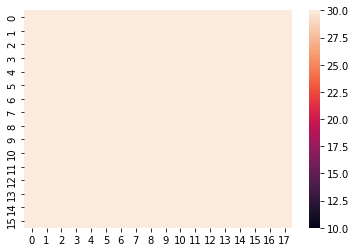

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_213140.jpg


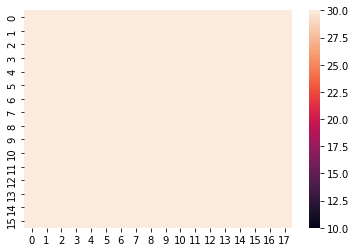

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_102315.jpg


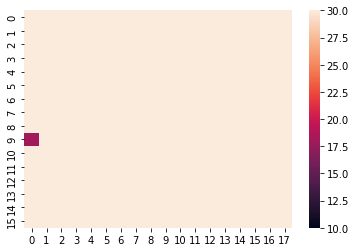

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_192409.jpg


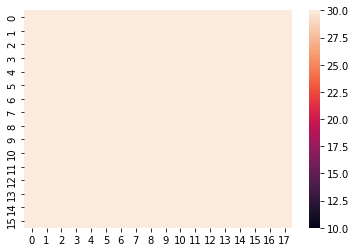

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_120611.jpg


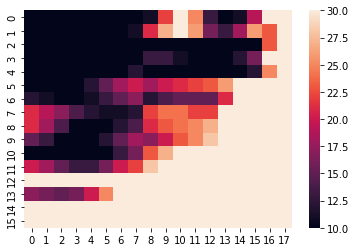

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_093029.jpg


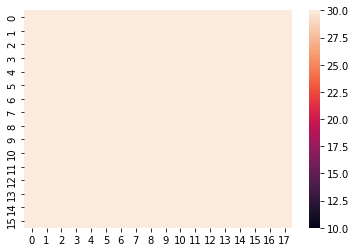

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_081531.jpg


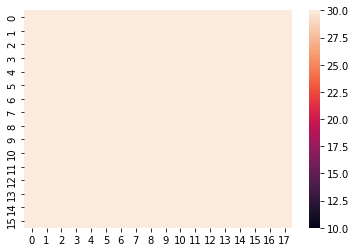

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_183613.jpg


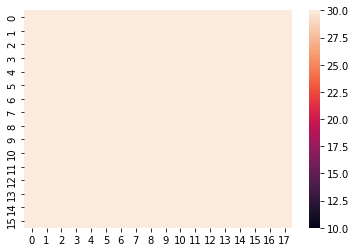

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_102834.jpg


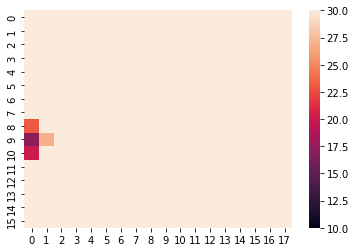

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_073456.jpg


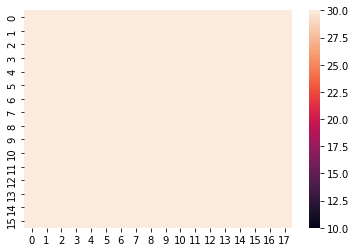

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_033009.jpg


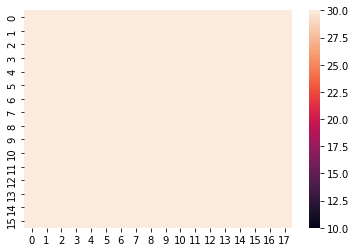

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_025814.jpg


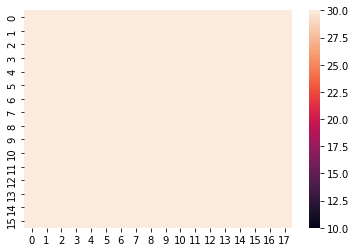

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_053232.jpg


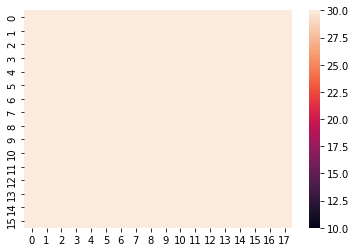

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_191023.jpg


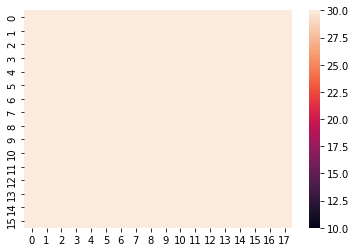

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211218_062806.jpg


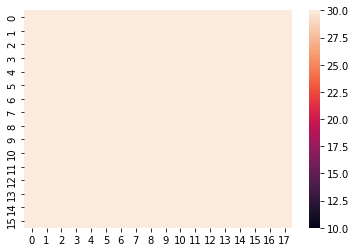

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_162827.jpg


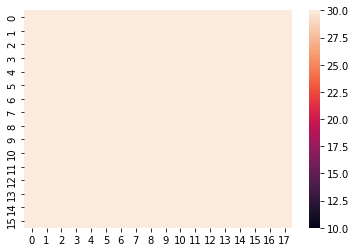

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_031931.jpg


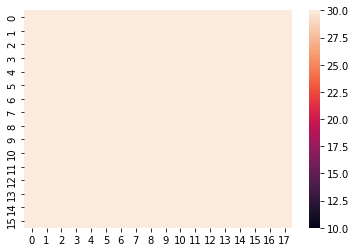

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_214940.jpg


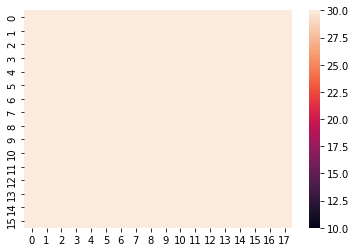

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_152620.jpg


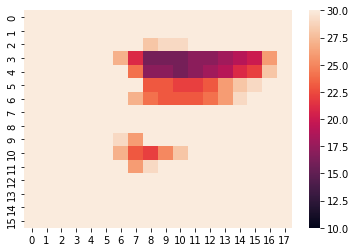

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_220045.jpg


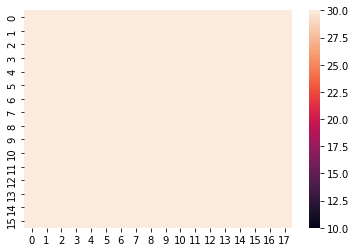

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_140127.jpg


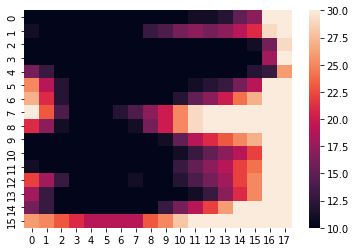

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_183345.jpg


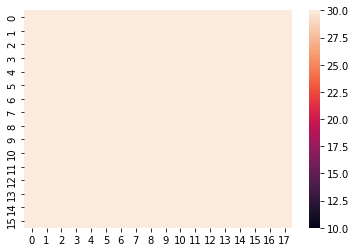

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_055909.jpg


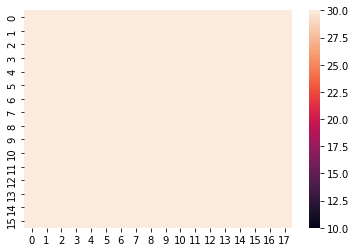

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_105508.jpg


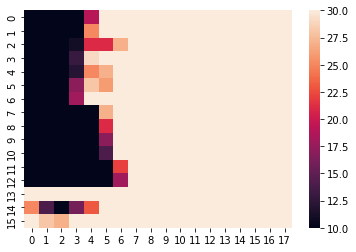

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_130055.jpg


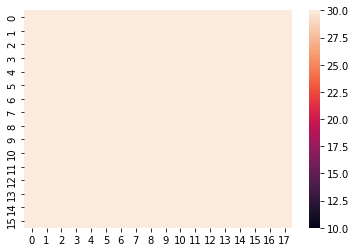

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_111105.jpg


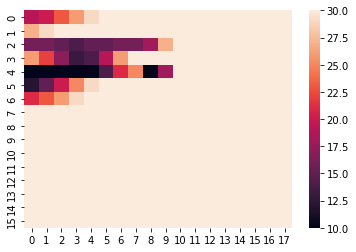

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_060949.jpg


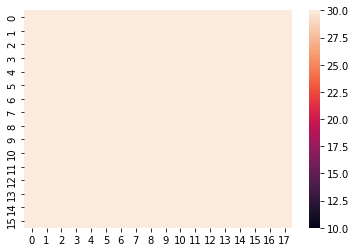

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_223736.jpg


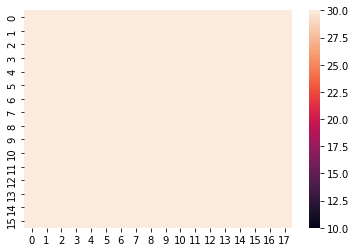

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_145425.jpg


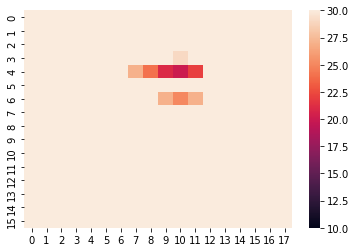

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_230412.jpg


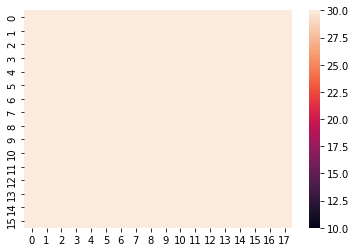

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_014200.jpg


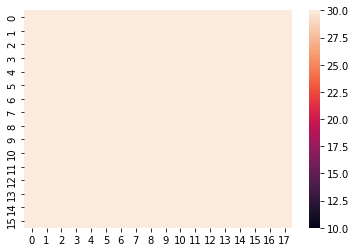

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_132409.jpg


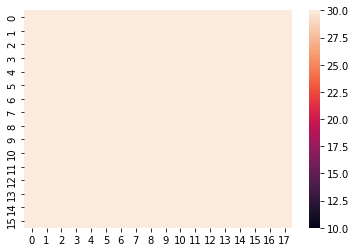

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_130252.jpg


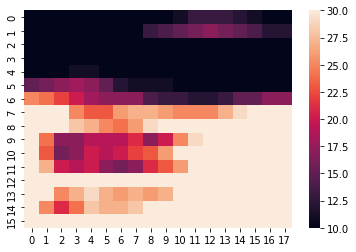

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_180049.jpg


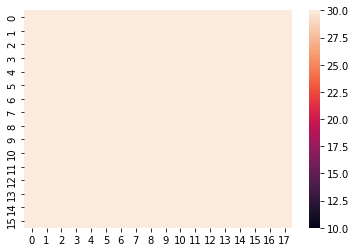

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_055712.jpg


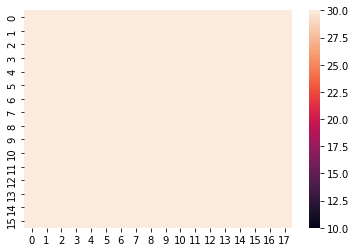

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_201309.jpg


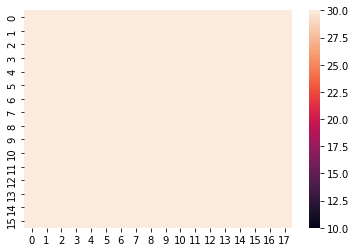

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_185211.jpg


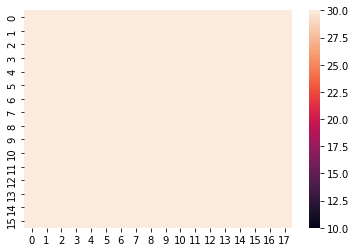

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_143829.jpg


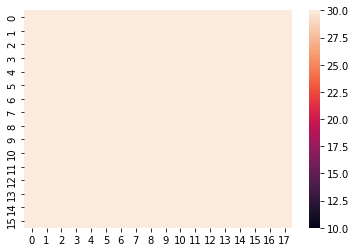

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_081211.jpg


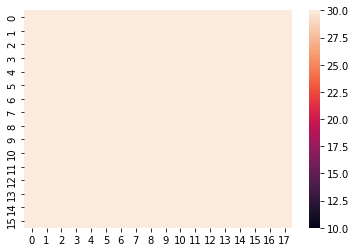

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_124259.jpg


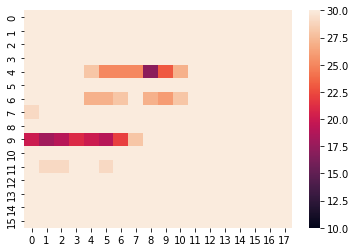

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_153140.jpg


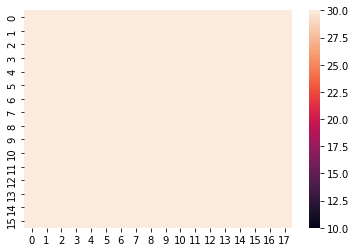

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_171809.jpg


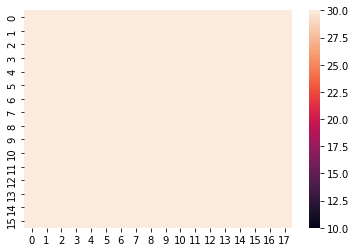

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_234124.jpg


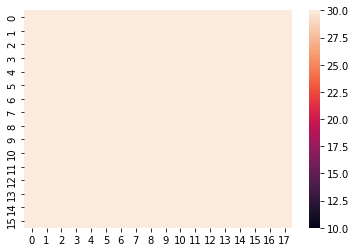

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_155043.jpg


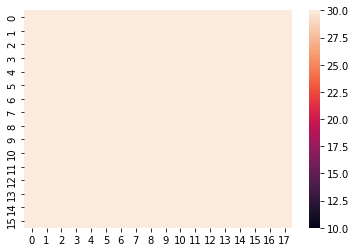

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_024214.jpg


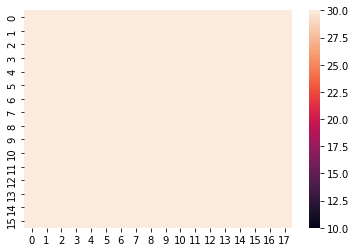

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_050925.jpg


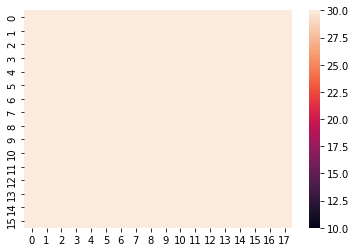

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_030149.jpg


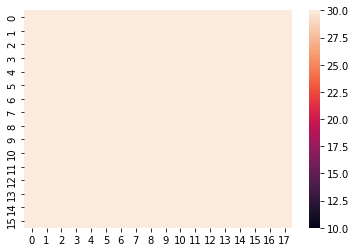

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_031840.jpg


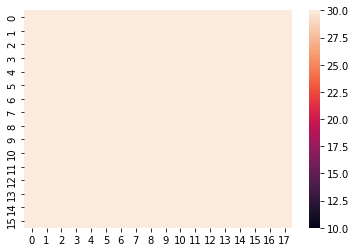

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_214829.jpg


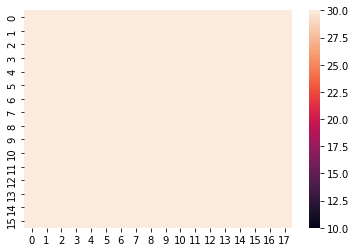

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_032307.jpg


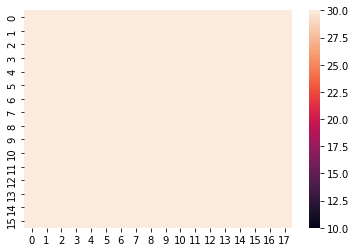

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_011522.jpg


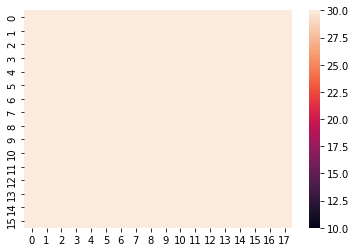

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_123252.jpg


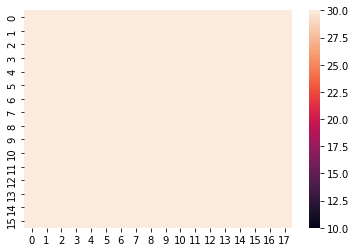

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_122535.jpg


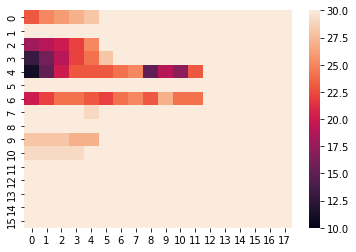

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_053038.jpg


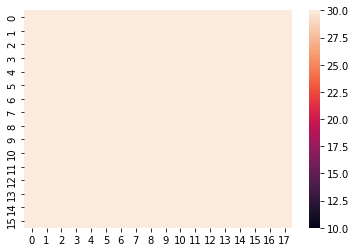

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_233220.jpg


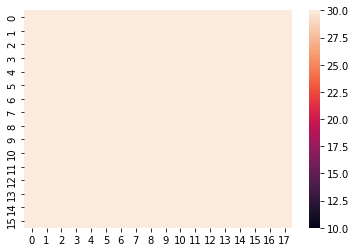

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211218_043650.jpg


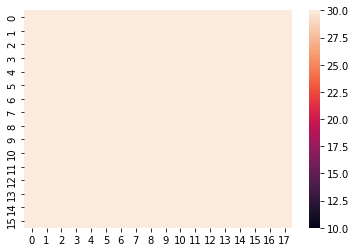

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_211149.jpg


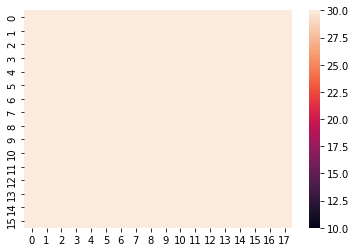

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_060101.jpg


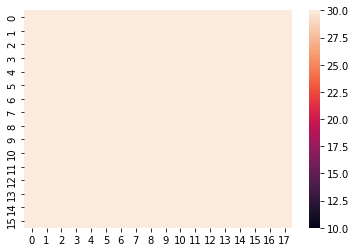

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_024733.jpg


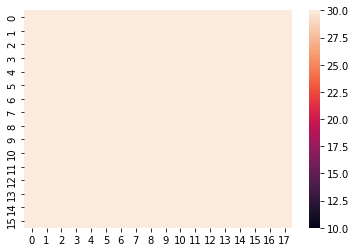

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_185406.jpg


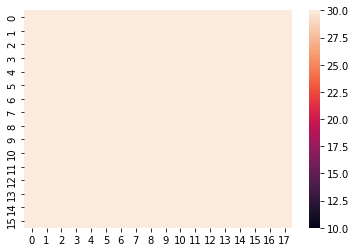

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_192051.jpg


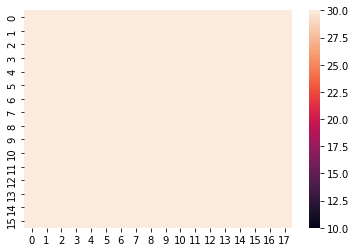

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_232333.jpg


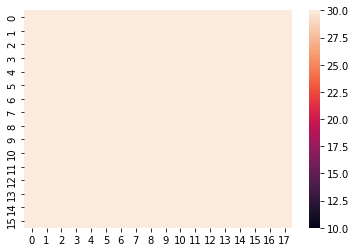

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_084208.jpg


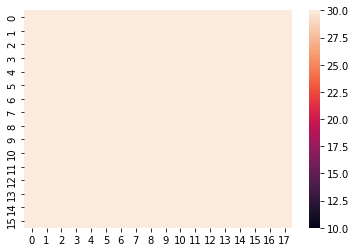

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_133811.jpg


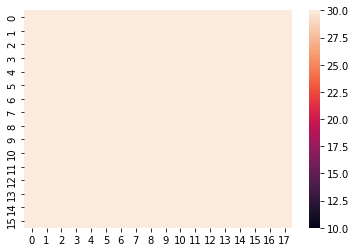

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_202227.jpg


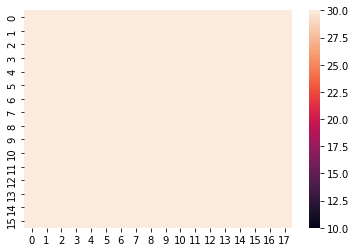

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_094234.jpg


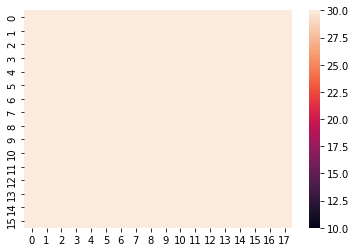

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_125840.jpg


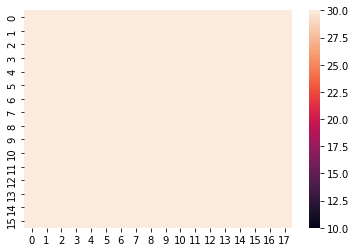

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_040021.jpg


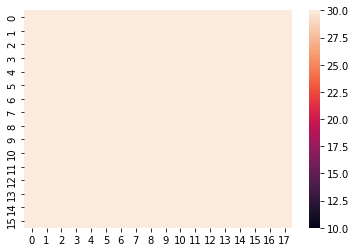

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_224452.jpg


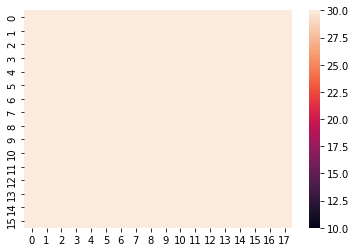

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_030709.jpg


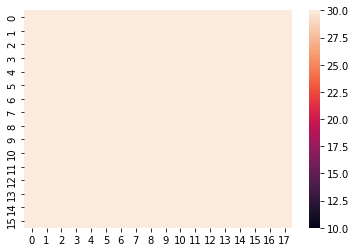

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_050038.jpg


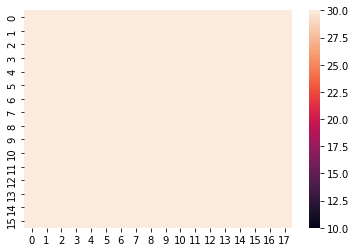

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_072936.jpg


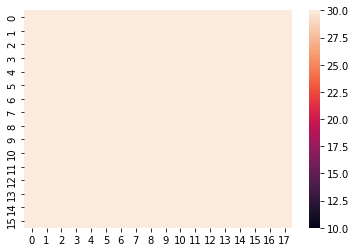

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_010048.jpg


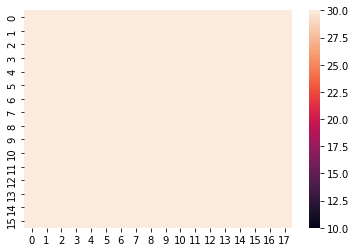

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_063624.jpg


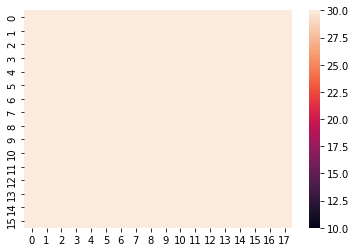

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_093521.jpg


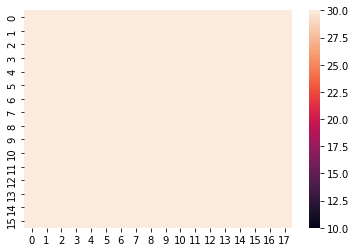

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_050557.jpg


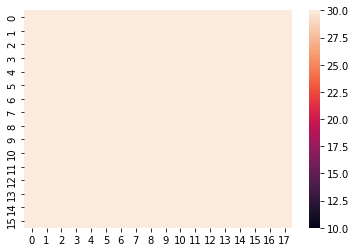

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_075448.jpg


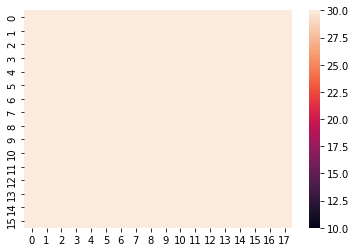

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_000610.jpg


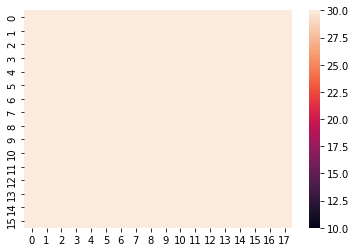

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_023657.jpg


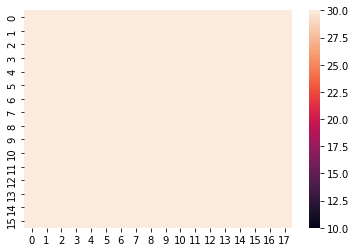

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_194001.jpg


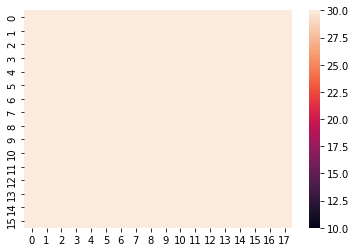

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_115036.jpg


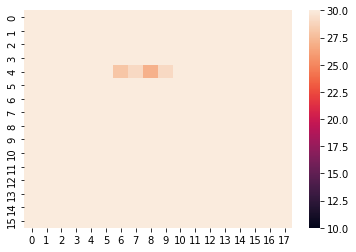

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_090805.jpg


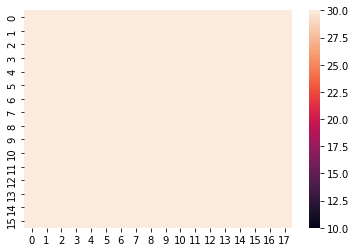

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_200315.jpg


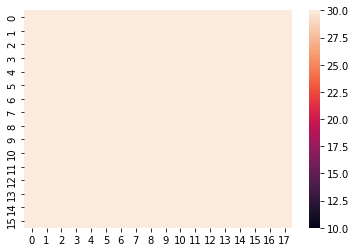

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_061410.jpg


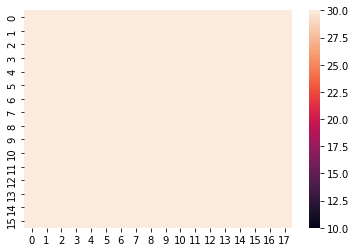

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_142046.jpg


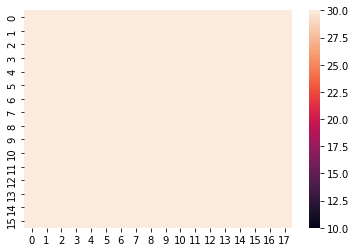

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_095312.jpg


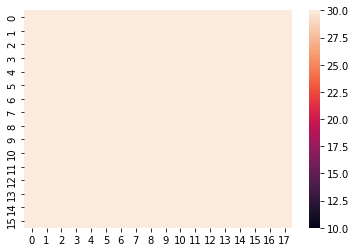

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_122203.jpg


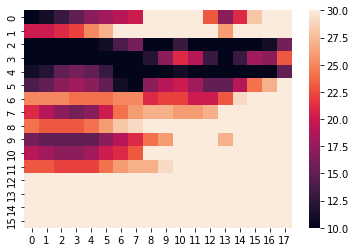

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_180654.jpg


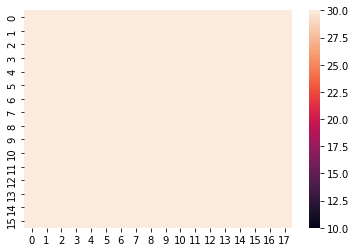

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_035128.jpg


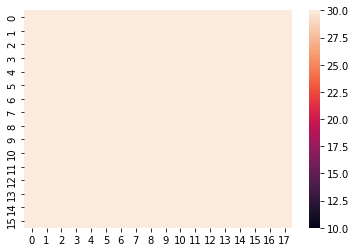

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_115551.jpg


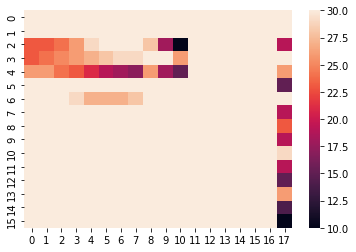

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_054635.jpg


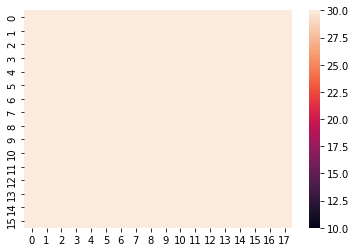

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_122341.jpg


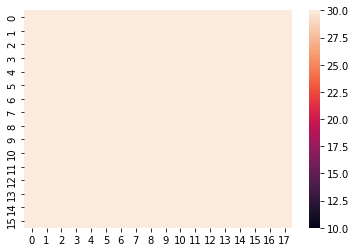

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_211022.jpg


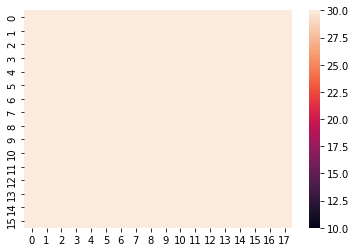

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_174456.jpg


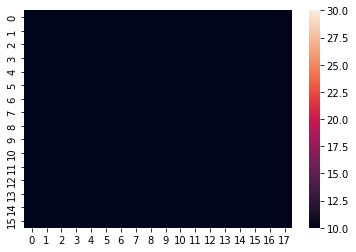

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_170949.jpg


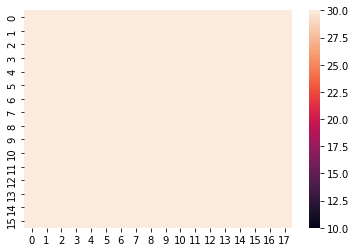

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_184441.jpg


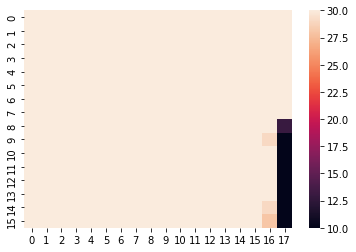

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_103025.jpg


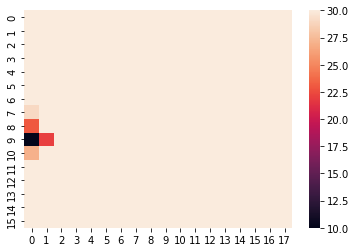

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211231_073501.jpg


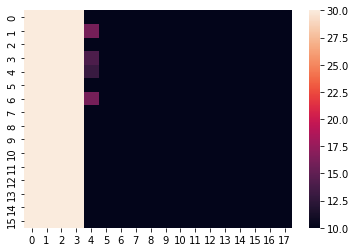

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_172659.jpg


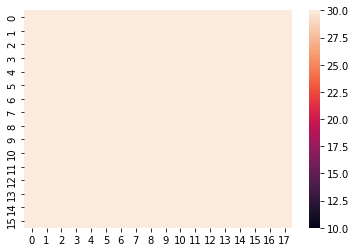

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_144242.jpg


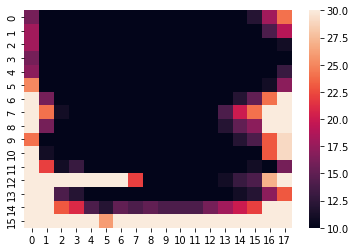

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_135058.jpg


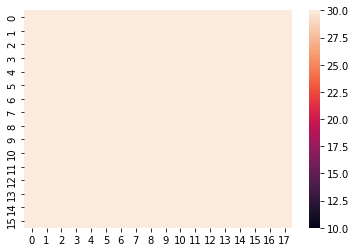

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_160711.jpg


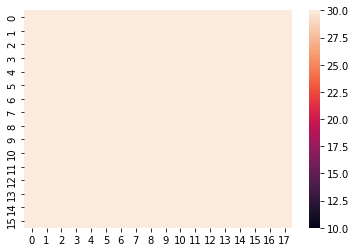

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_081731.jpg


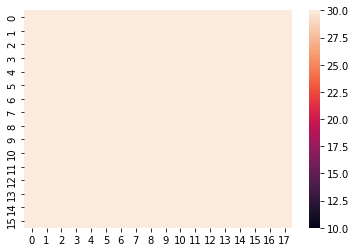

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_101237.jpg


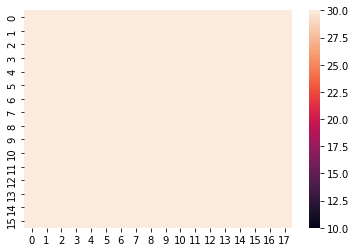

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_002914.jpg


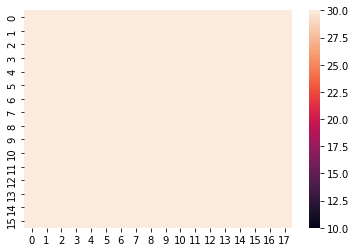

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_071858.jpg


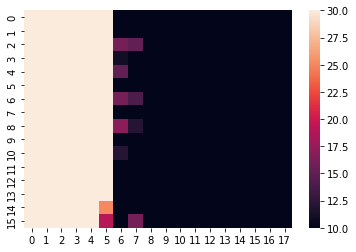

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_182146.jpg


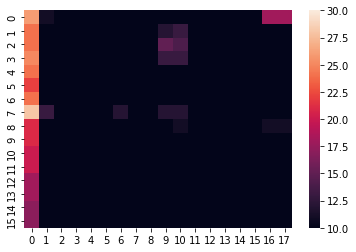

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_151919.jpg


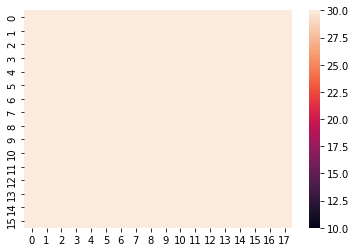

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_150710.jpg


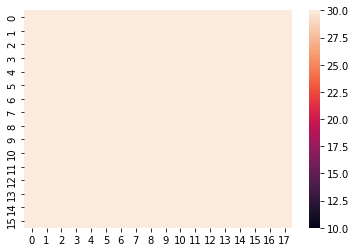

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_112857.jpg


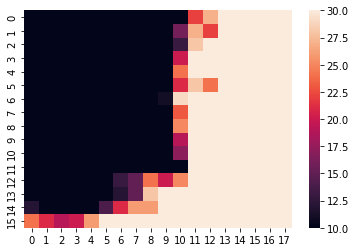

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_175855.jpg


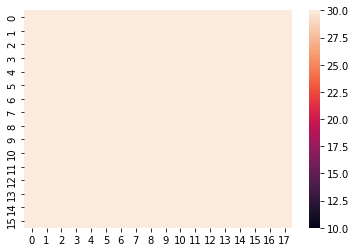

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_023616.jpg


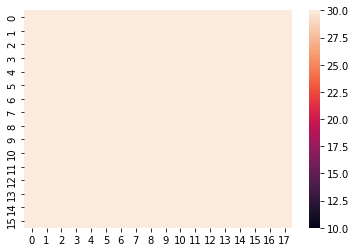

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_220338.jpg


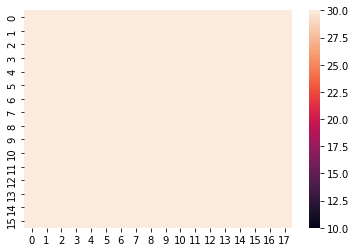

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211227_215935.jpg


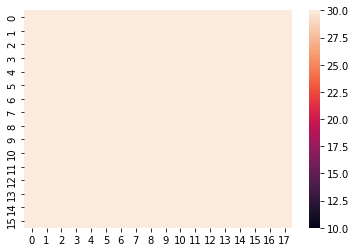

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_131850.jpg


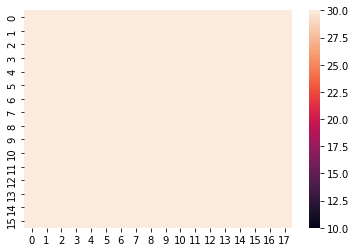

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_043737.jpg


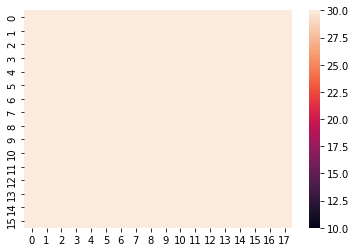

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_064144.jpg


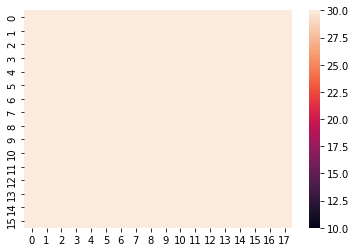

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_015941.jpg


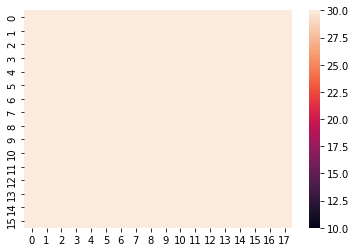

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_143643.jpg


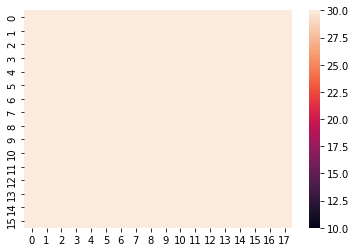

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_234521.jpg


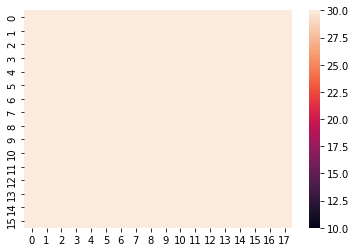

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_123153.jpg


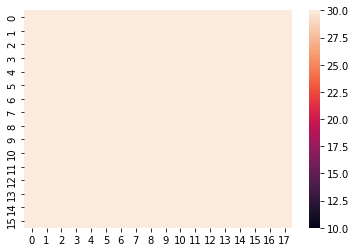

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_110002.jpg


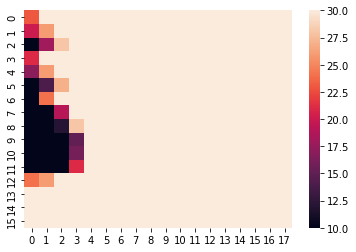

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_192605.jpg


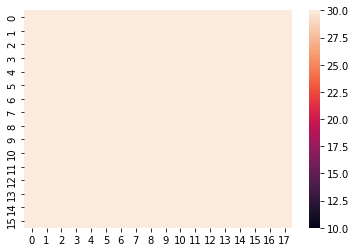

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_065542.jpg


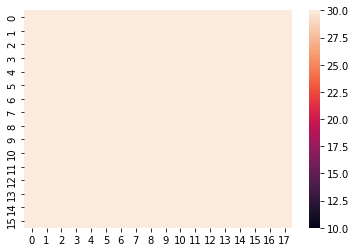

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_221938.jpg


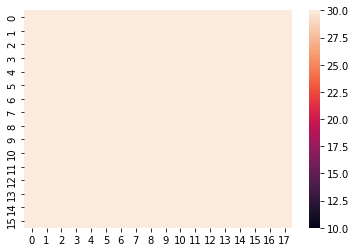

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_072736.jpg


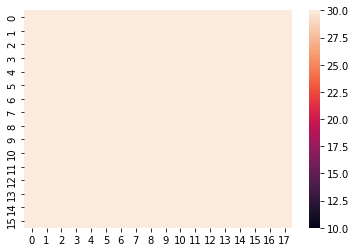

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_192043.jpg


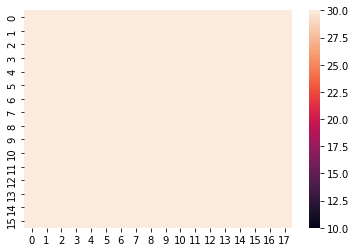

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_114522.jpg


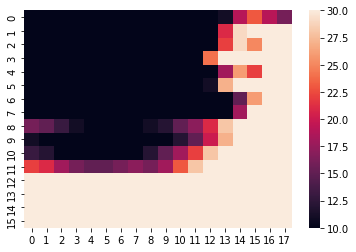

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_172017.jpg


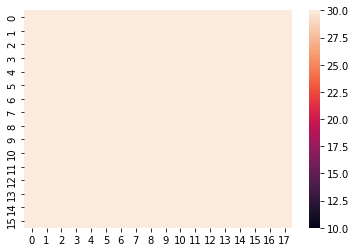

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_211541.jpg


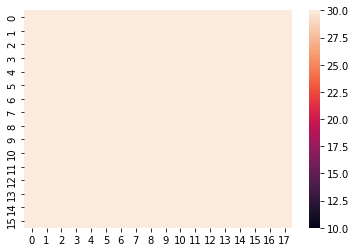

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_052519.jpg


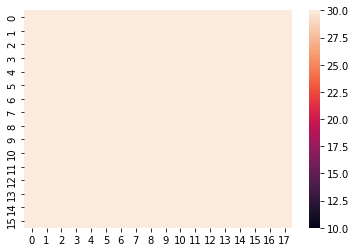

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_070621.jpg


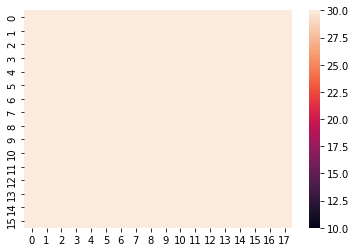

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_204850.jpg


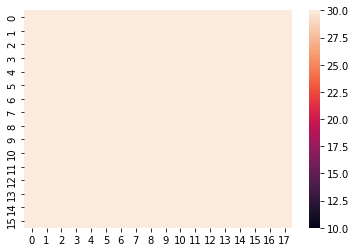

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_174258.jpg


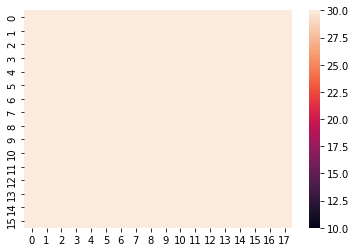

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_134850.jpg


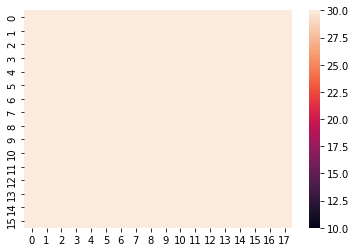

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_074854.jpg


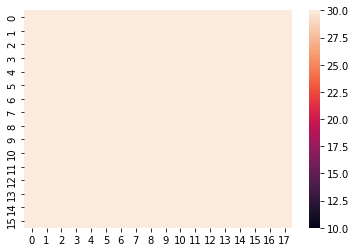

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_013640.jpg


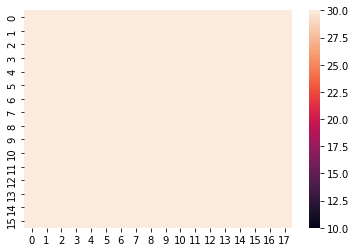

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_023511.jpg


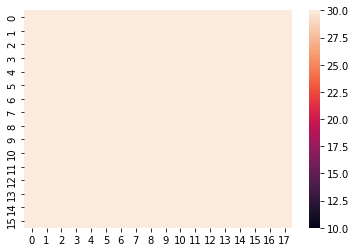

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_132431.jpg


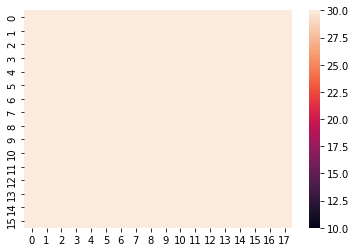

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_220539.jpg


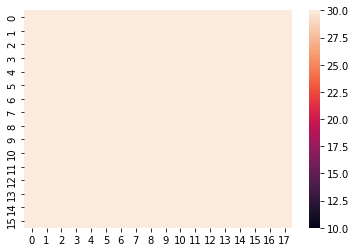

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_182853.jpg


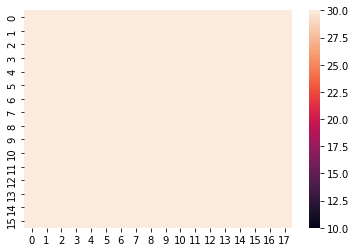

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_165651.jpg


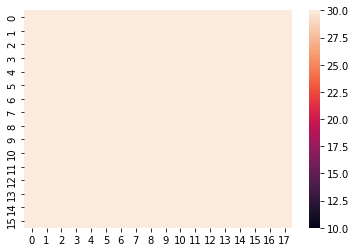

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_152438.jpg


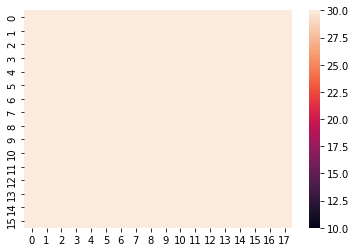

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_083648.jpg


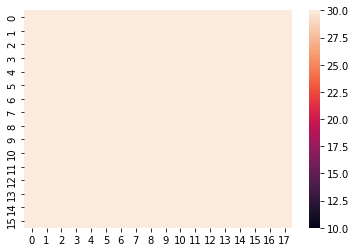

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_023135.jpg


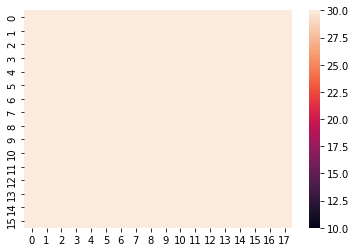

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_124924.jpg


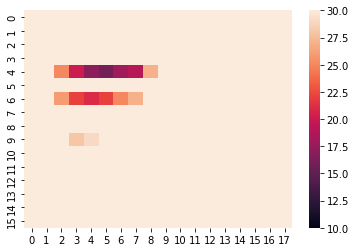

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_173440.jpg


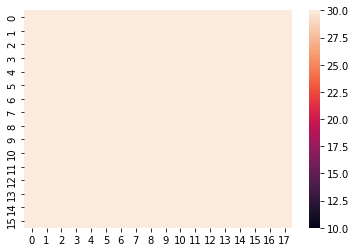

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_173358.jpg


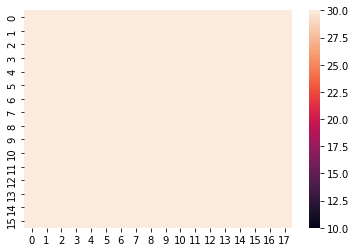

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_170541.jpg


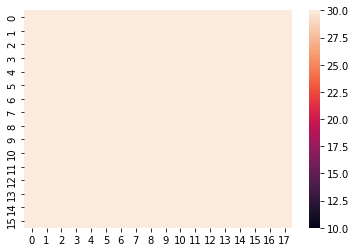

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_134004.jpg


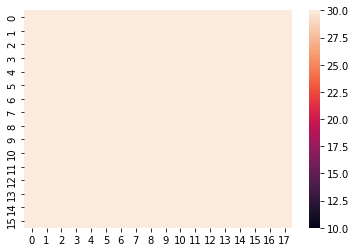

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_050651.jpg


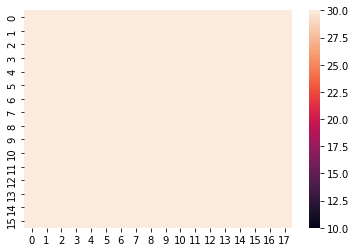

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_163311.jpg


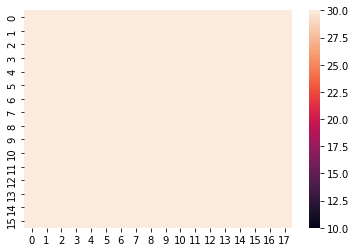

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_171250.jpg


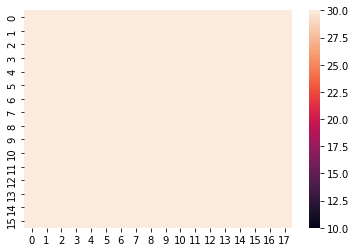

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_171503.jpg


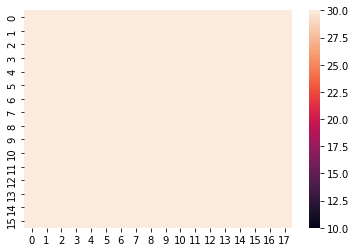

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_175043.jpg


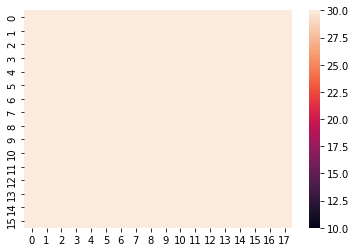

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_130615.jpg


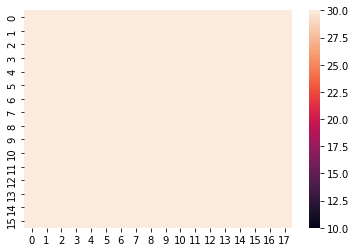

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_091738.jpg


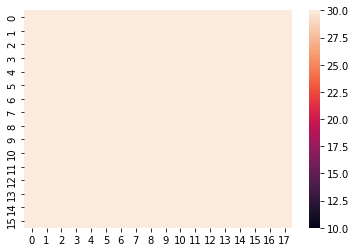

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_051442.jpg


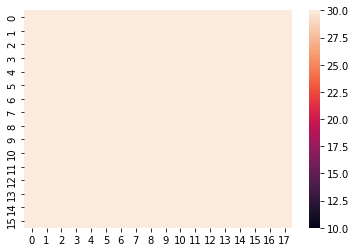

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_185349.jpg


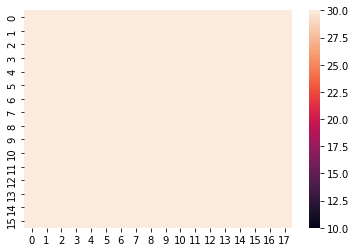

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_221619.jpg


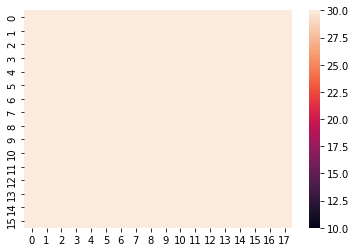

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_120936.jpg


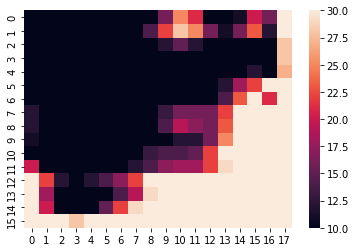

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_082809.jpg


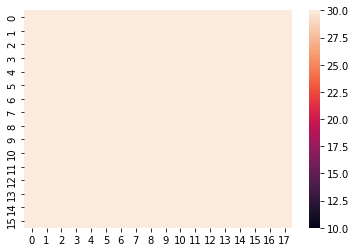

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_173219.jpg


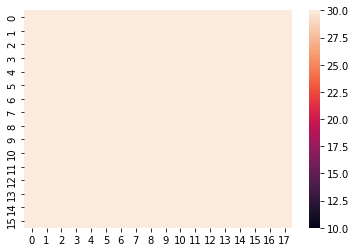

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_173927.jpg


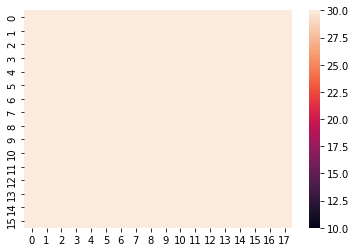

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211231_022111.jpg


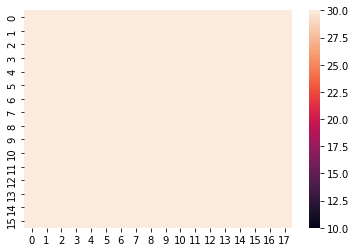

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_195317.jpg


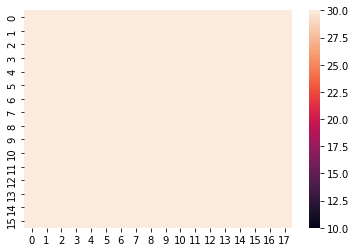

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_001501.jpg


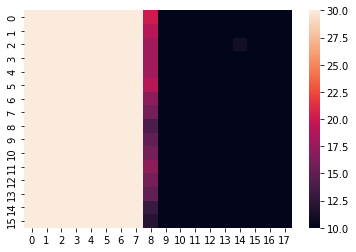

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_175555.jpg


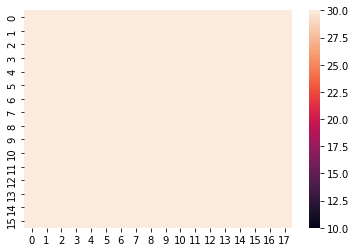

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_071338.jpg


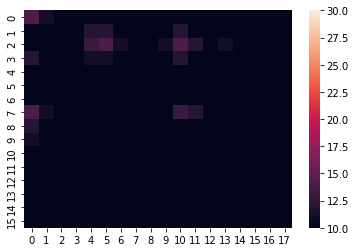

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_072925.jpg


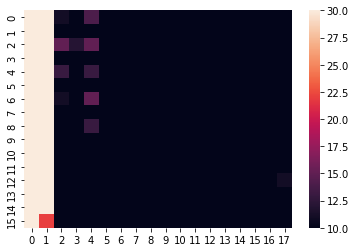

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_205943.jpg


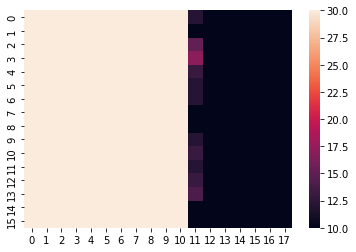

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_154036.jpg


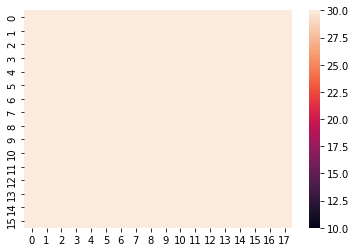

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_001349.jpg


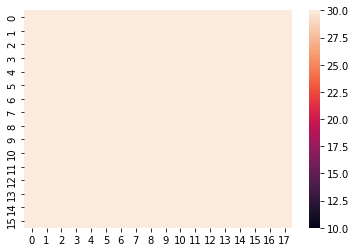

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_143310.jpg


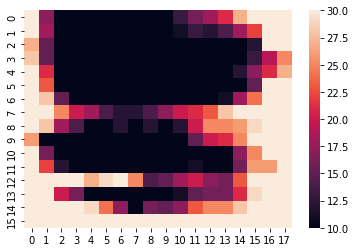

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_234642.jpg


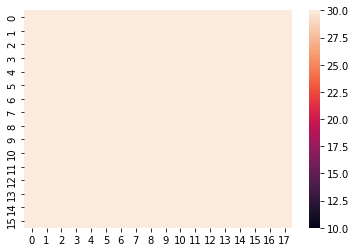

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_150504.jpg


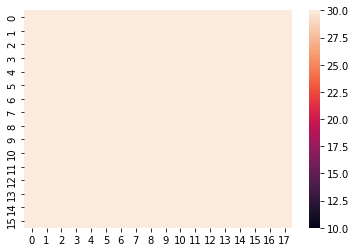

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_101428.jpg


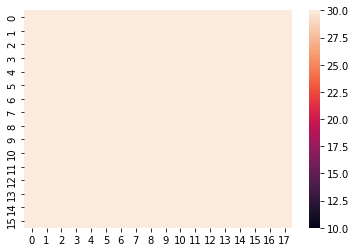

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_024551.jpg


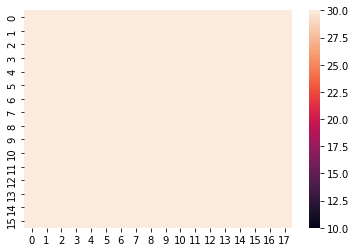

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_000432.jpg


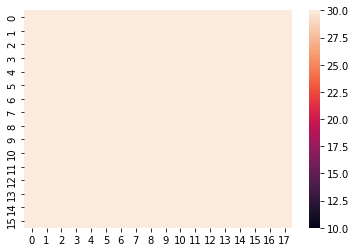

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_142959.jpg


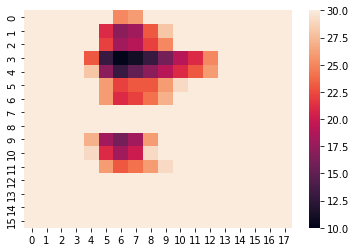

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_093715.jpg


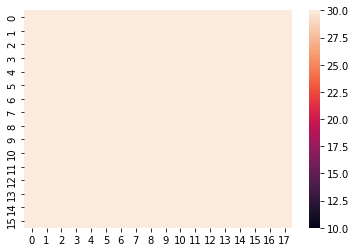

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_074535.jpg


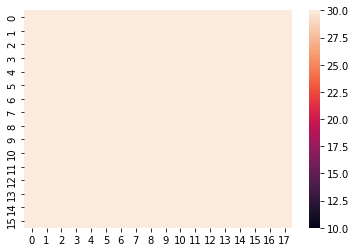

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_053751.jpg


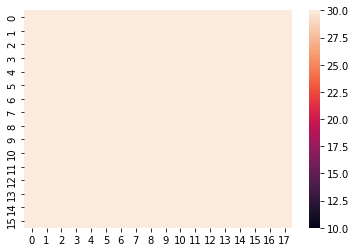

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_141709.jpg


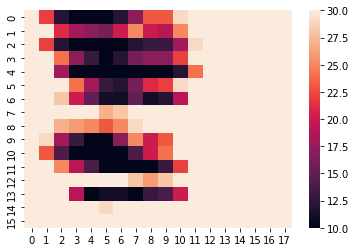

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_151443.jpg


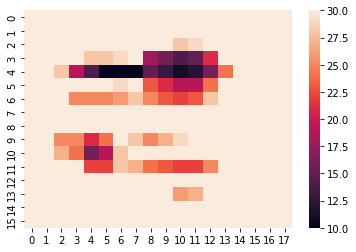

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_013119.jpg


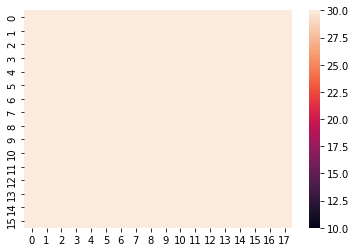

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_032449.jpg


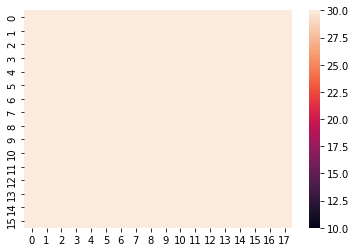

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_130812.jpg


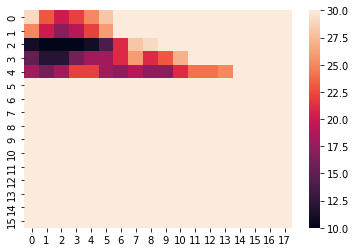

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_102541.jpg


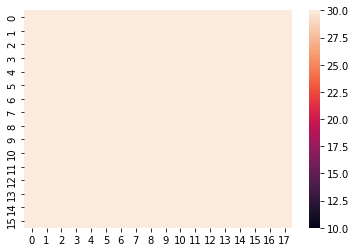

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_183247.jpg


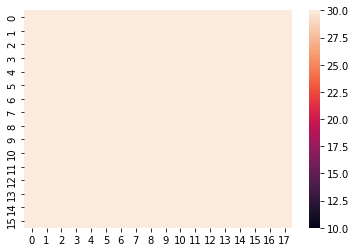

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_050716.jpg


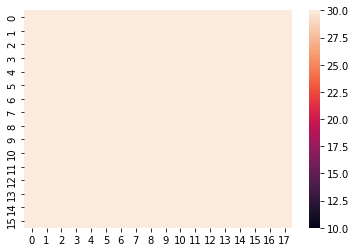

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_134330.jpg


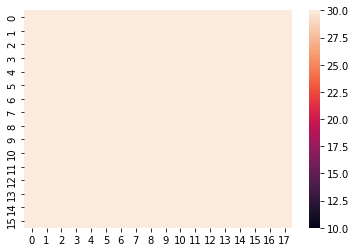

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_215413.jpg


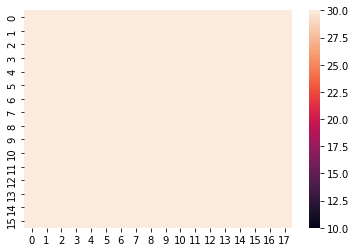

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_181224.jpg


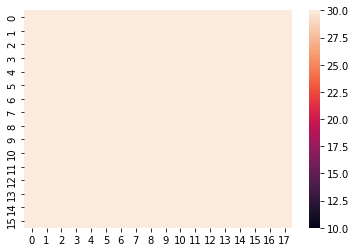

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_141159.jpg


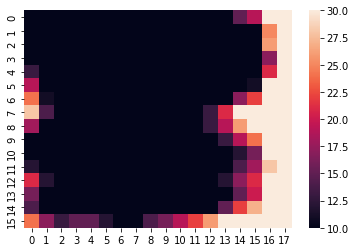

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_190510.jpg


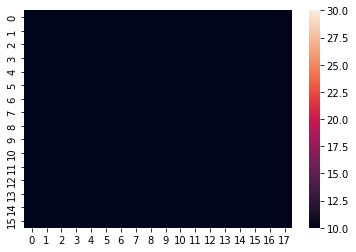

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_122015.jpg


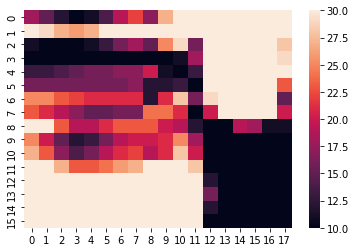

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_182208.jpg


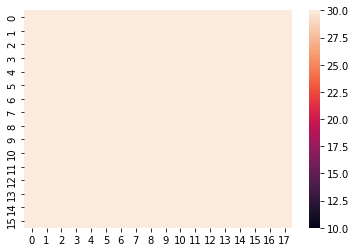

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_041101.jpg


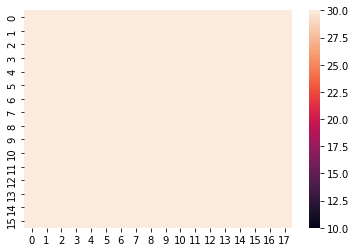

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_202951.jpg


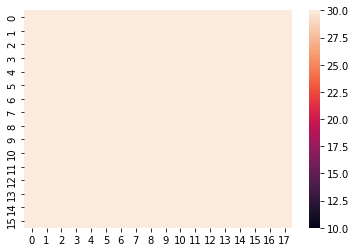

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_204344.jpg


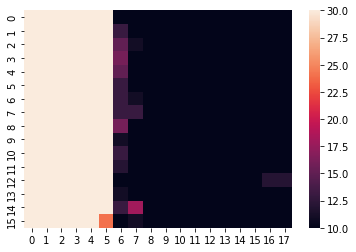

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_104622.jpg


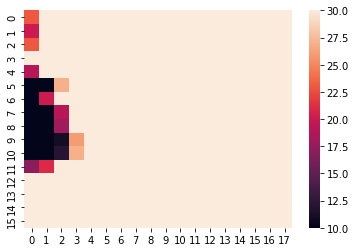

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_103353.jpg


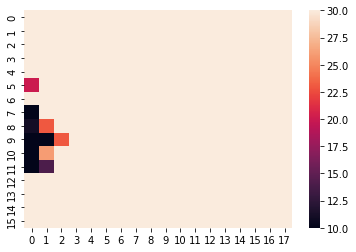

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_183053.jpg


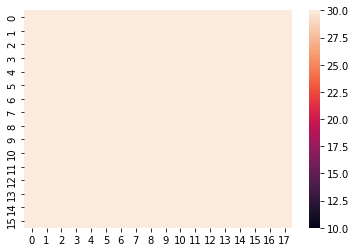

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_160858.jpg


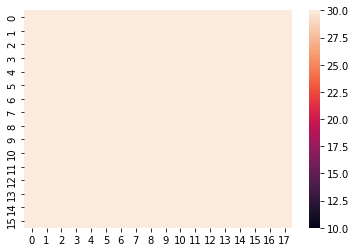

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_131530.jpg


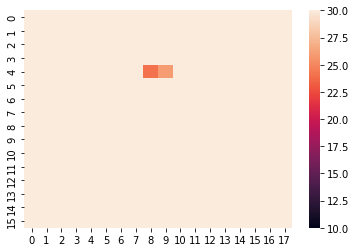

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_172259.jpg


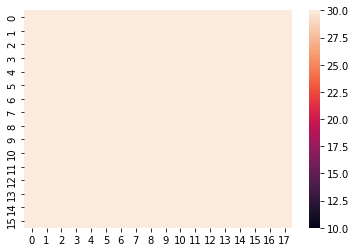

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_051647.jpg


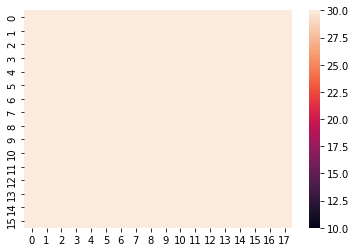

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_033530.jpg


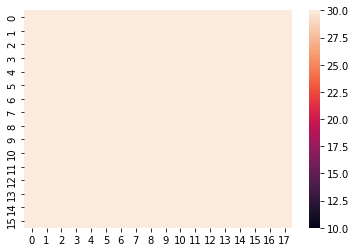

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_015422.jpg


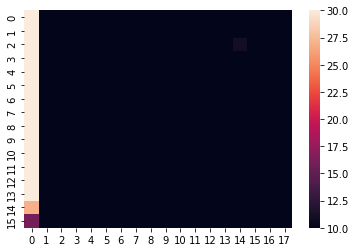

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_232519.jpg


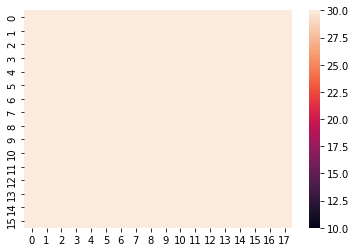

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_142439.jpg


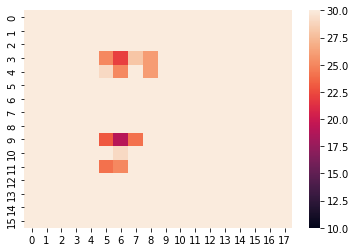

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_092443.jpg


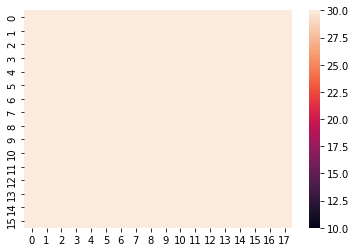

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_050408.jpg


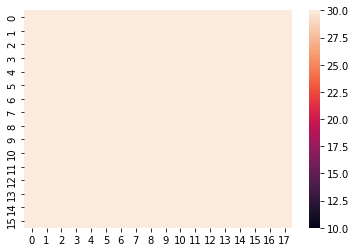

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_063105.jpg


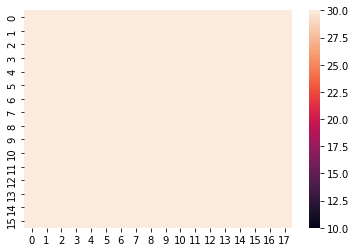

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_043219.jpg


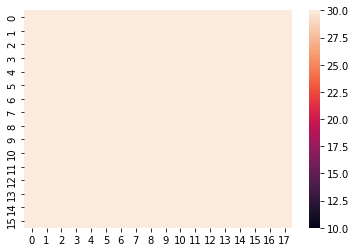

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_103904.jpg


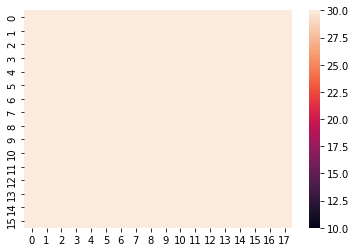

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_190252.jpg


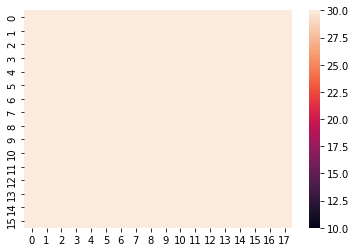

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211227_233353.jpg


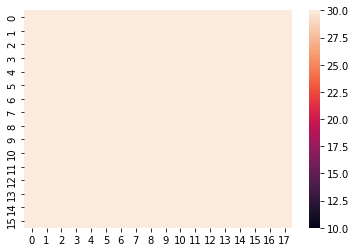

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_021007.jpg


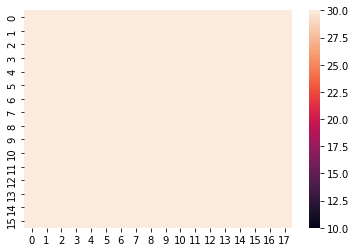

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_223217.jpg


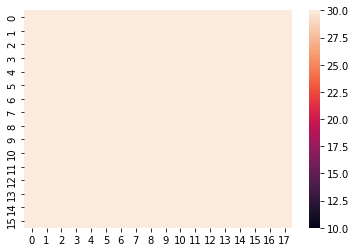

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_232053.jpg


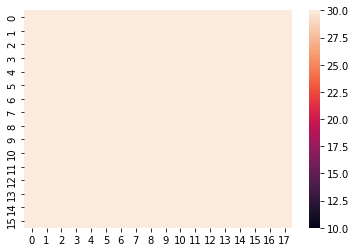

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_194158.jpg


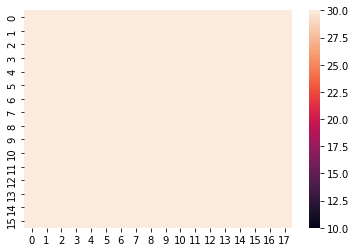

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_040540.jpg


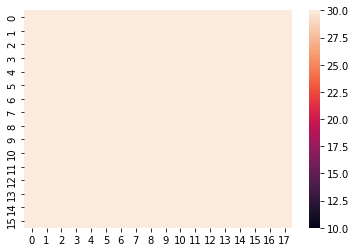

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_142737.jpg


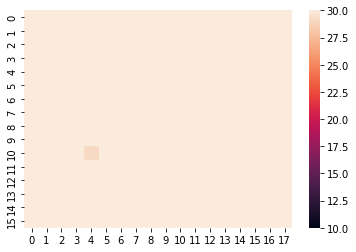

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_125017.jpg


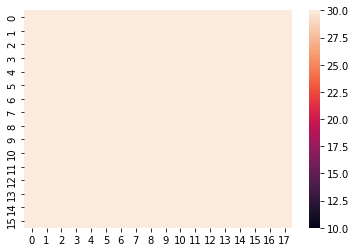

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_073815.jpg


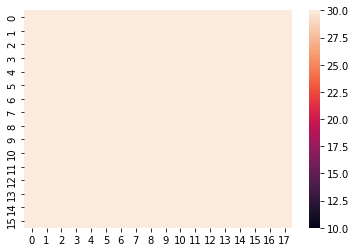

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_101756.jpg


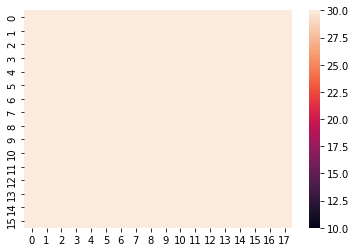

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_113454.jpg


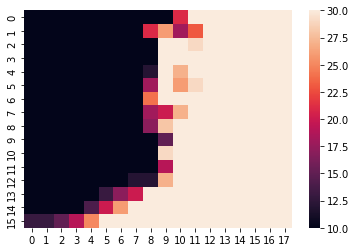

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_100909.jpg


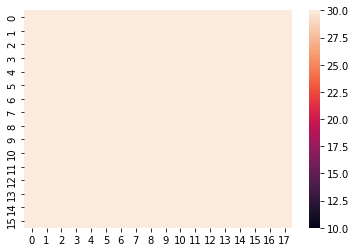

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_133517.jpg


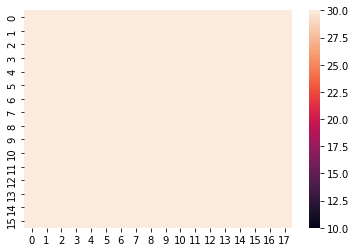

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_114624.jpg


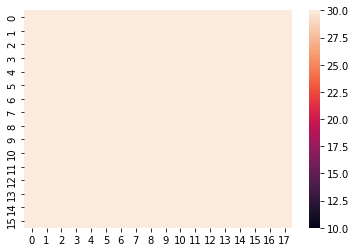

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_091404.jpg


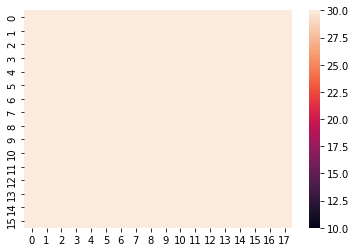

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_185442.jpg


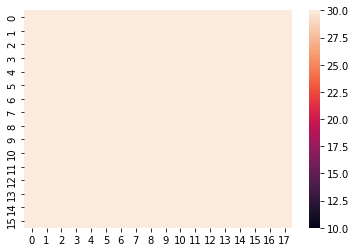

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_121134.jpg


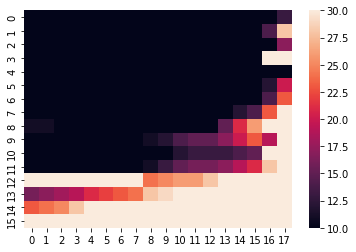

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_125359.jpg


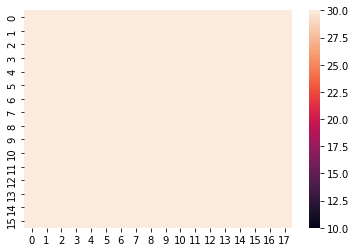

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_035647.jpg


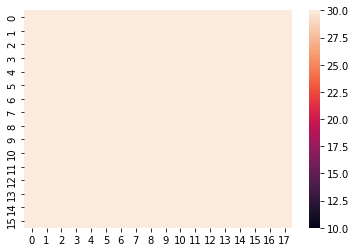

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_081055.jpg


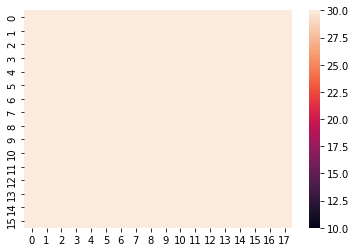

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_231450.jpg


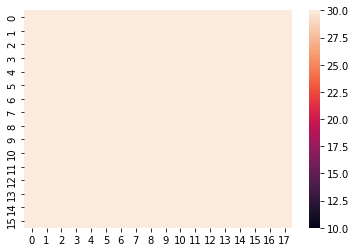

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_010628.jpg


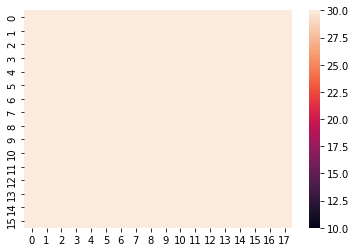

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_104949.jpg


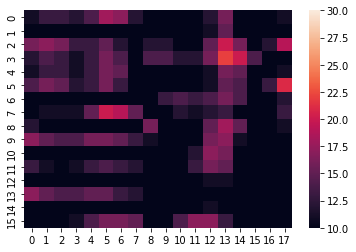

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_212302.jpg


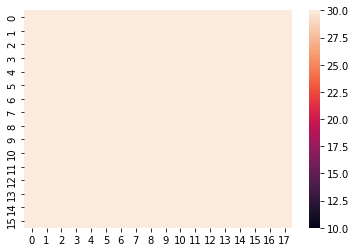

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_144347.jpg


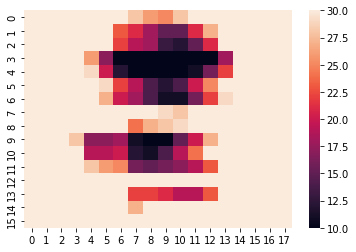

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_072218.jpg


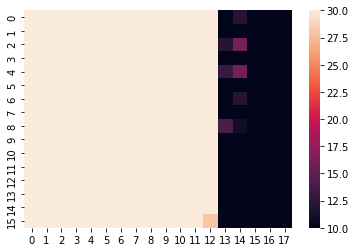

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_045037.jpg


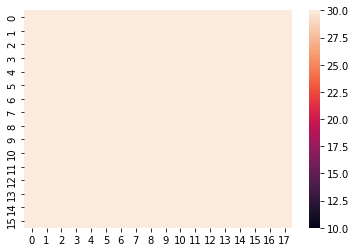

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_155634.jpg


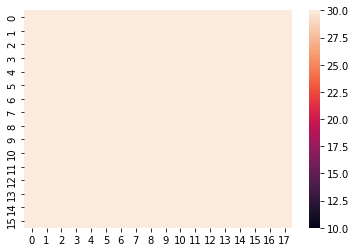

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_085444.jpg


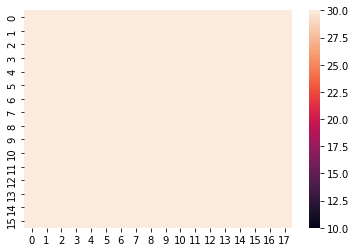

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_204029.jpg


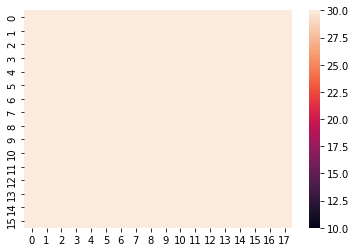

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_172828.jpg


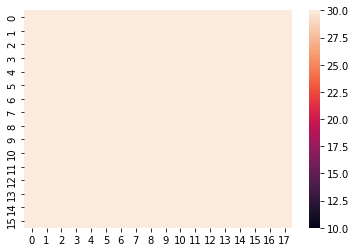

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_194611.jpg


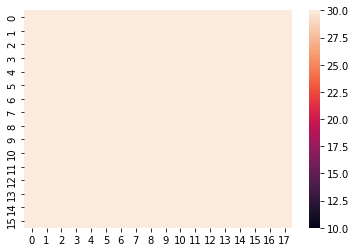

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_171620.jpg


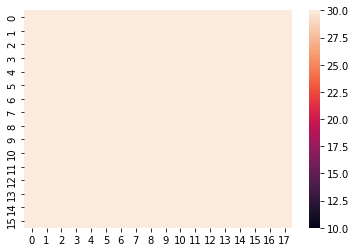

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_054830.jpg


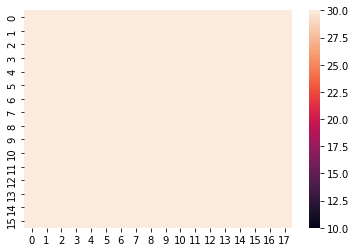

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_044156.jpg


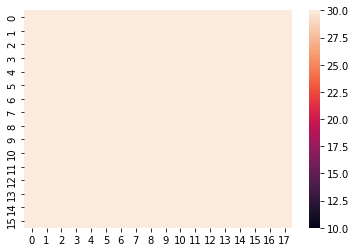

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_012226.jpg


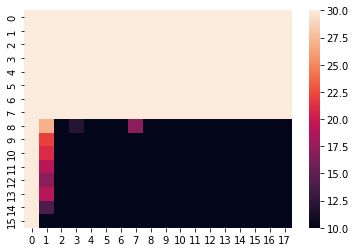

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_182933.jpg


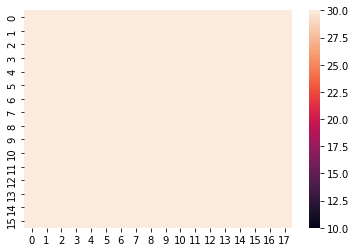

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_234452.jpg


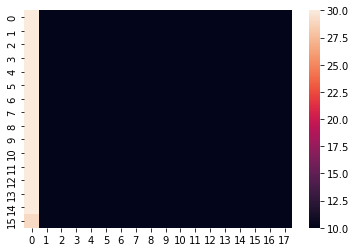

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_104103.jpg


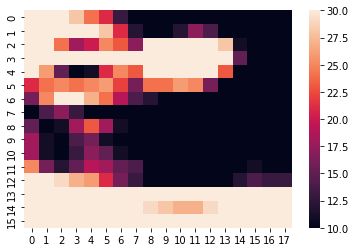

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_064218.jpg


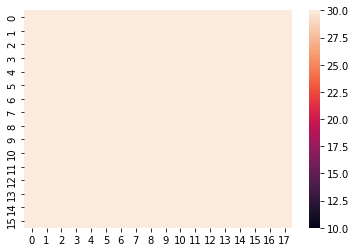

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_065740.jpg


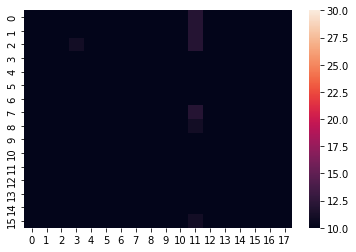

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_075414.jpg


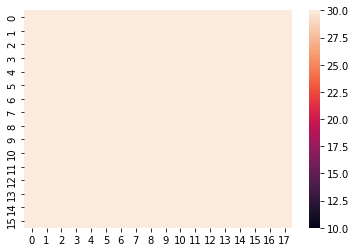

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_191921.jpg


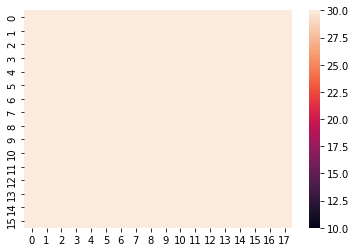

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_114009.jpg


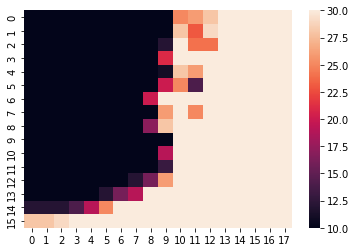

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_092118.jpg


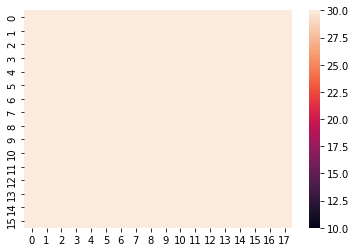

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_204903.jpg


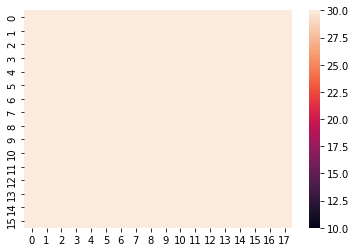

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_200755.jpg


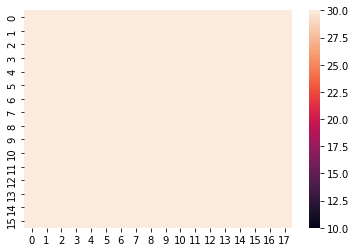

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_154555.jpg


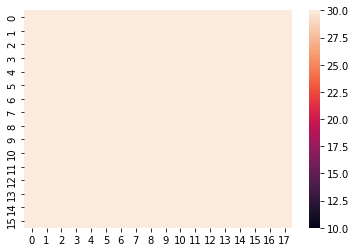

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_155633.jpg


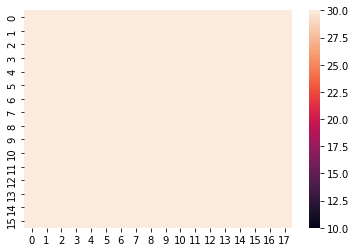

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_221418.jpg


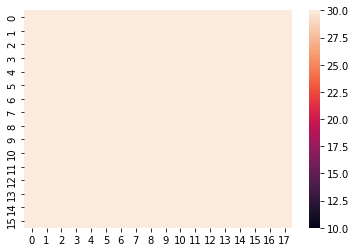

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_222138.jpg


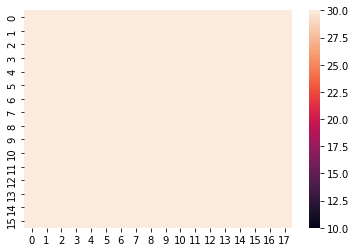

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_194955.jpg


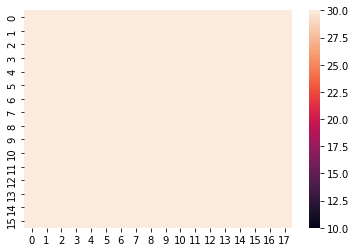

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_025254.jpg


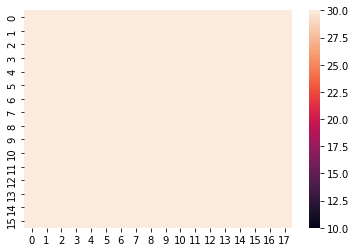

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_183807.jpg


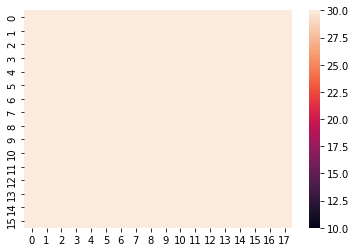

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_142605.jpg


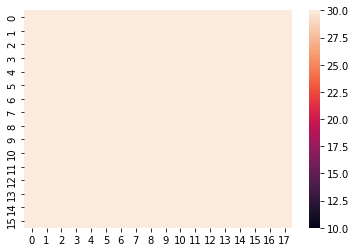

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_190810.jpg


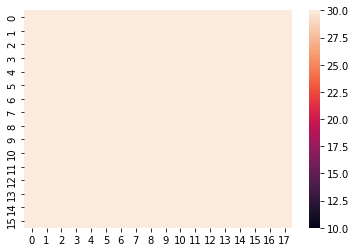

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_133002.jpg


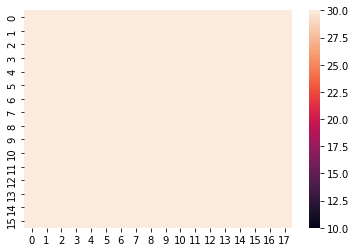

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_093156.jpg


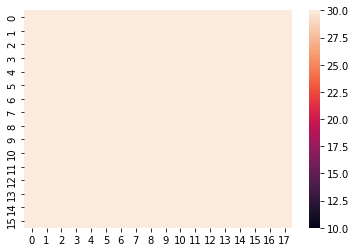

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_203510.jpg


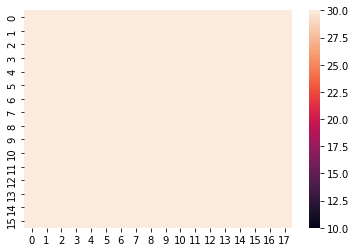

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_005925.jpg


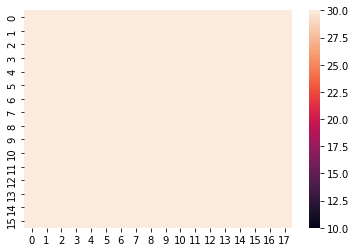

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_082250.jpg


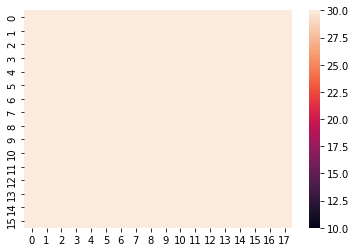

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_100718.jpg


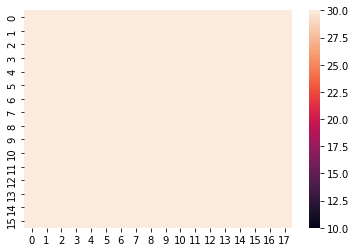

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_170022.jpg


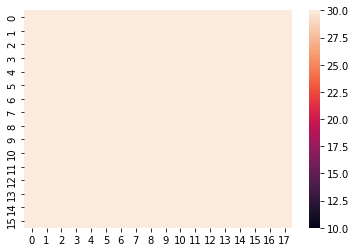

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_042139.jpg


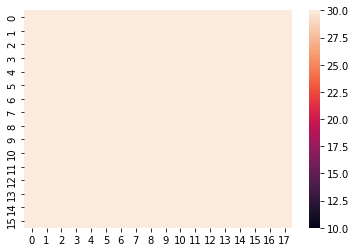

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_120222.jpg


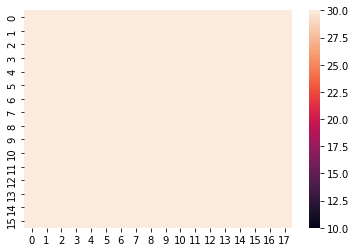

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_150839.jpg


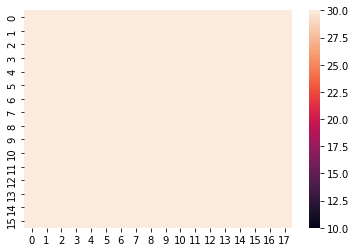

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_042659.jpg


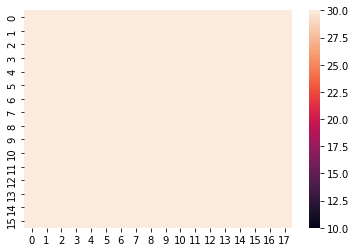

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_060231.jpg


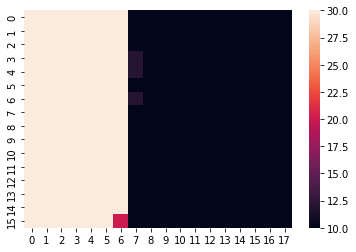

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_121150.jpg


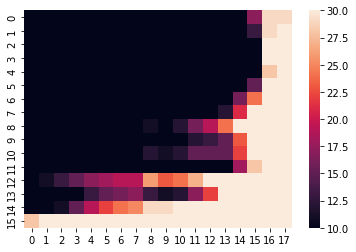

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_140841.jpg


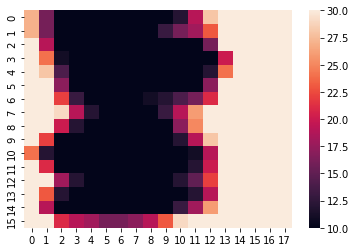

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_164614.jpg


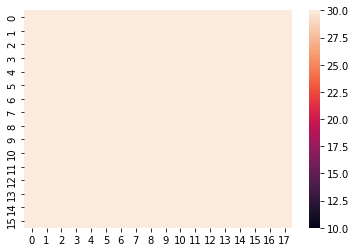

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_154608.jpg


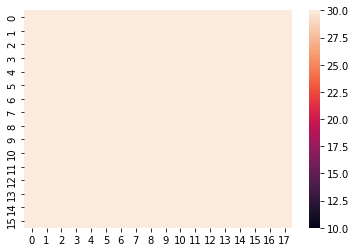

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_122900.jpg


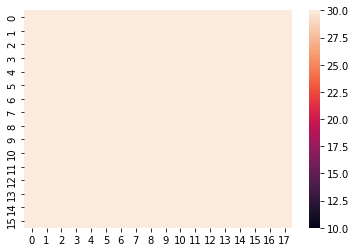

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_184927.jpg


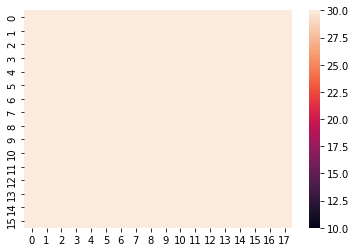

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_205423.jpg


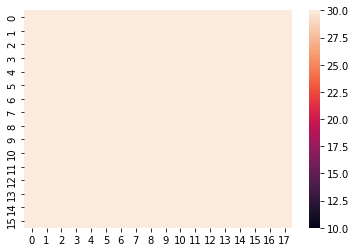

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_150046.jpg


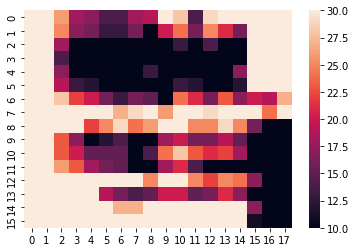

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_232852.jpg


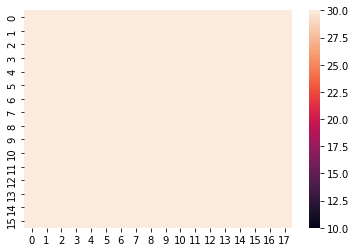

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_151229.jpg


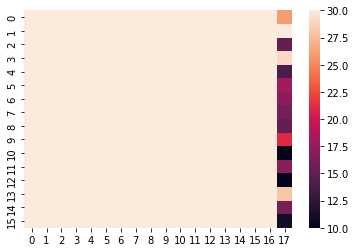

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_012116.jpg


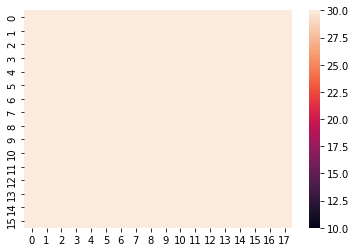

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_082610.jpg


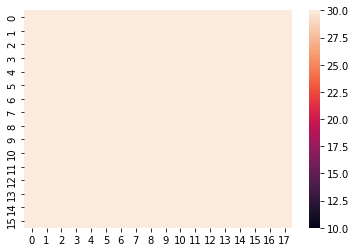

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_003951.jpg


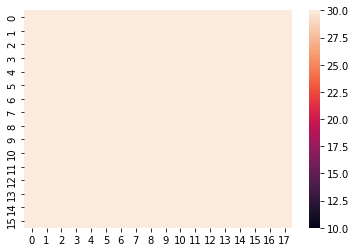

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_004536.jpg


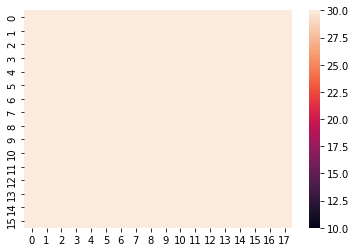

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_022433.jpg


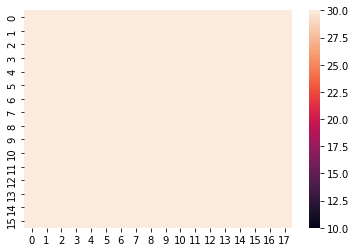

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_152102.jpg


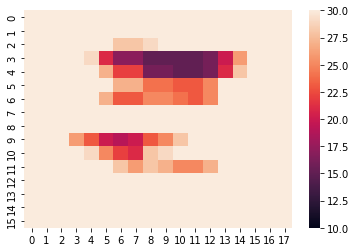

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_055153.jpg


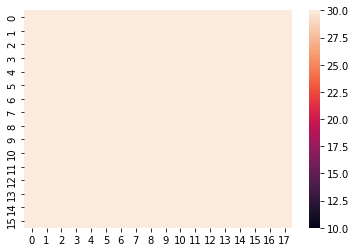

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_203405.jpg


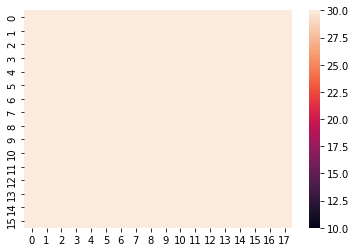

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_125213.jpg


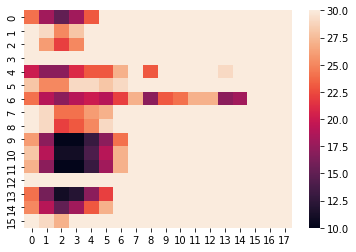

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_162457.jpg


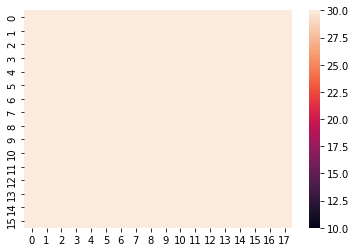

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_153539.jpg


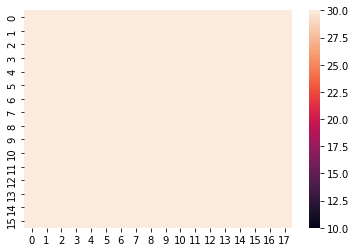

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_192927.jpg


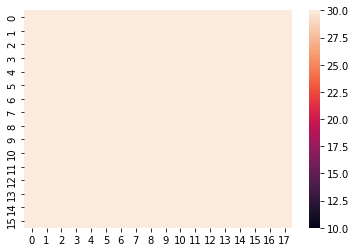

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_113546.jpg


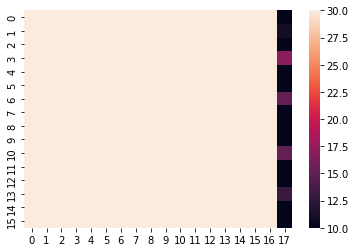

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_191641.jpg


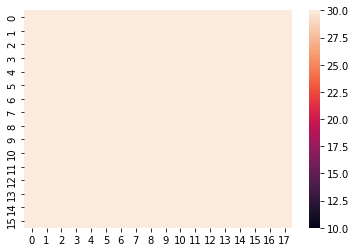

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_072417.jpg


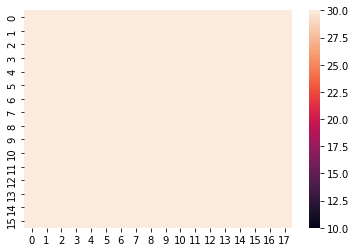

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_210120.jpg


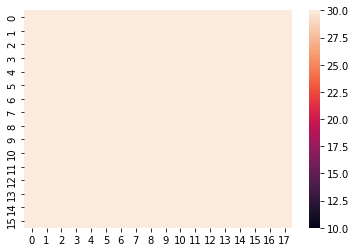

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_131011.jpg


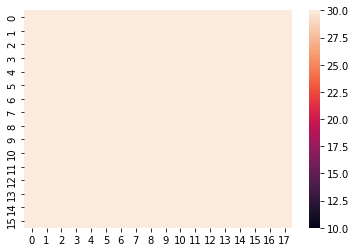

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_044815.jpg


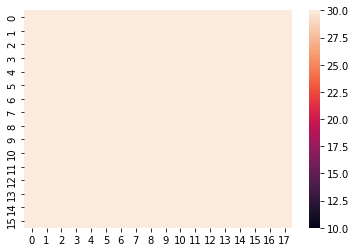

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_110027.jpg


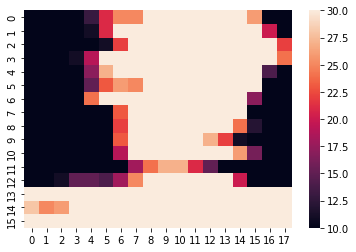

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_133252.jpg


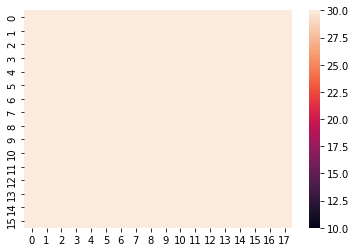

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_024031.jpg


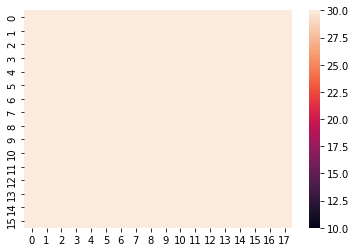

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_033345.jpg


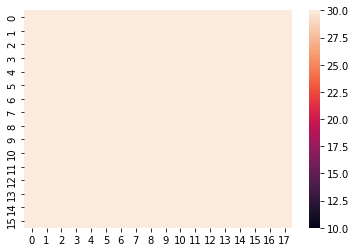

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_220020.jpg


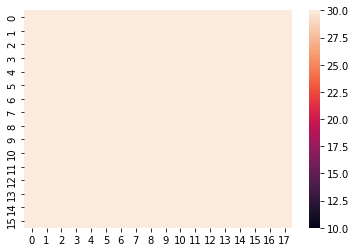

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_031748.jpg


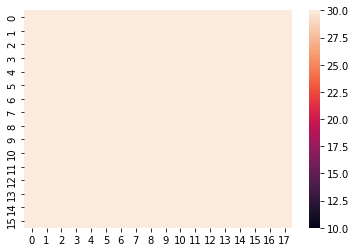

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_012211.jpg


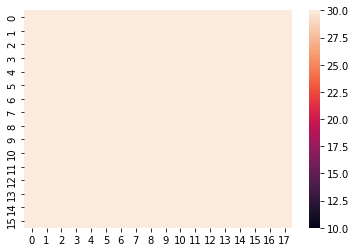

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_084727.jpg


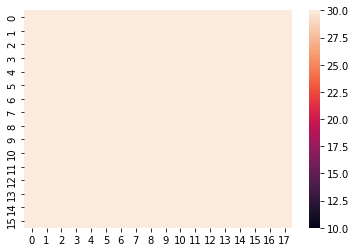

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_052713.jpg


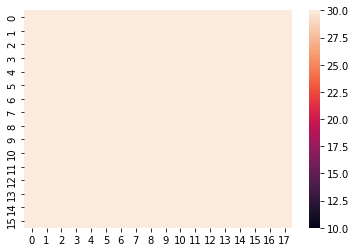

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_095446.jpg


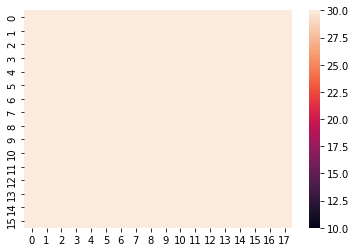

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_230214.jpg


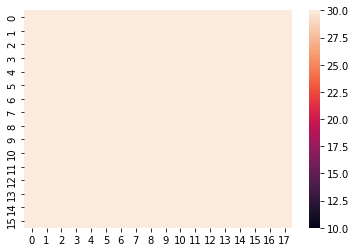

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_155114.jpg


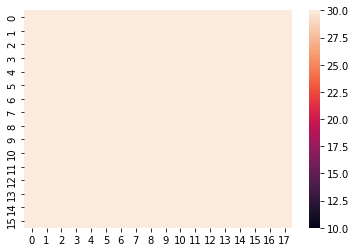

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_043918.jpg


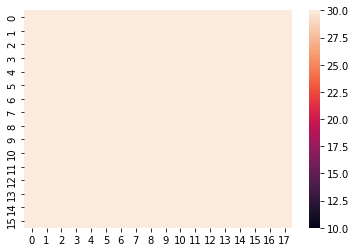

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_150929.jpg


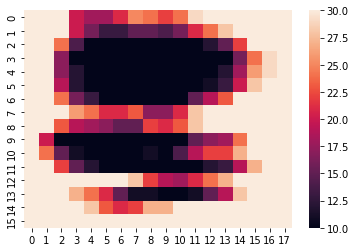

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_044256.jpg


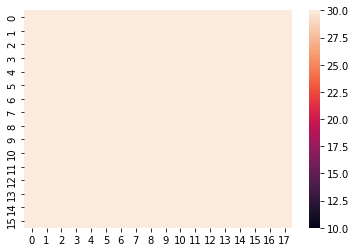

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_195553.jpg


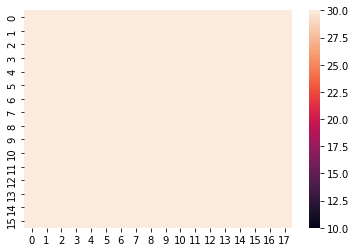

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_201146.jpg


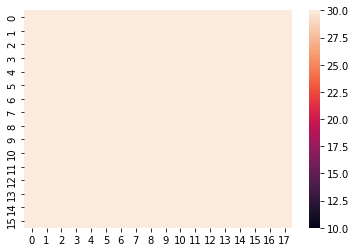

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_043922.jpg


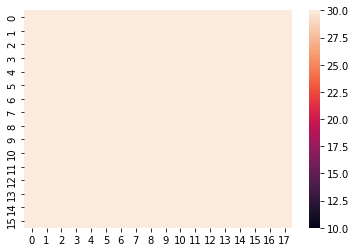

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_204548.jpg


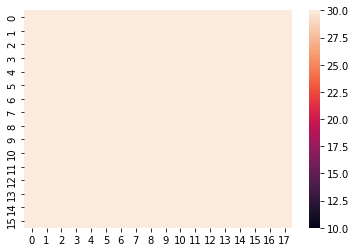

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_184846.jpg


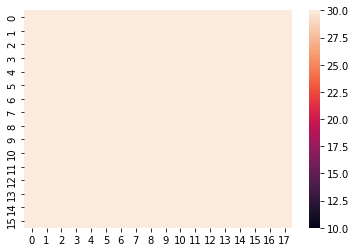

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_131936.jpg


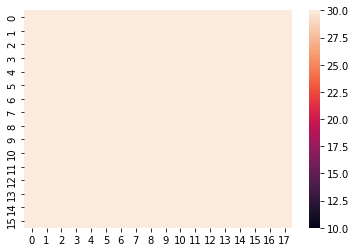

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_155300.jpg


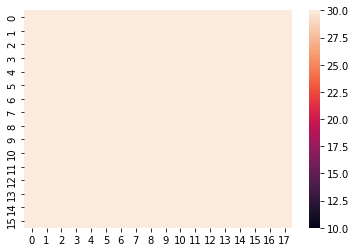

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_231813.jpg


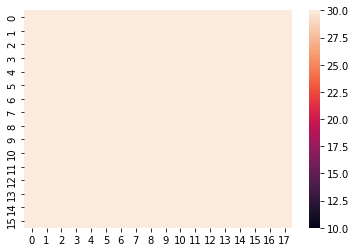

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_144722.jpg


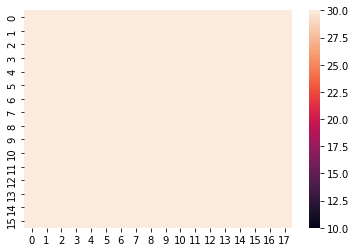

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_123613.jpg


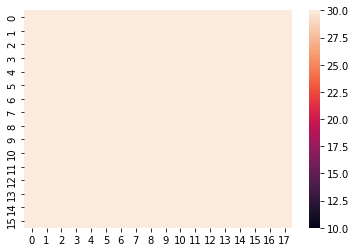

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_012745.jpg


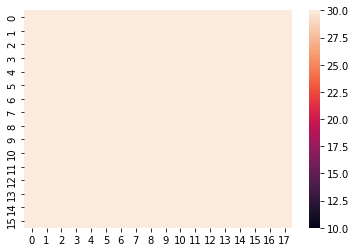

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_111703.jpg


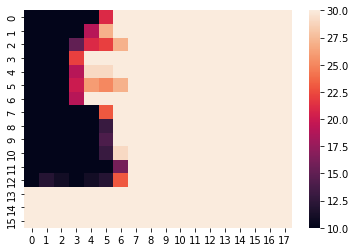

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_125240.jpg


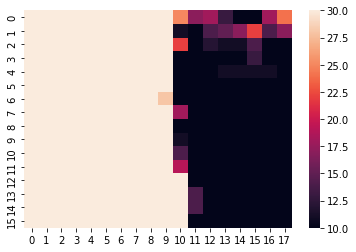

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_211224.jpg


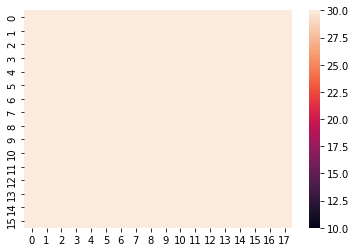

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_002210.jpg


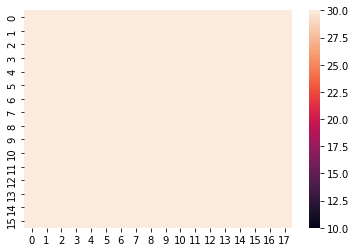

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_101947.jpg


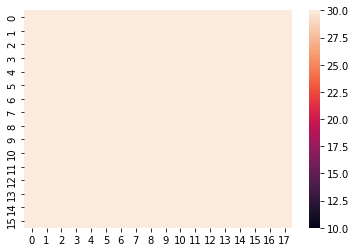

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_232528.jpg


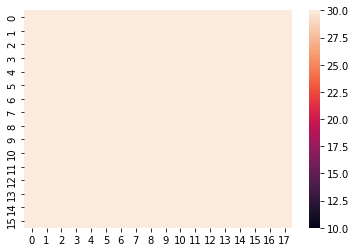

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_120742.jpg


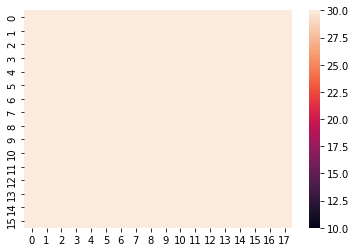

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_030852.jpg


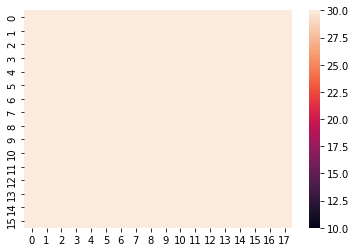

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_043403.jpg


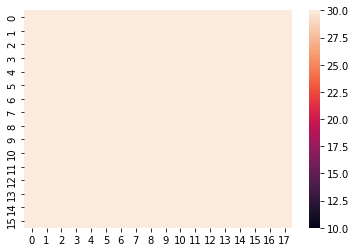

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_210528.jpg


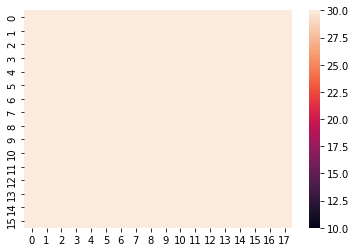

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_041437.jpg


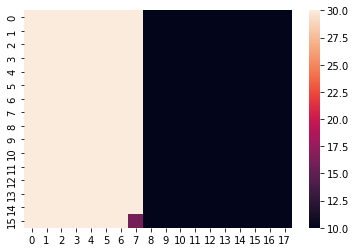

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_150151.jpg


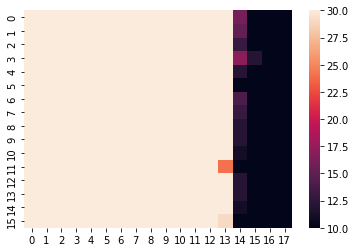

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_223536.jpg


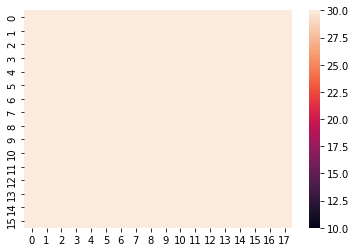

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_121821.jpg


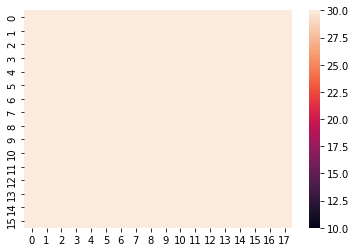

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_111912.jpg


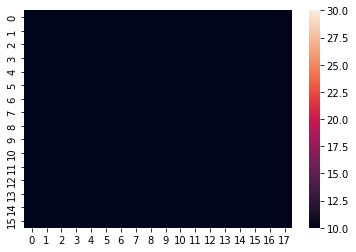

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_222457.jpg


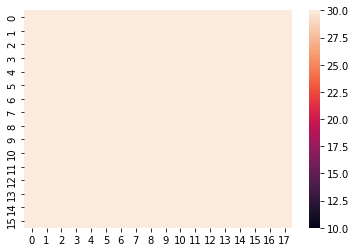

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_083129.jpg


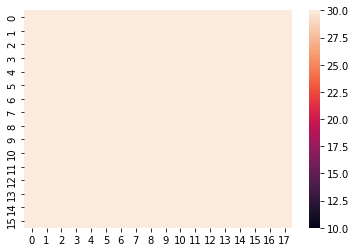

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_151023.jpg


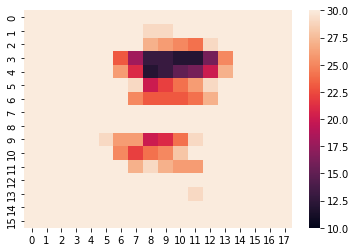

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_080651.jpg


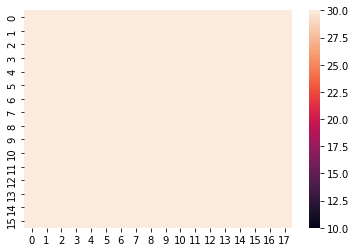

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_185926.jpg


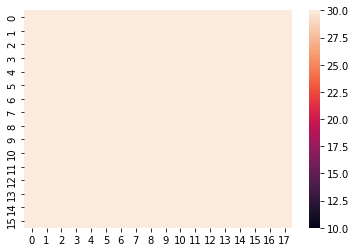

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_094041.jpg


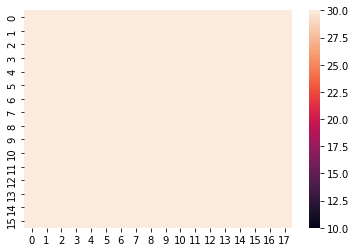

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_150319.jpg


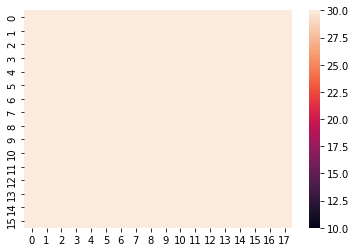

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_200629.jpg


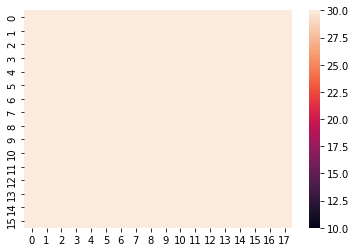

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_074335.jpg


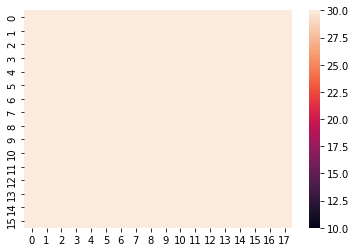

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_001738.jpg


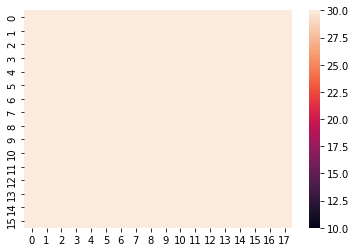

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_123250.jpg


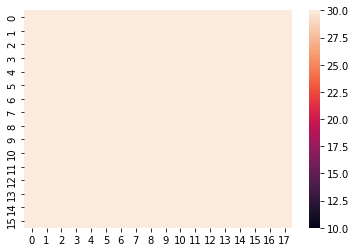

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_072041.jpg


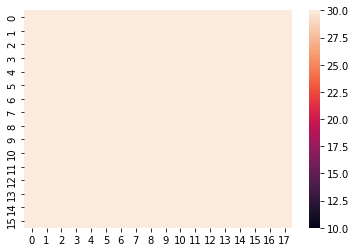

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_214220.jpg


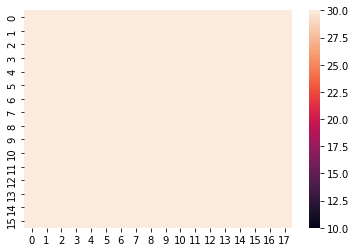

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_211743.jpg


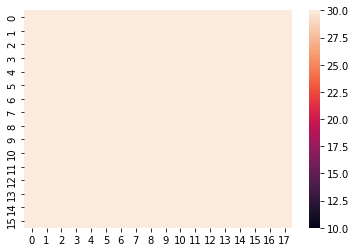

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_164425.jpg


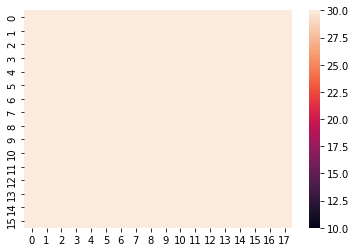

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_170435.jpg


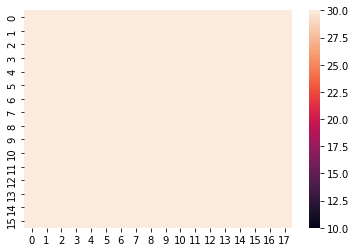

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_140639.jpg


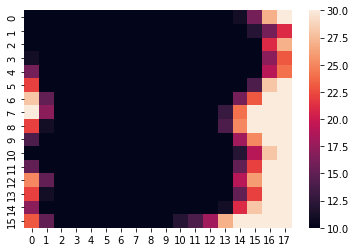

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_133647.jpg


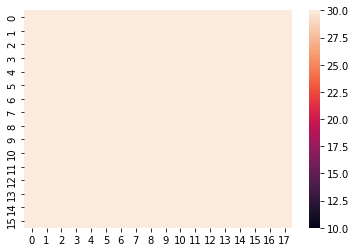

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_200834.jpg


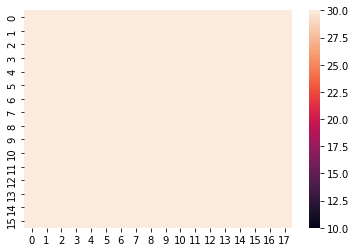

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_044441.jpg


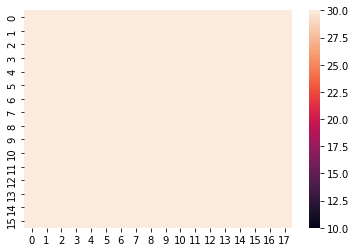

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_061935.jpg


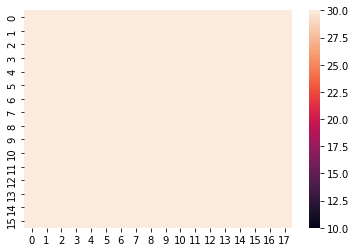

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_233932.jpg


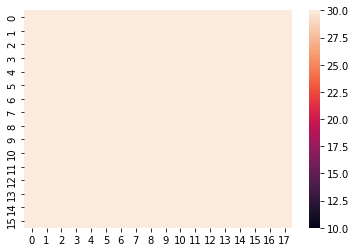

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_112940.jpg


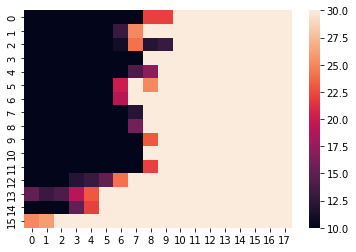

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_094600.jpg


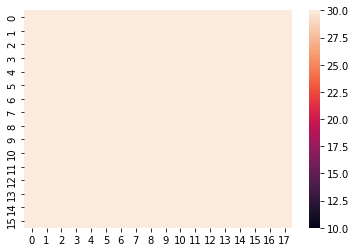

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_143251.jpg


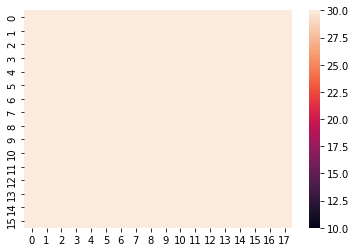

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_053557.jpg


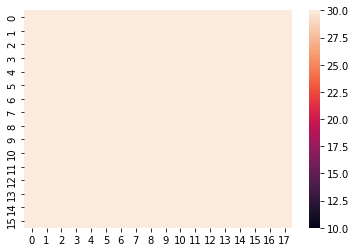

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_014719.jpg


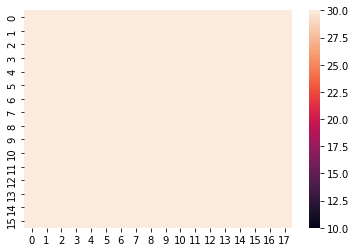

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_201912.jpg


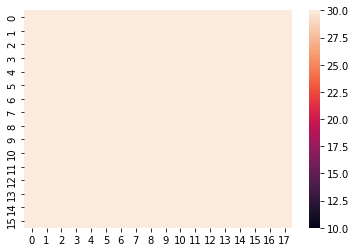

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_140121.jpg


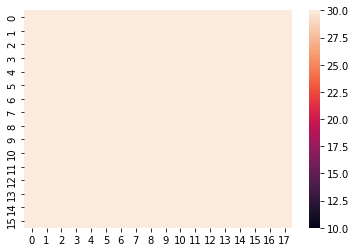

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_162243.jpg


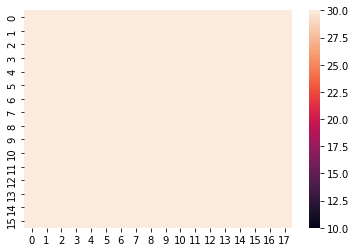

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_045000.jpg


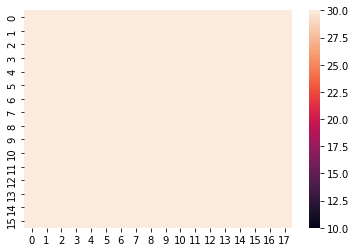

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_144906.jpg


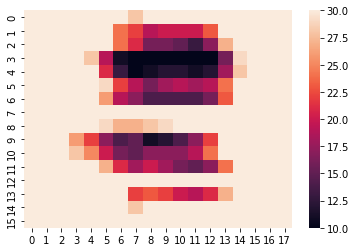

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_044557.jpg


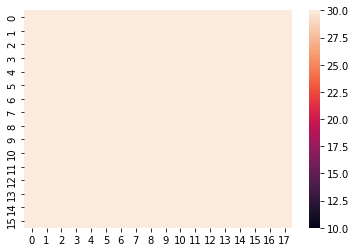

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_141716.jpg


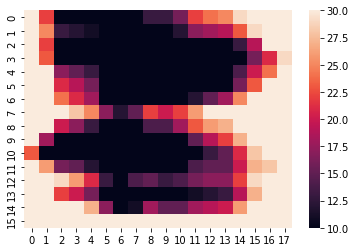

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_124133.jpg


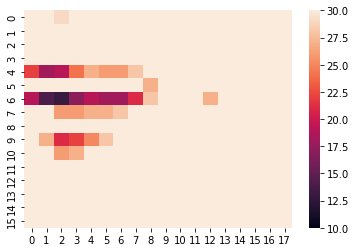

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_115143.jpg


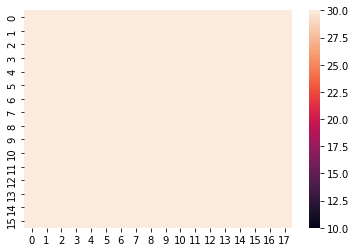

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_054311.jpg


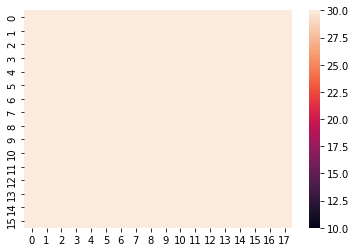

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_005549.jpg


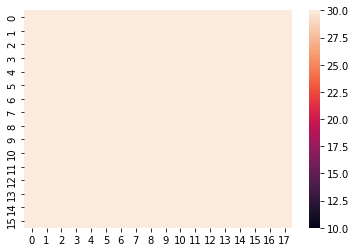

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_151542.jpg


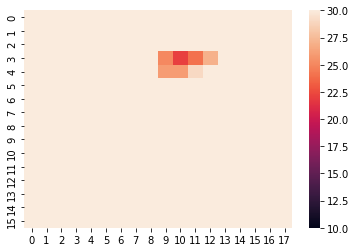

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_033245.jpg


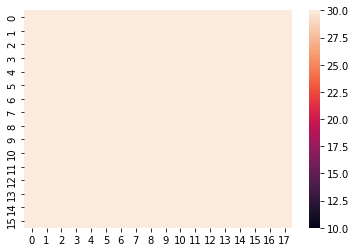

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_141401.jpg


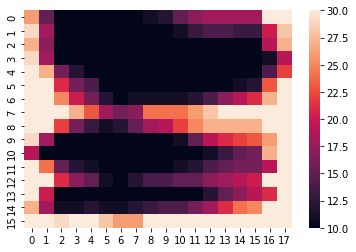

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_232754.jpg


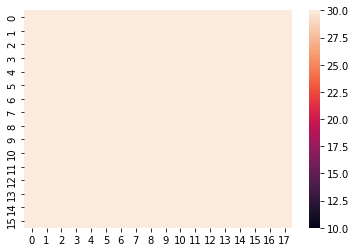

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_123054.jpg


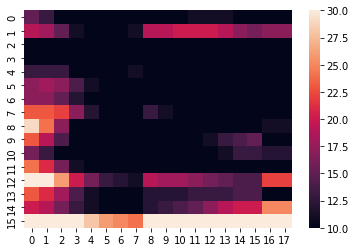

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_042843.jpg


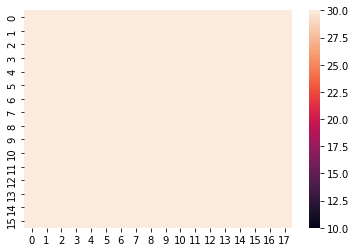

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_182728.jpg


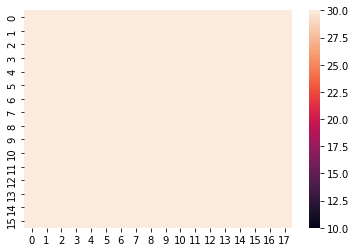

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_235201.jpg


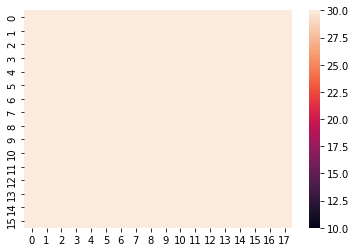

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_191849.jpg


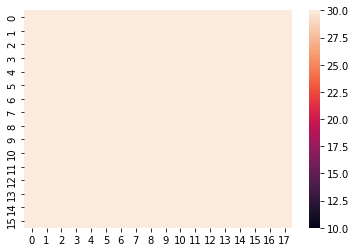

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_163229.jpg


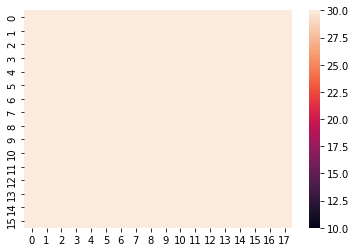

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_181753.jpg


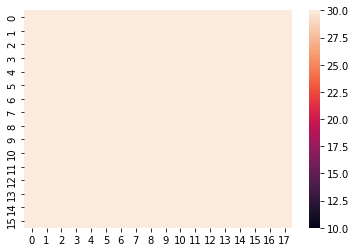

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_233412.jpg


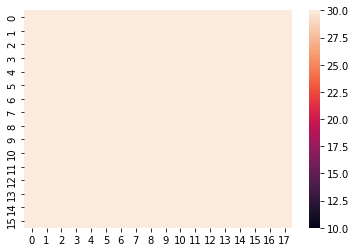

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_011003.jpg


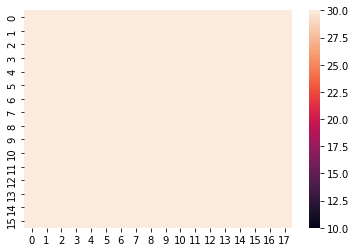

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_121649.jpg


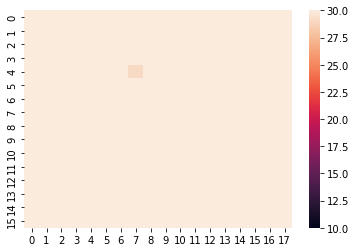

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_215819.jpg


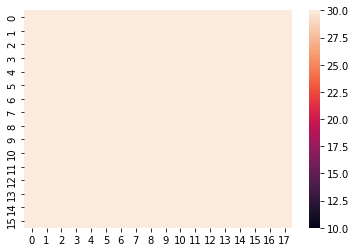

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_184413.jpg


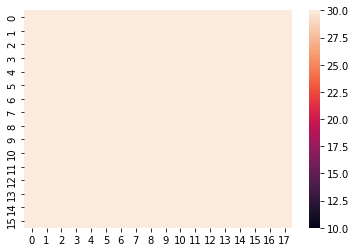

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_123419.jpg


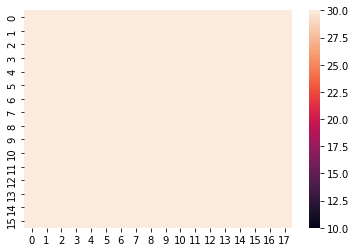

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_055530.jpg


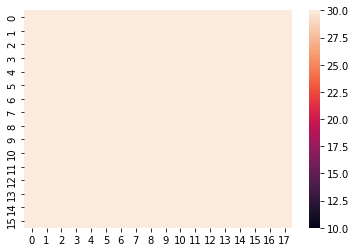

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_181129.jpg


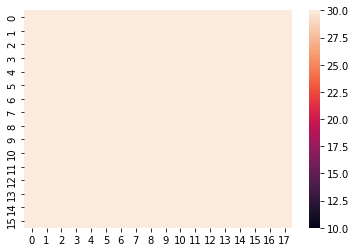

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_135612.jpg


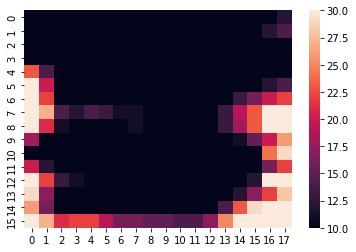

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_205108.jpg


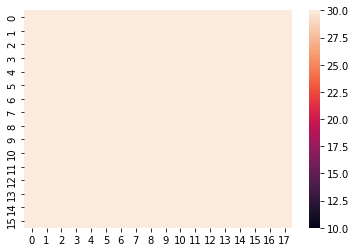

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_172206.jpg


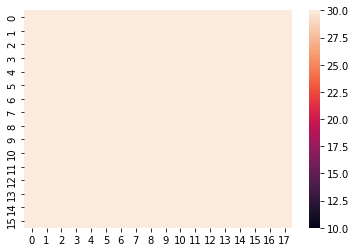

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220110_053743.jpg


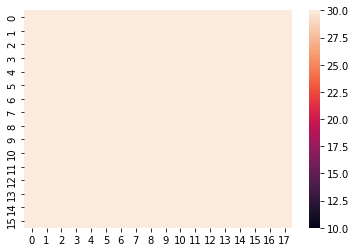

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_232010.jpg


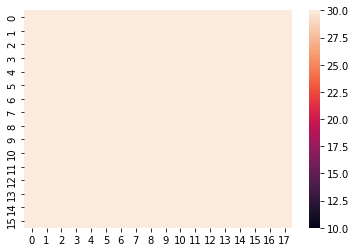

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_182323.jpg


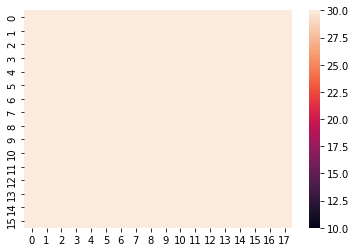

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_051913.jpg


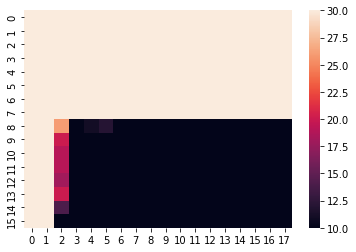

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_173928.jpg


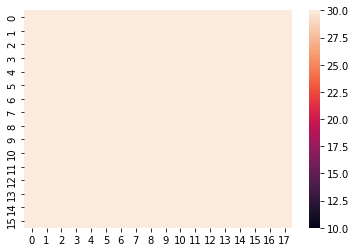

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_175815.jpg


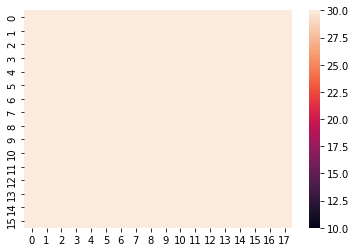

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_180609.jpg


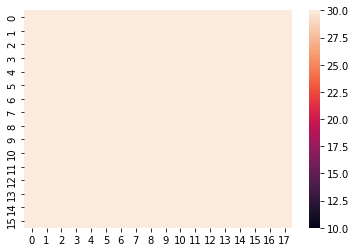

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_025558.jpg


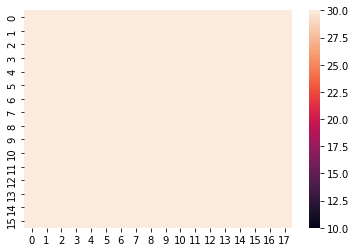

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_033353.jpg


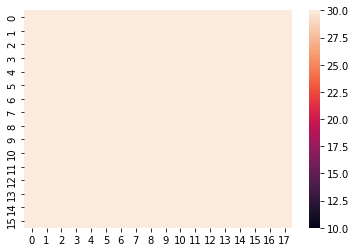

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_131135.jpg


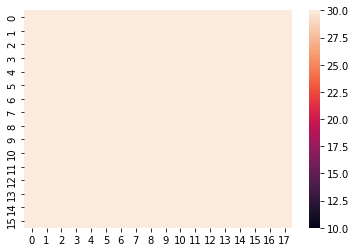

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_045333.jpg


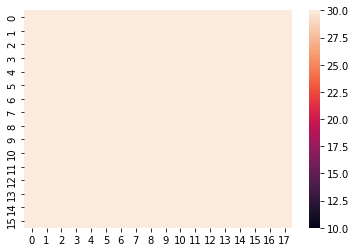

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_201343.jpg


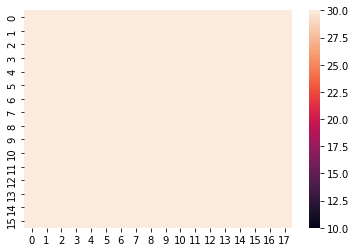

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_191537.jpg


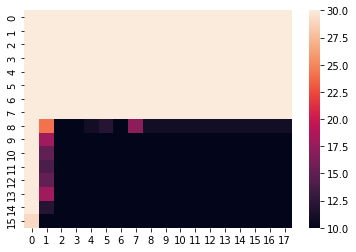

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_123231.jpg


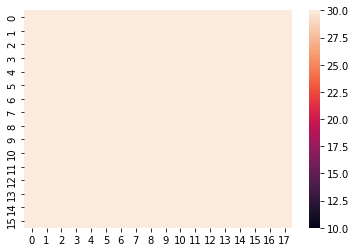

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_032826.jpg


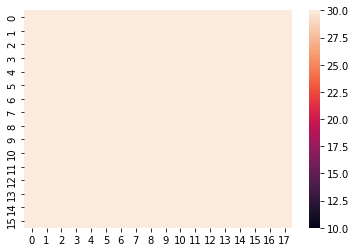

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_045245.jpg


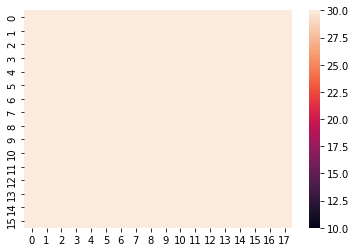

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211230_221508.jpg


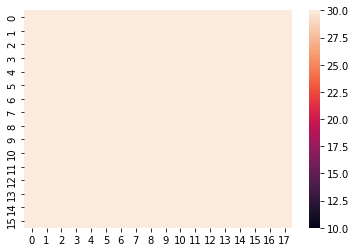

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_210706.jpg


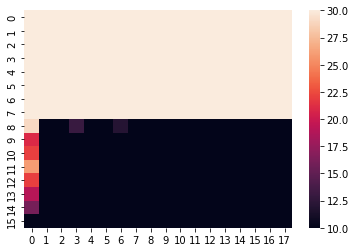

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_195755.jpg


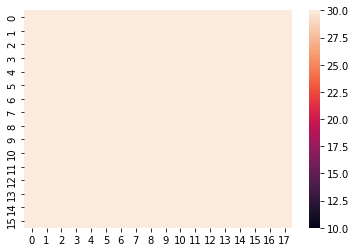

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_182533.jpg


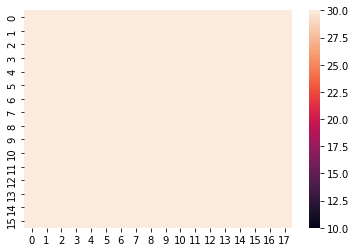

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_112033.jpg


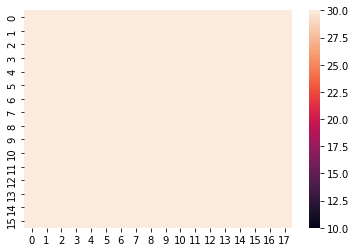

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_011706.jpg


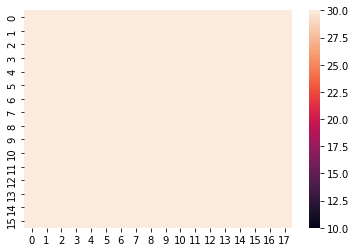

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_140322.jpg


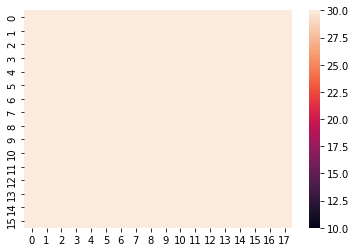

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_224815.jpg


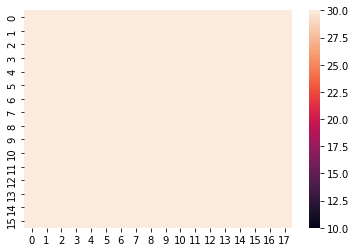

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_022616.jpg


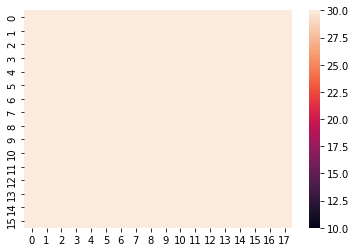

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_185730.jpg


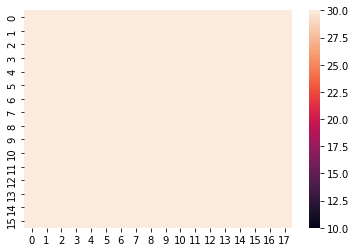

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_061310.jpg


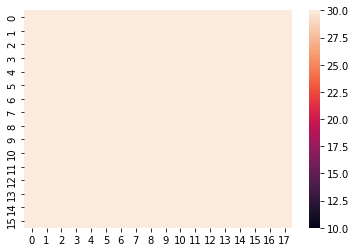

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_141007.jpg


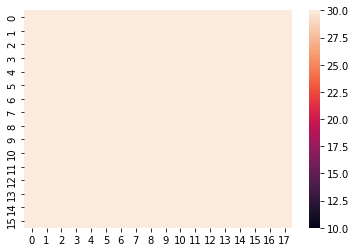

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_131331.jpg


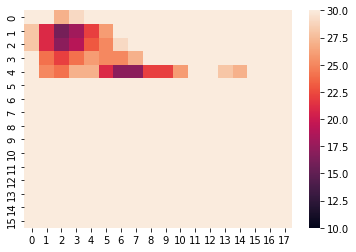

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_153517.jpg


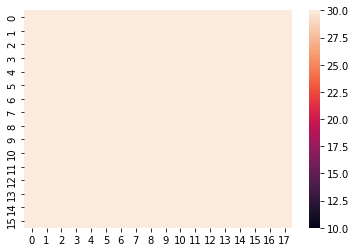

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_060818.jpg


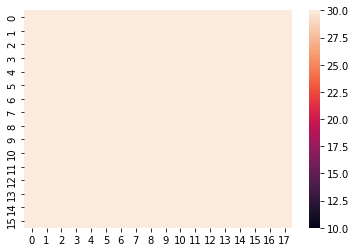

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_194520.jpg


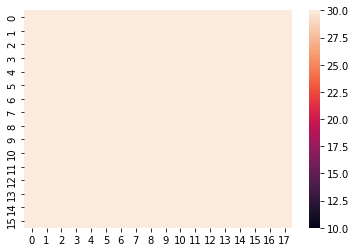

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_121651.jpg


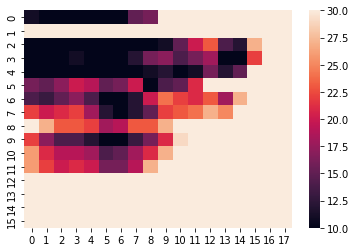

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_070830.jpg


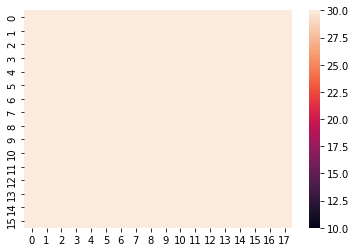

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_151957.jpg


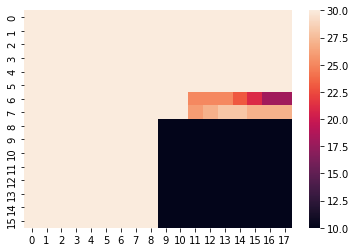

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_030539.jpg


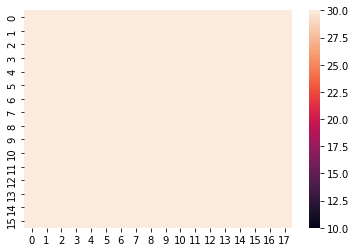

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220104_213434.jpg


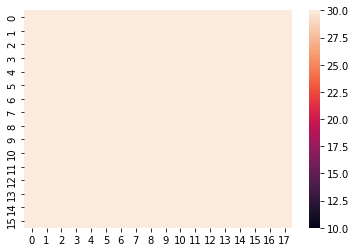

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_124458.jpg


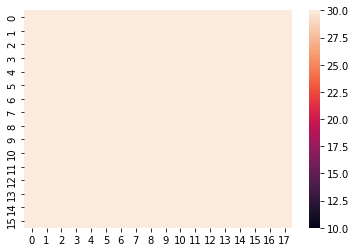

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_010444.jpg


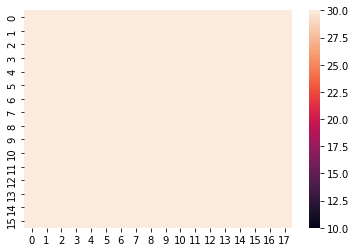

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_121131.jpg


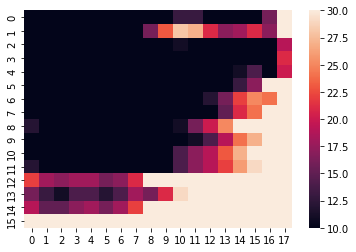

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_080453.jpg


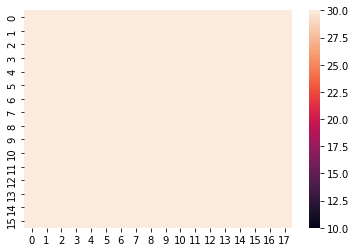

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_114637.jpg


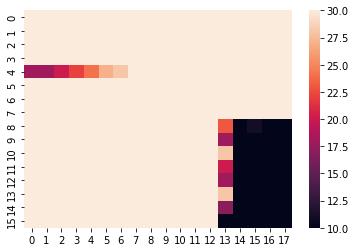

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_191331.jpg


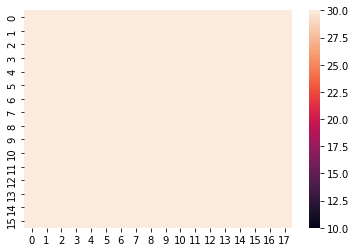

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_075613.jpg


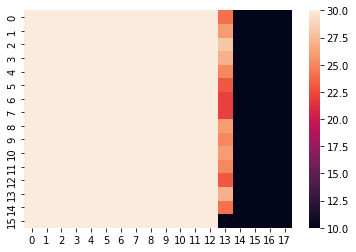

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_112142.jpg


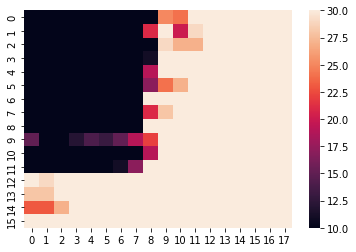

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_113936.jpg


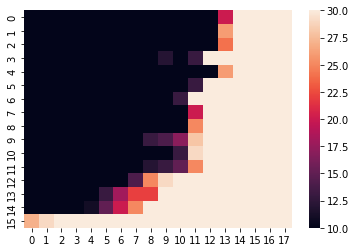

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_161938.jpg


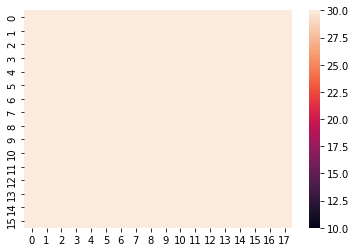

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_001006.jpg


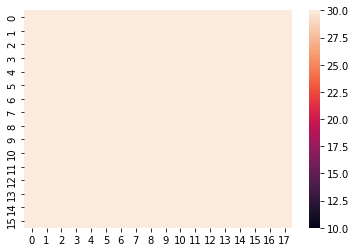

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_161215.jpg


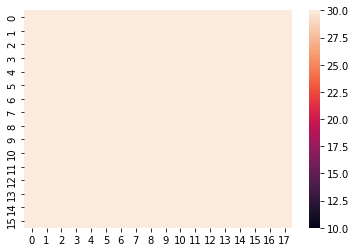

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_132732.jpg


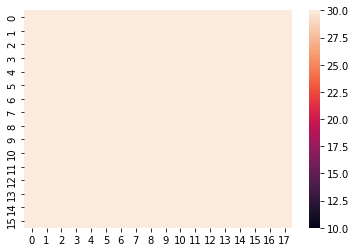

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_095831.jpg


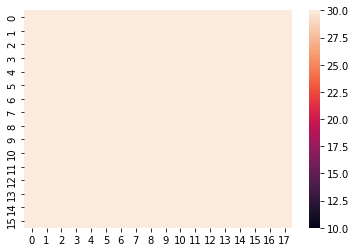

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_180125.jpg


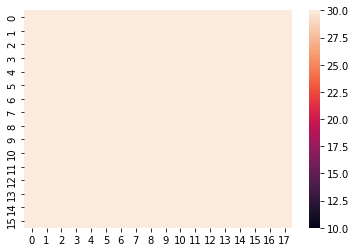

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_152957.jpg


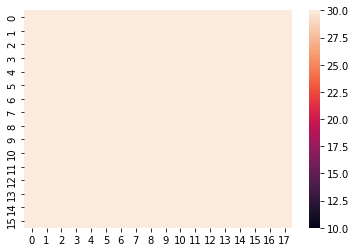

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_184326.jpg


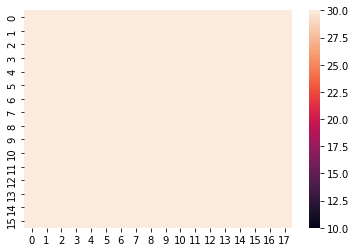

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_160339.jpg


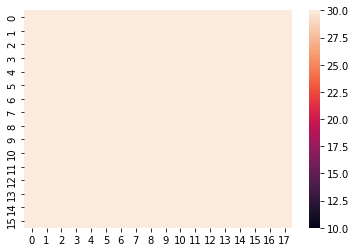

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_160300.jpg


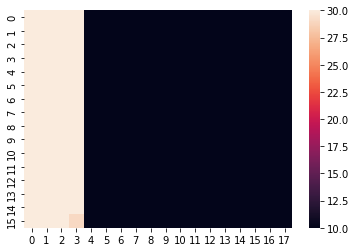

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_040725.jpg


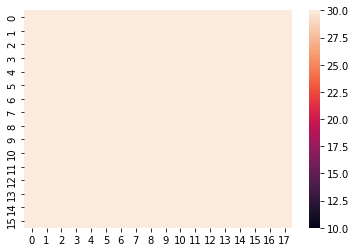

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_212822.jpg


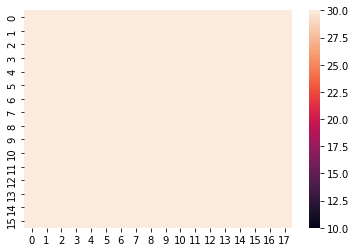

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_190445.jpg


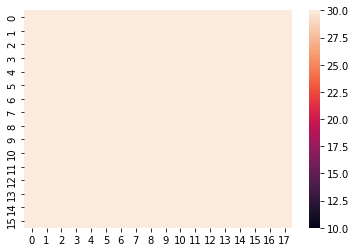

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_010109.jpg


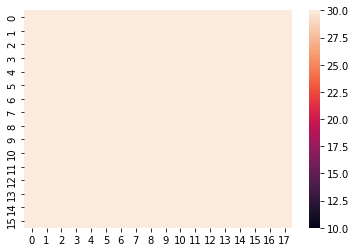

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_215300.jpg


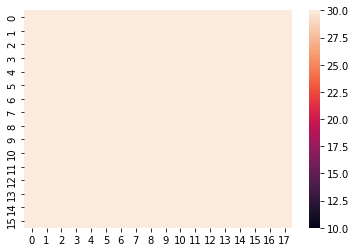

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_113740.jpg


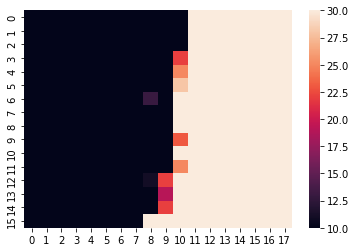

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_181802.jpg


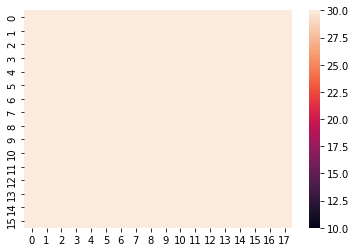

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_013305.jpg


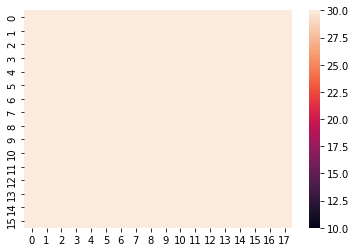

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_132927.jpg


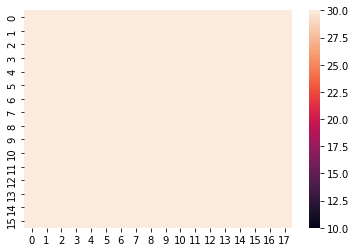

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_213701.jpg


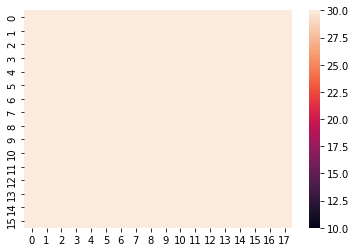

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_135601.jpg


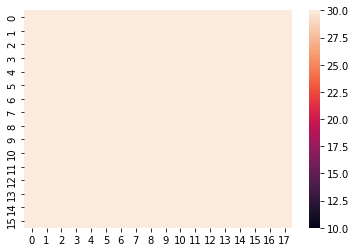

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_165503.jpg


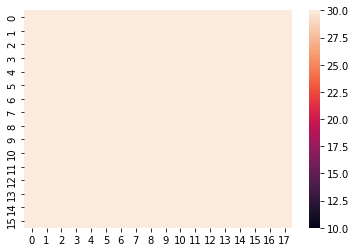

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_220858.jpg


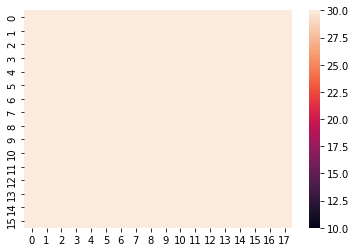

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_050142.jpg


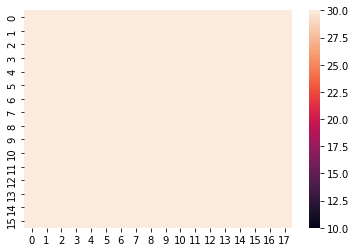

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_111358.jpg


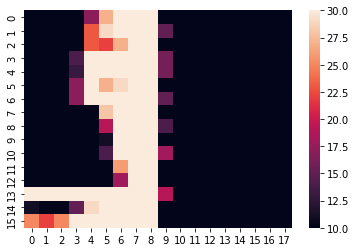

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_002411.jpg


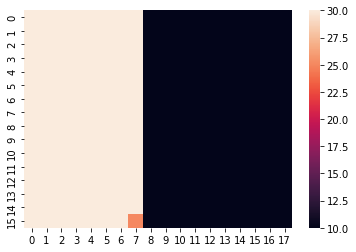

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_092637.jpg


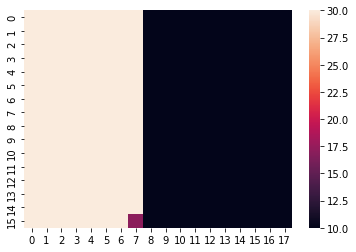

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_042010.jpg


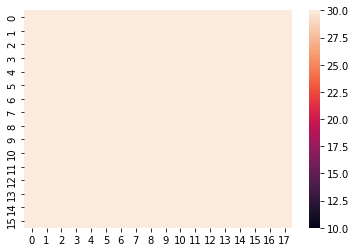

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_144857.jpg


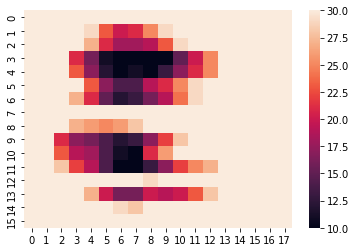

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_165133.jpg


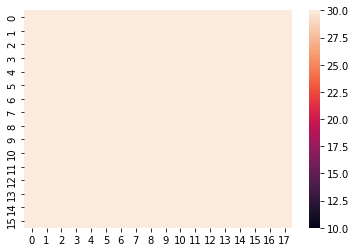

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_230734.jpg


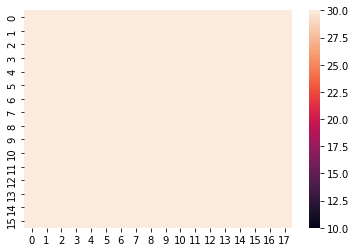

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_083125.jpg


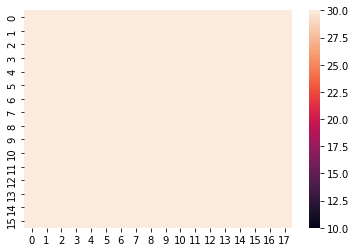

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_134725.jpg


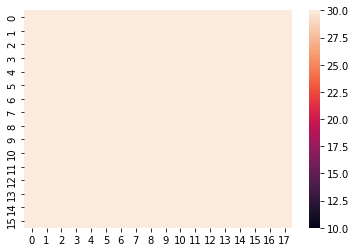

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_121301.jpg


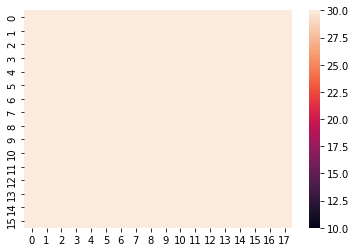

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_194717.jpg


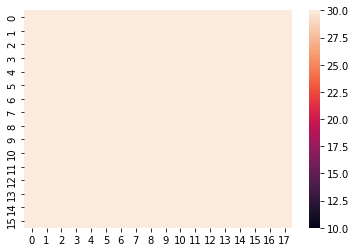

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_172139.jpg


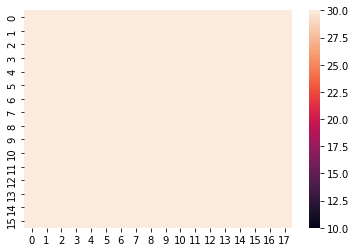

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211231_065309.jpg


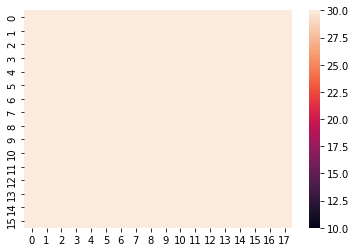

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_131654.jpg


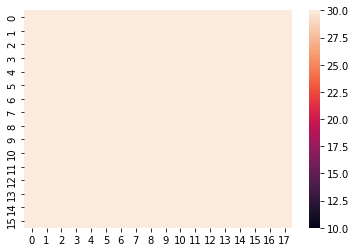

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_092740.jpg


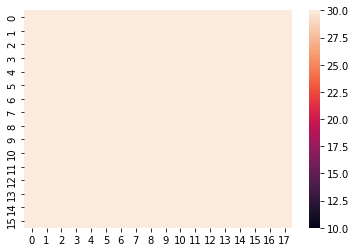

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_083329.jpg


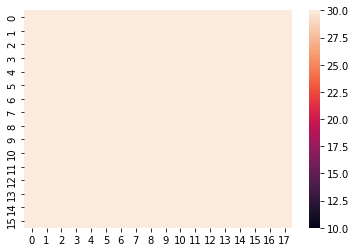

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_042412.jpg


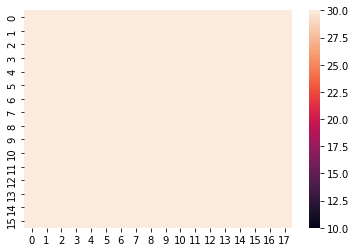

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_042323.jpg


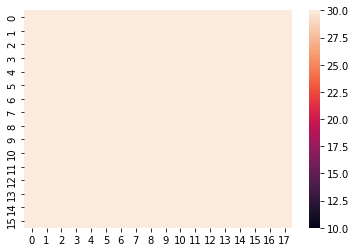

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211227_224644.jpg


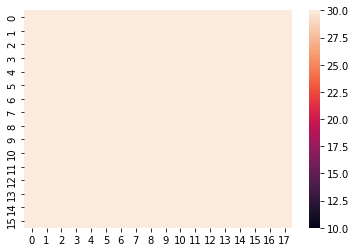

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_130355.jpg


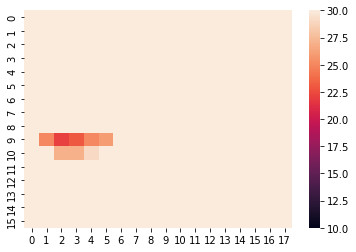

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_035502.jpg


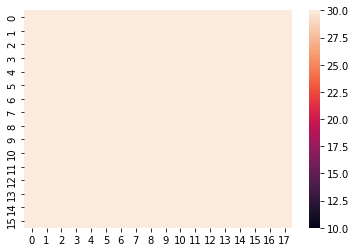

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_235721.jpg


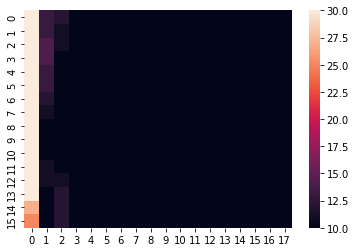

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_102506.jpg


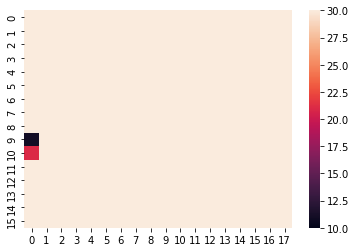

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_070300.jpg


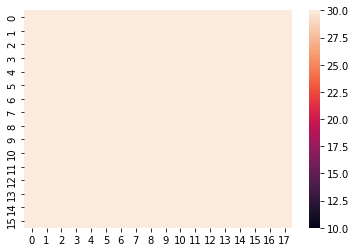

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_171101.jpg


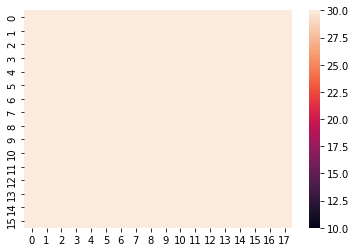

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_124653.jpg


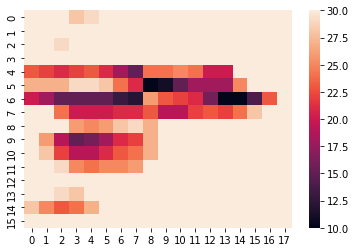

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_125414.jpg


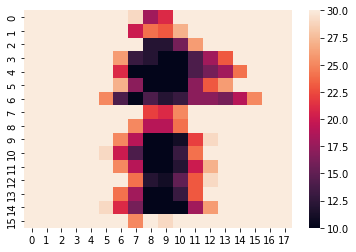

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_085246.jpg


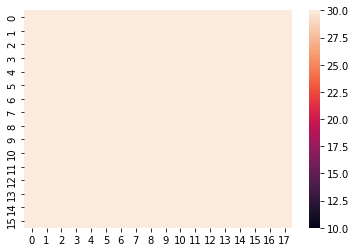

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_164944.jpg


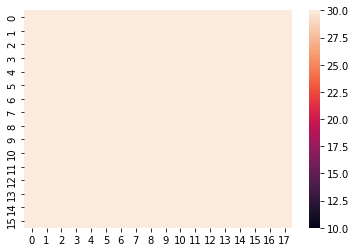

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_121456.jpg


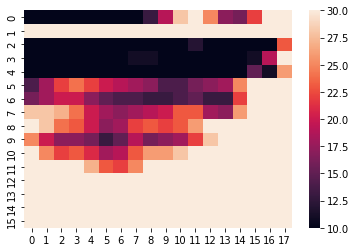

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_235532.jpg


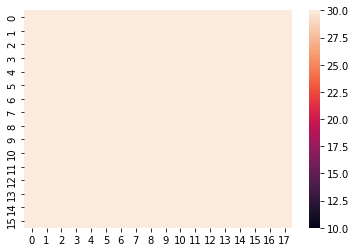

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_192152.jpg


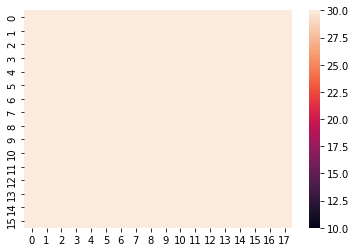

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_202746.jpg


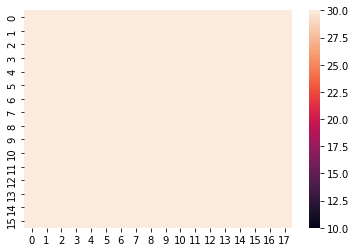

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_140448.jpg


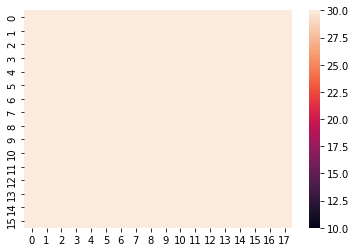

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211227_185629.jpg


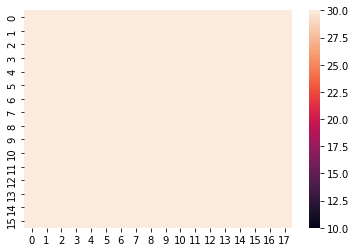

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_135804.jpg


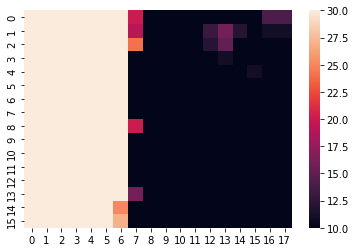

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_023654.jpg


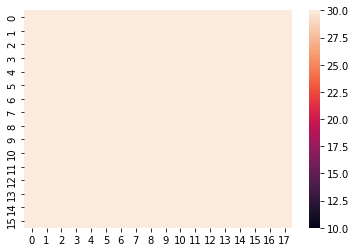

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_134524.jpg


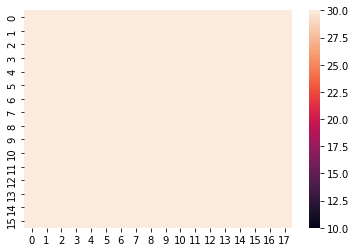

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_135409.jpg


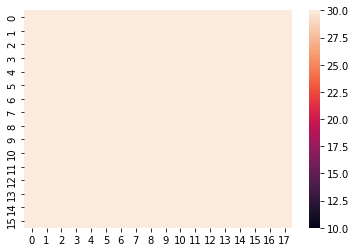

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_133538.jpg


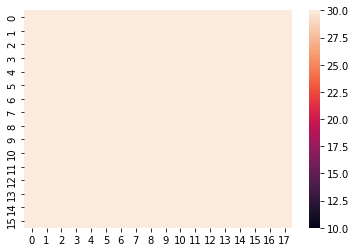

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220106_161803.jpg


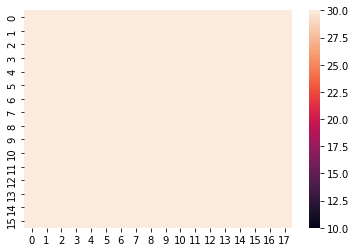

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_173409.jpg


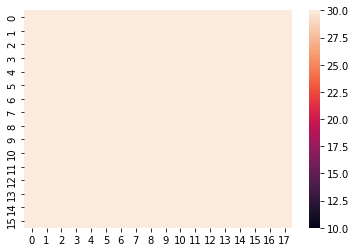

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_104749.jpg


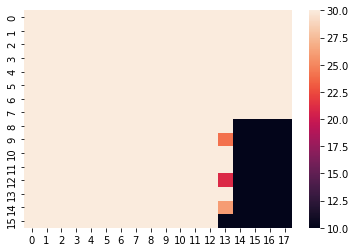

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_061829.jpg


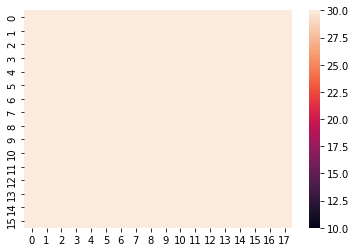

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_084638.jpg


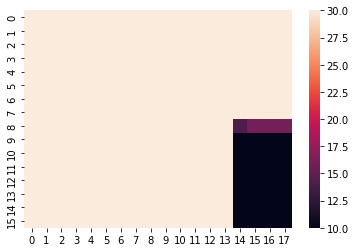

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_200111.jpg


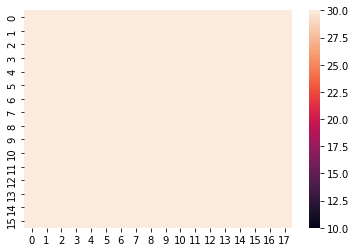

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_190250.jpg


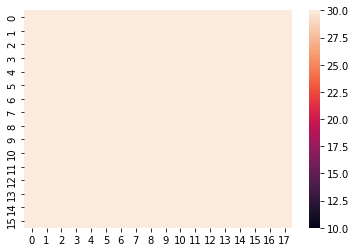

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_055350.jpg


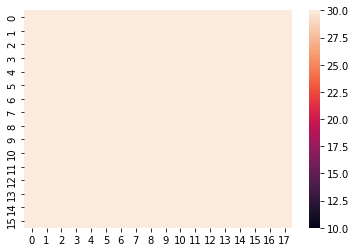

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_053727.jpg


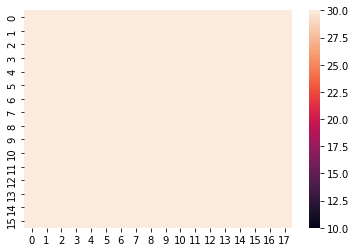

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_031411.jpg


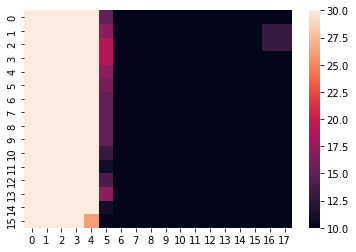

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_114819.jpg


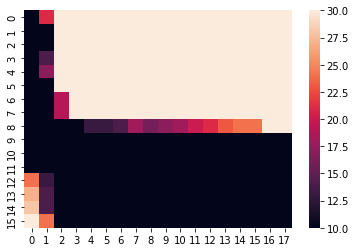

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_065023.jpg


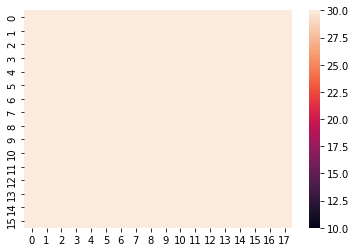

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_215500.jpg


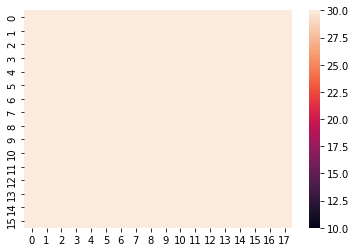

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_083152.jpg


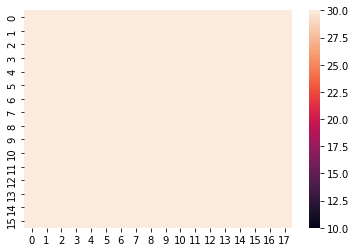

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_011147.jpg


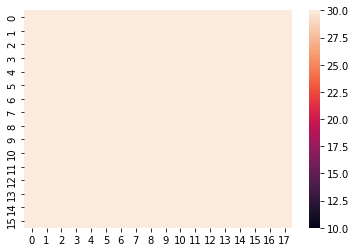

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220102_072257.jpg


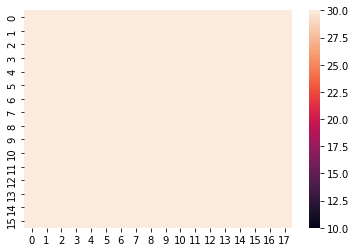

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_120053.jpg


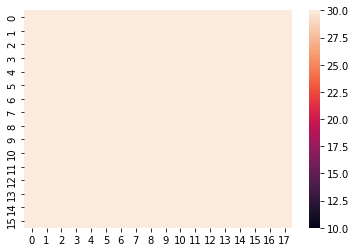

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_012600.jpg


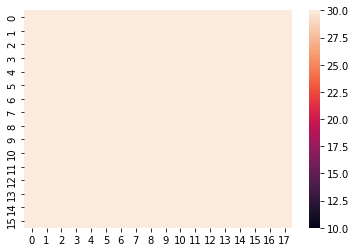

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_034609.jpg


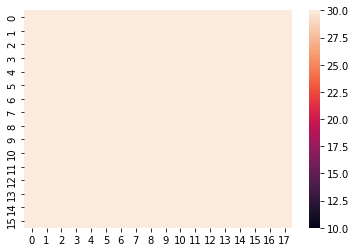

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211231_093525.jpg


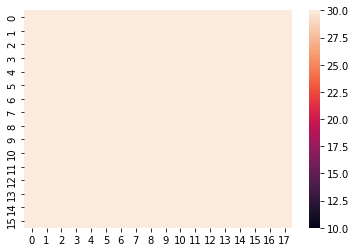

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_125536.jpg


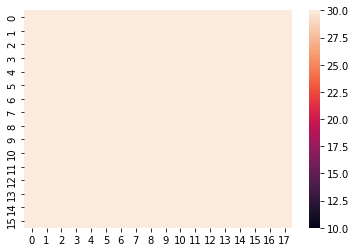

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_051115.jpg


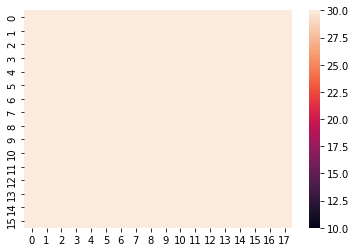

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_203824.jpg


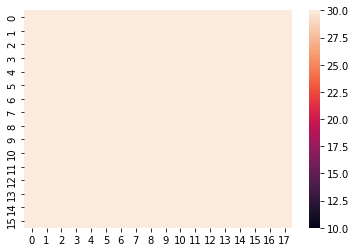

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_160152.jpg


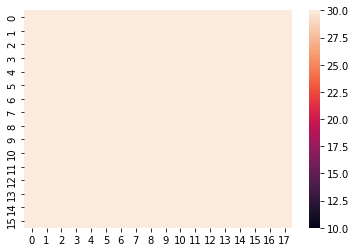

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_210147.jpg


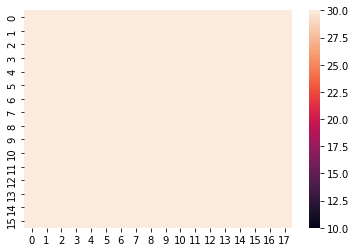

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_003809.jpg


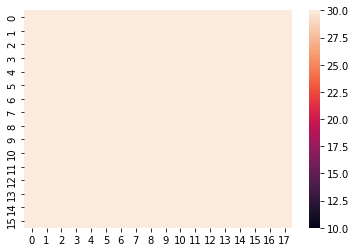

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_183859.jpg


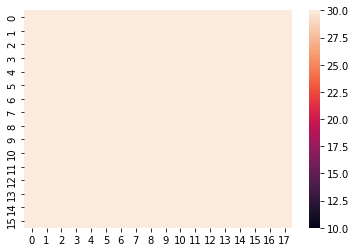

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_195036.jpg


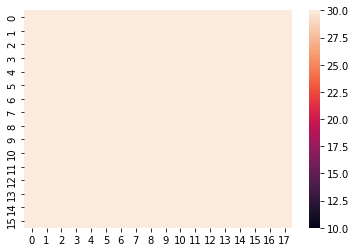

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_234850.jpg


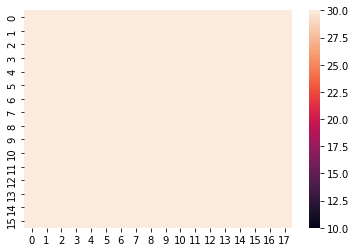

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_110844.jpg


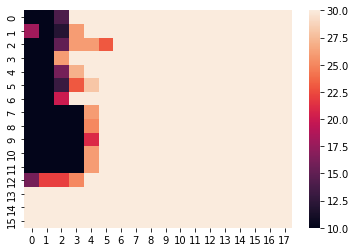

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_125326.jpg


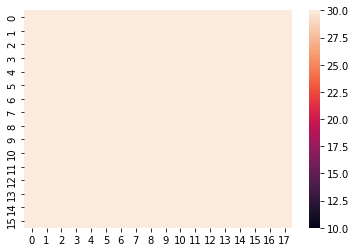

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_175530.jpg


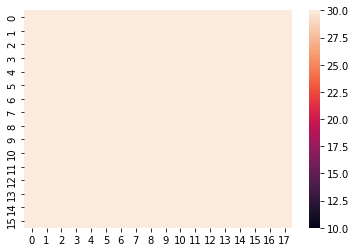

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_132050.jpg


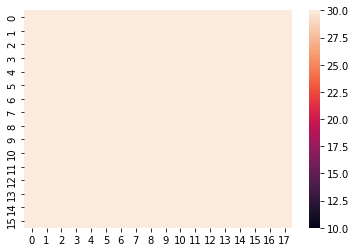

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_211721.jpg


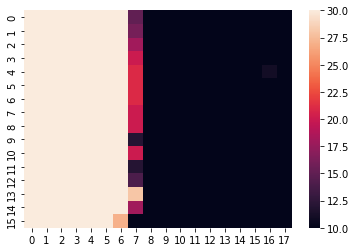

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_080132.jpg


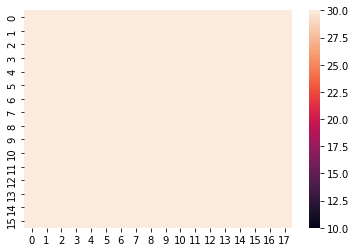

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_110739.jpg


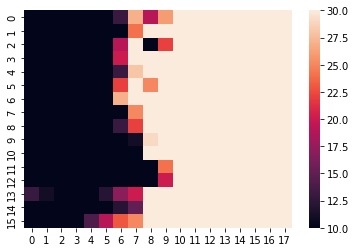

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_034942.jpg


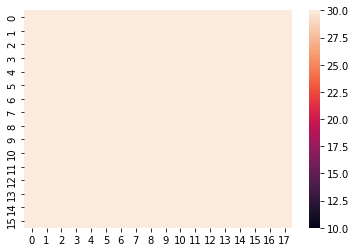

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_170729.jpg


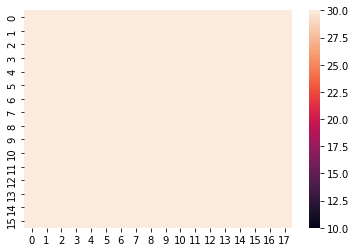

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_154218.jpg


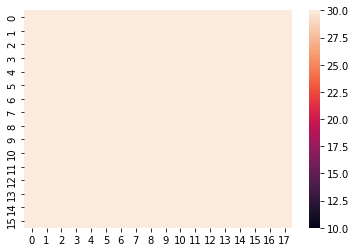

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_174640.jpg


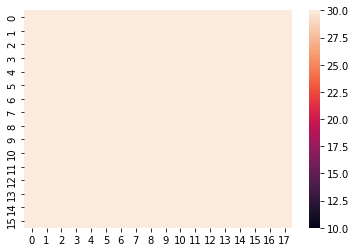

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_170056.jpg


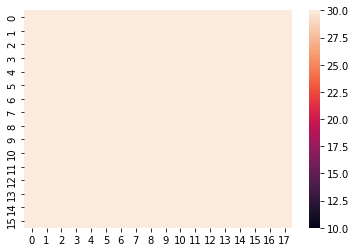

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_161750.jpg


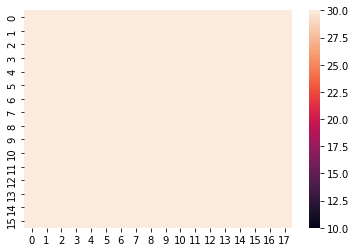

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_112426.jpg


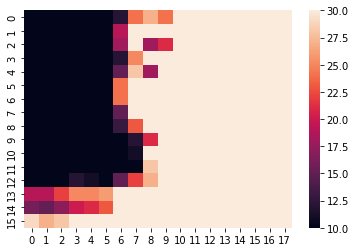

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_021404.jpg


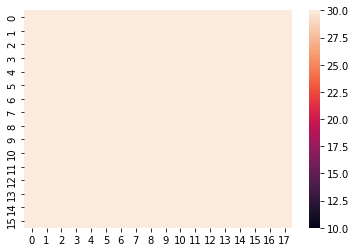

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_014904.jpg


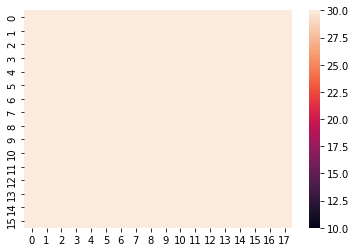

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_231253.jpg


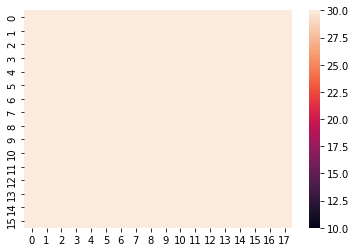

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_163535.jpg


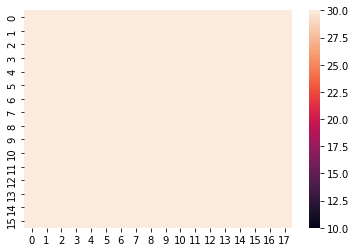

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_163016.jpg


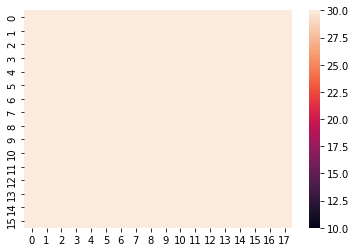

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_115702.jpg


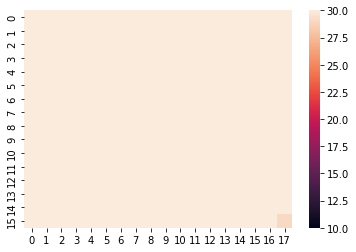

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_204351.jpg


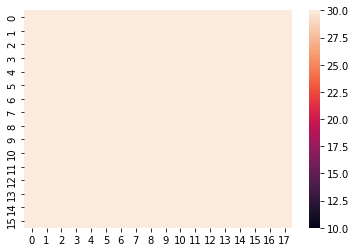

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_162308.jpg


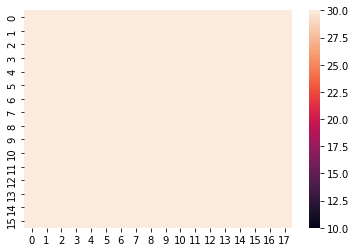

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_041245.jpg


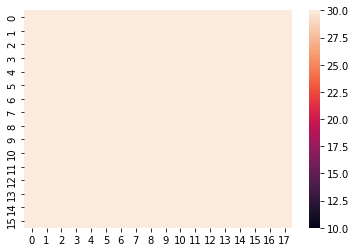

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_191004.jpg


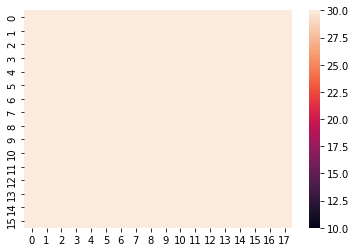

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_041804.jpg


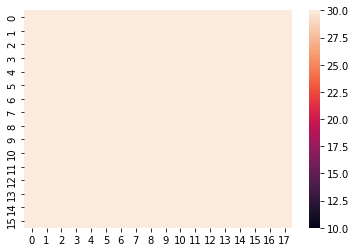

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211228_071938.jpg


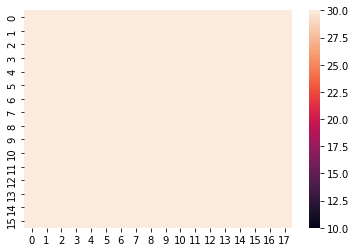

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_204946.jpg


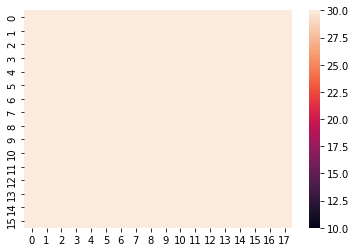

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_195236.jpg


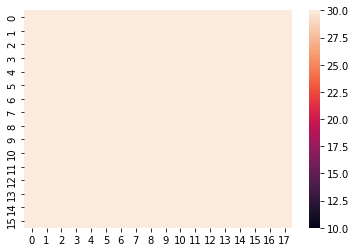

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_111818.jpg


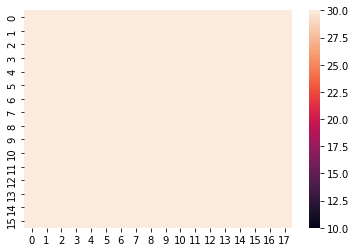

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_015335.jpg


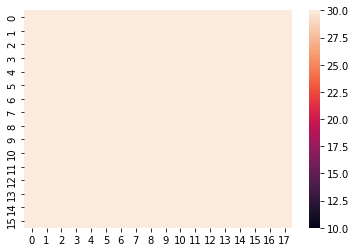

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_204432.jpg


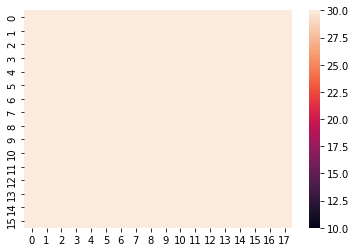

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_041620.jpg


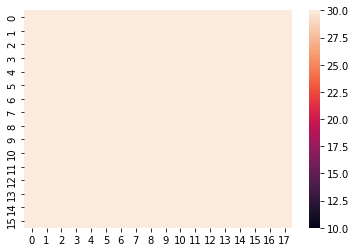

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_125947.jpg


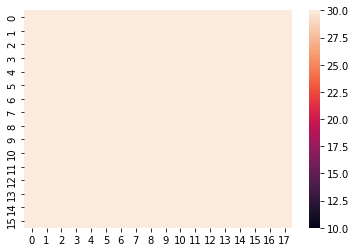

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_075933.jpg


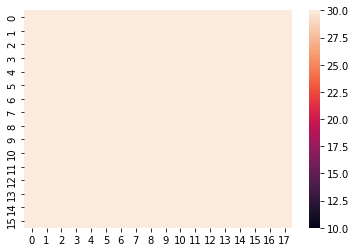

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_173738.jpg


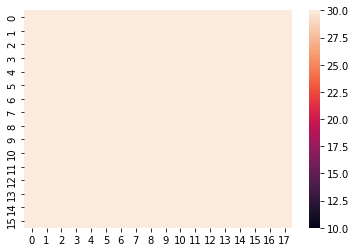

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_090844.jpg


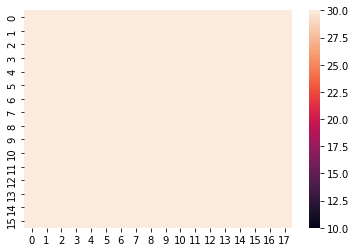

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_090522.jpg


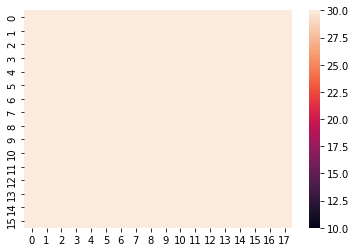

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_120106.jpg


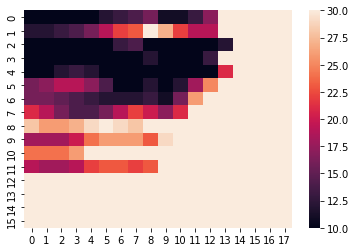

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_145945.jpg


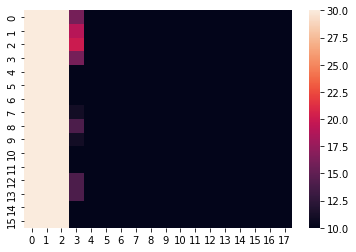

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_141527.jpg


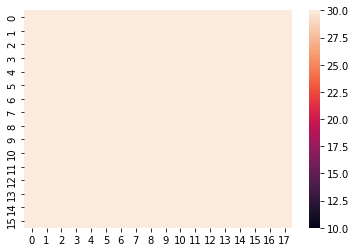

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_153026.jpg


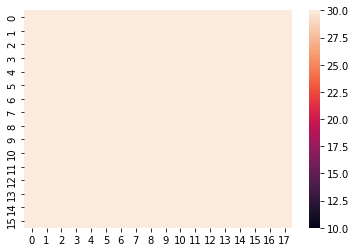

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_203919.jpg


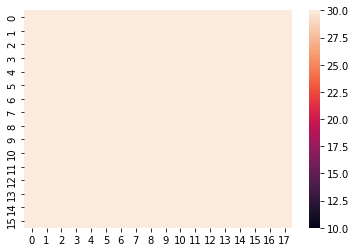

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_005406.jpg


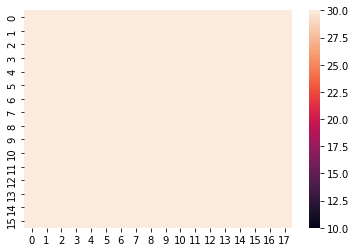

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_151359.jpg


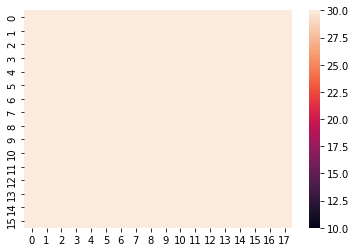

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_134206.jpg


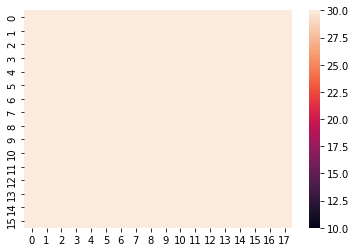

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_194700.jpg


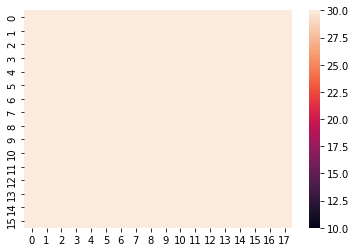

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_142234.jpg


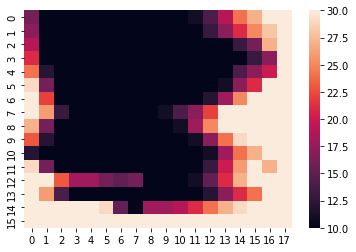

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_000239.jpg


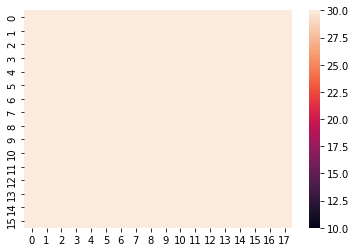

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_125933.jpg


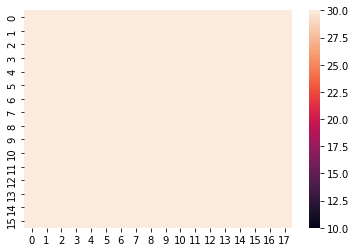

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220105_054627.jpg


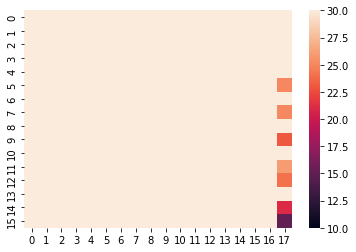

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_002354.jpg


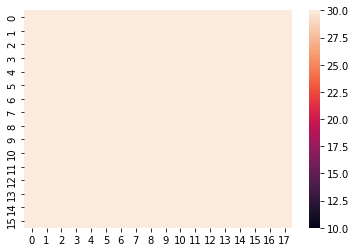

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_095119.jpg


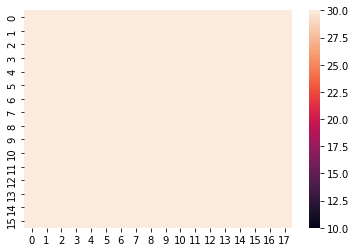

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_212620.jpg


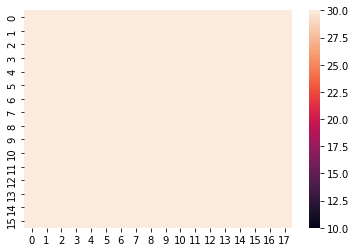

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_052001.jpg


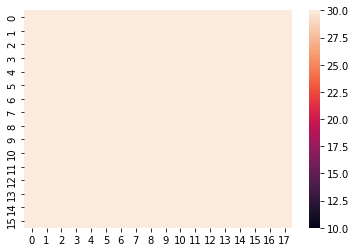

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_103912.jpg


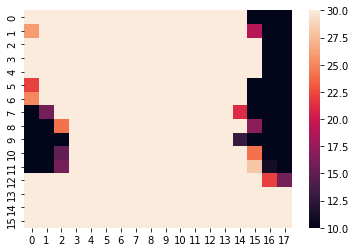

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220107_024107.jpg


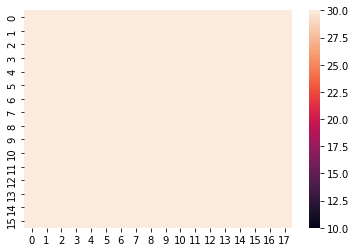

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_145241.jpg


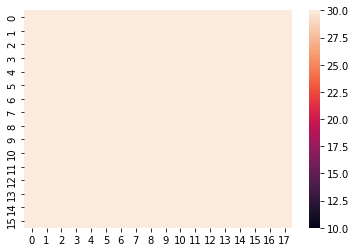

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_071140.jpg


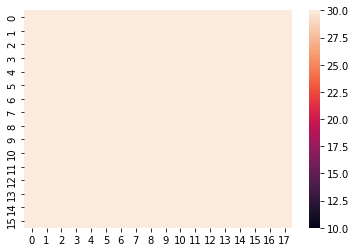

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_002730.jpg


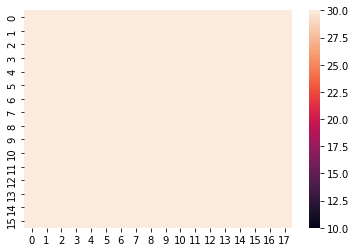

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_030333.jpg


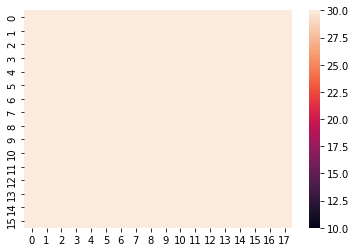

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_025629.jpg


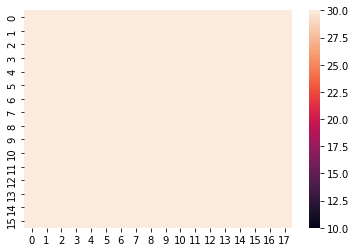

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_143124.jpg


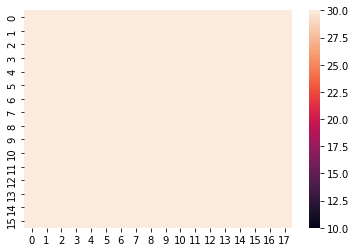

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_084926.jpg


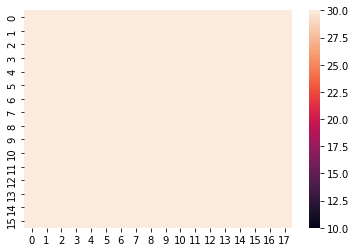

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_115857.jpg


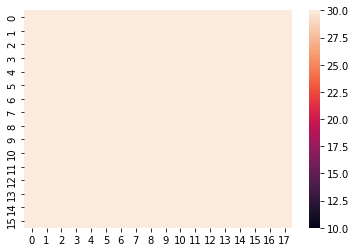

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_091600.jpg


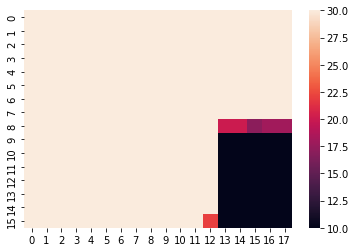

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_113221.jpg


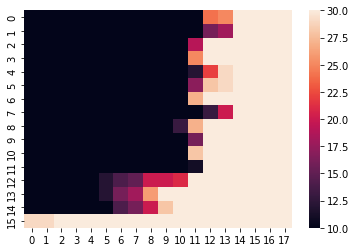

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_020250.jpg


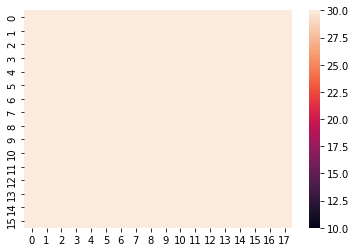

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_210502.jpg


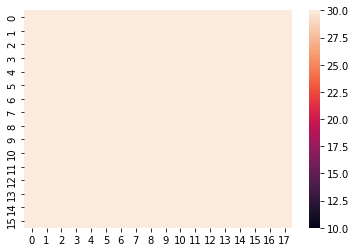

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_202432.jpg


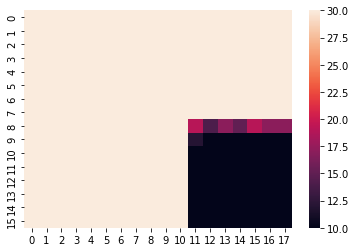

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220103_045537.jpg


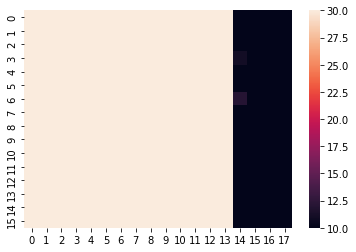

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_154737.jpg


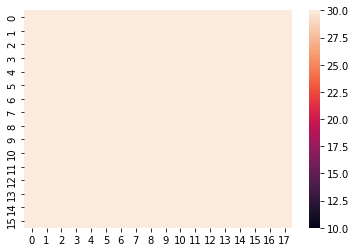

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_233047.jpg


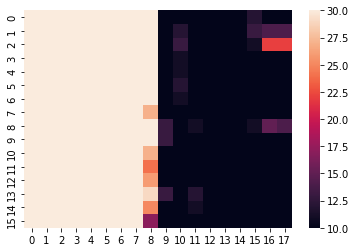

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_214740.jpg


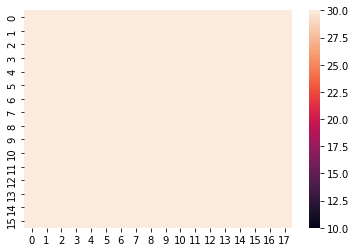

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_225134.jpg


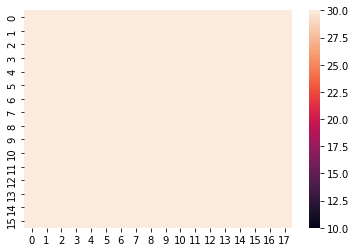

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_013727.jpg


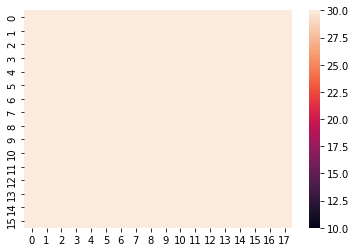

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_100350.jpg


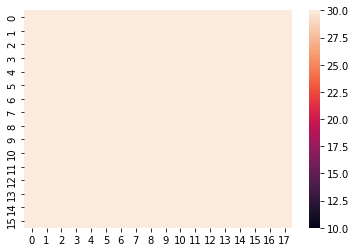

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_083849.jpg


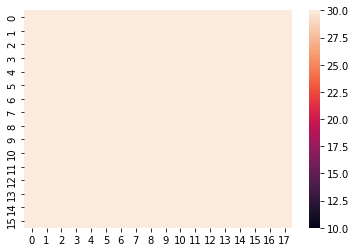

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211217_170625.jpg


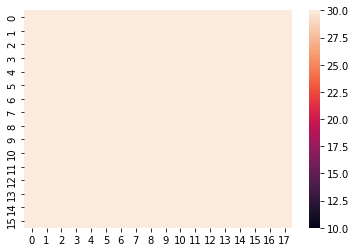

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_090325.jpg


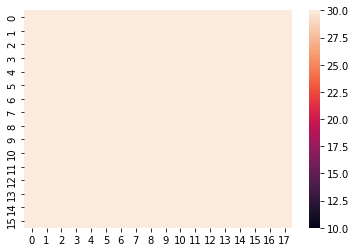

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_014153.jpg


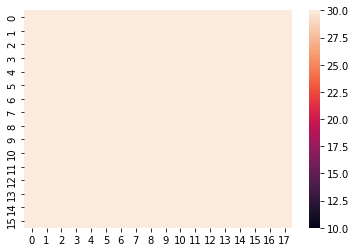

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_022057.jpg


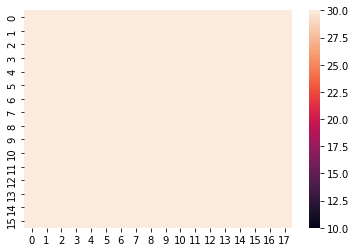

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_064702.jpg


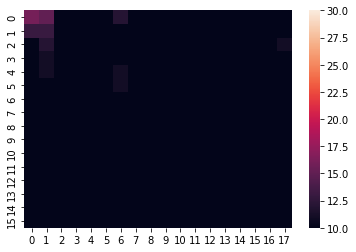

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_065221.jpg


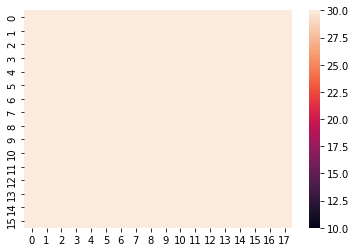

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_224055.jpg


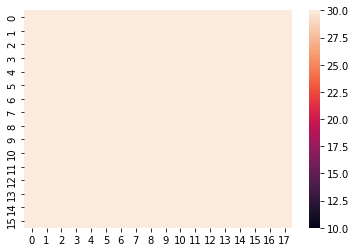

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_025110.jpg


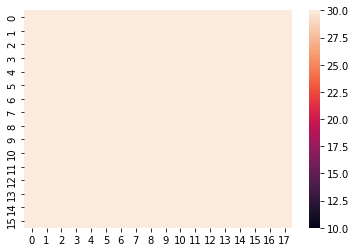

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_123745.jpg


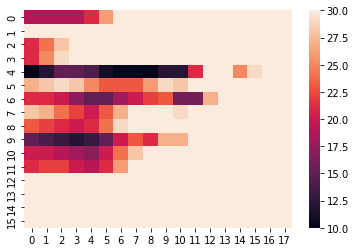

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_145800.jpg


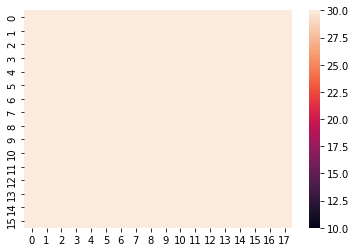

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_063426.jpg


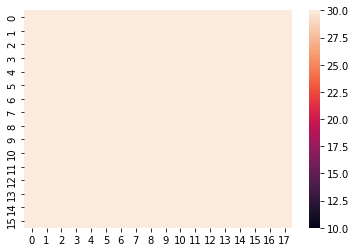

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_201354.jpg


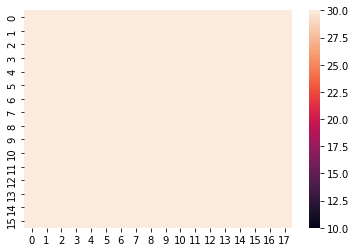

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_034424.jpg


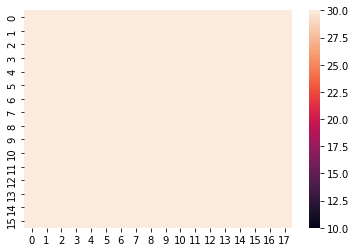

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_113417.jpg


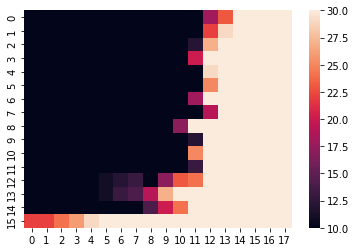

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_193120.jpg


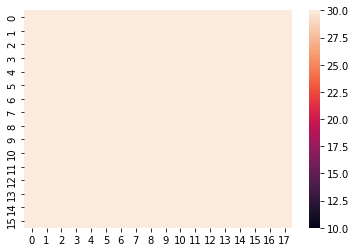

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_155820.jpg


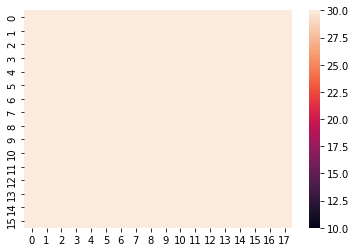

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_235012.jpg


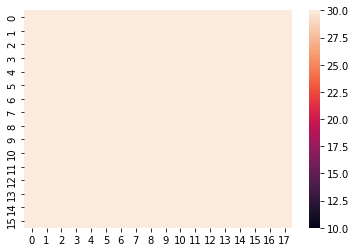

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_213342.jpg


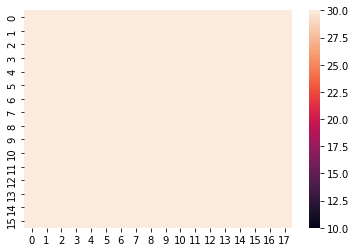

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_212030.jpg


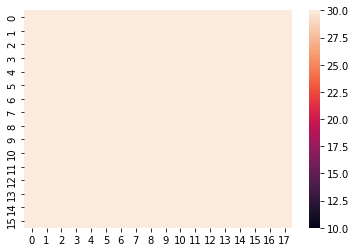

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_144203.jpg


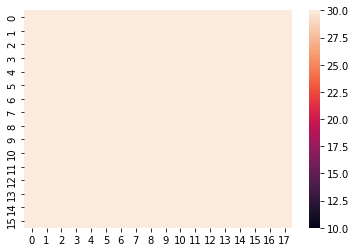

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_000345.jpg


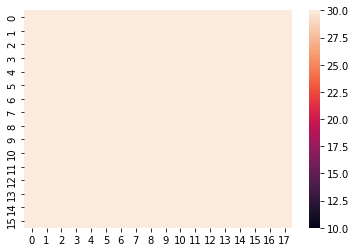

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_091923.jpg


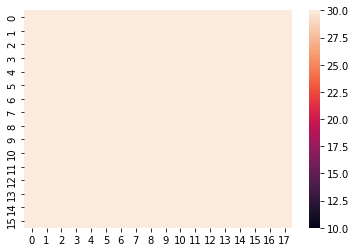

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_100200.jpg


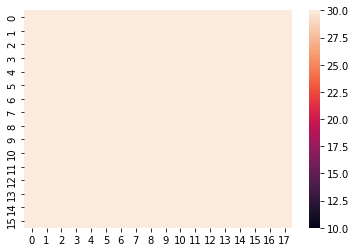

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_015238.jpg


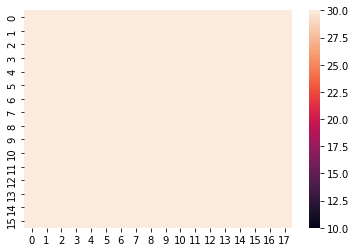

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_133128.jpg


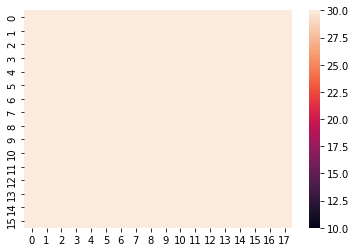

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_052154.jpg


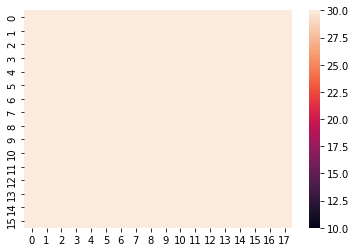

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_112337.jpg


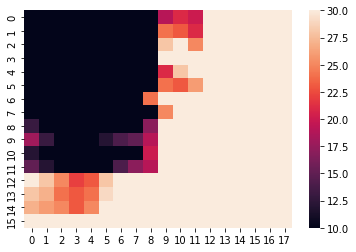

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_021019.jpg


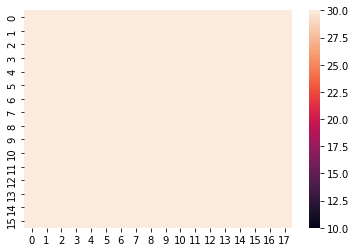

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220109_172451.jpg


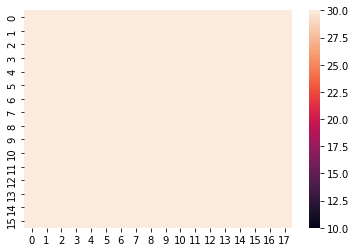

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_182831.jpg


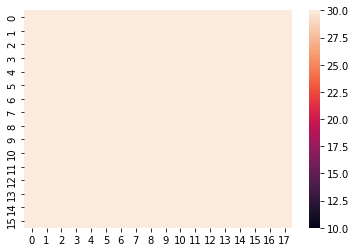

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_181649.jpg


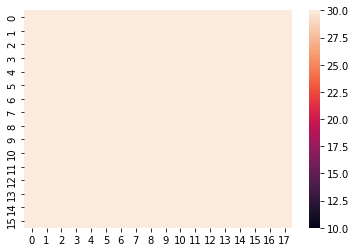

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_062348.jpg


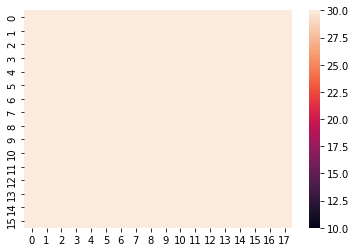

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220101_165921.jpg


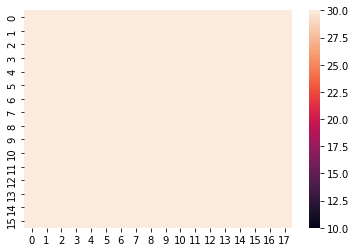

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220112_001650.jpg


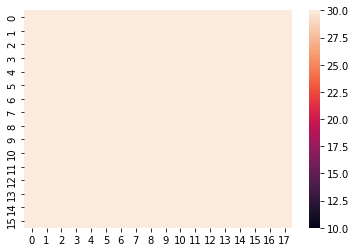

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_145113.jpg


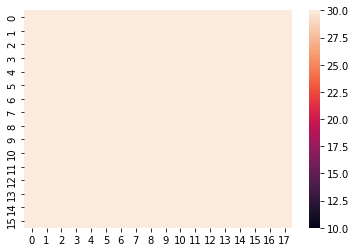

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20211229_051341.jpg


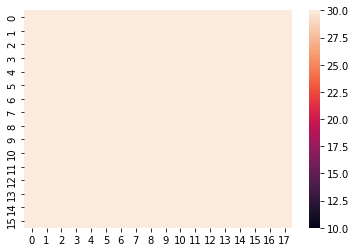

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220108_180713.jpg


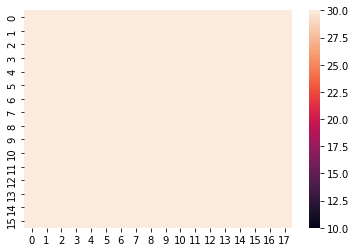

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220113_105141.jpg


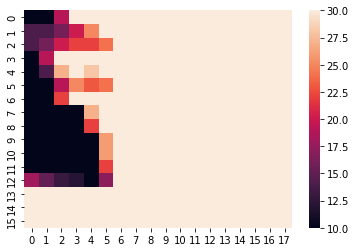

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_132213.jpg


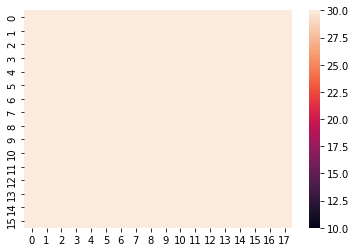

/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected/data_20220111_033704.jpg


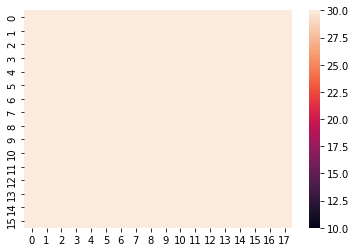

In [6]:
# fpath = '/proj/NARO/sonoda/noken/noken_0_50_selected'
fpath = '/proj/NARO/sonoda/noken/Noken_csv_16_18_25_selected'

files = glob.glob(fpath+'/*.jpg')
for file in files:
    heatmap_ndarray = np.array(Image.open(file))
#     heatmap_ndarray = heatmap_ndarray*50/255
    print('=====================================')
    print(file)
    seaborn.heatmap(heatmap_ndarray, vmin=10, vmax=30)
    plt.show()

In [ ]:
#できなかった
# import xlrd
# import pprint

# wb = xlrd.open_workbook('noken_noise_list.xlsx')
# sheet = wb.sheet_by_name('Sheet1')
# cell = sheet.col(3)
# col_values = sheet.col_values[4:129]
# print(col_values)
# # noken_noise_list_df = noken_noise_list.xlsx.parse()
# # noken_noise_listdf.head(10)
# # os.remove('temp/file.txt')

In [ ]:
remove_fi

In [ ]:
remove_file_list = ['data_20220113_114456.jpg', 
                   'data_20220112_153659.jpg', 
                   'data_20220111_201705.jpg', 
                   'data_20220112_063945.jpg', 
                   'data_20220111_000226.jpg', 
                   'data_20220112_104431.jpg', 
                   'data_20220112_115338.jpg', 
                   'data_20220101_140641.jpg', 
                   'data_20220101_141155.jpg', 
                   'data_20220113_115015.jpg', 
                   'data_20220113_091041.jpg', 
                   'data_20220113_115534.jpg', 
                   'data_20220112_093002.jpg', 
                   'data_20220113_123810.jpg', 
                   'data_20220105_025901.jpg', 
                   'data_20220112_112701.jpg', 
                   'data_20220107_142247.jpg', 
                   'data_20220112_170211.jpg', 
                   'data_20220112_003250.jpg', 
                   'data_20220101_120620.jpg', 
                   'data_20220113_105701.jpg', 
                   'data_20220112_161418.jpg', 
                   'data_20220113_111259.jpg', 
                   'data_20220112_120416.jpg', 
                   'data_20220106_132520.jpg', 
                   'data_20220112_222658.jpg', 
                   'data_20220113_075054.jpg', 
                   'data_20220113_103544.jpg', 
                   'data_20220101_185956.jpg', 
                   'data_20211217_180654.jpg', 
                   'data_20211217_174456.jpg', 
                   'data_20211231_073501.jpg', 
                   'data_20220113_071858.jpg', 
                   'data_20220103_182146.jpg', 
                   'data_20220113_112857.jpg'
                   ]

In [ ]:
for jpg in remove_file_list:
    remove_path = '/proj/NARO/sonoda/noken/noken_0_50_selected/' + jpg
    os.remove(remove_path)
    

In [ ]:
remove_file_list = [
    'data_20220101_114522.jpg', 
    'data_20220112_083648.jpg', 
    'data_20220113_082809.jpg',
    'data_20220106_001501.jpg', 
    'data_20220113_071338.jpg', 
    'data_20220106_072925.jpg', 
    'data_20220111_205943.jpg', 
    'data_20220113_093715.jpg', 
    'data_20220112_141159.jpg', 
    'data_20220101_190510.jpg', 
    'data_20220112_122015.jpg', 
    'data_20220111_204344.jpg', 
    'data_20220113_033530.jpg', 
    'data_20220113_015422.jpg', 
    'data_20220101_113454.jpg', 
    'data_20220112_091404.jpg', 
    'data_20220101_121134.jpg', 
    'data_20220107_081055.jpg', 
    'data_20220112_104949.jpg', 
    'data_20220112_072218.jpg',
    'data_20220113_085444.jpg', 
    'data_20220113_012226.jpg', 
    'data_20220111_234452.jpg', 
    'data_20220113_104103.jpg', 
    'data_20220113_065740.jpg', 
    'data_20220112_060231.jpg', 
    'data_20220113_151229.jpg', 
    'data_20220112_082610.jpg', 
    'data_20220111_113546.jpg', 
    'data_20220112_084727.jpg', 
    'data_20220109_095446.jpg', 
    'data_20220102_125240.jpg', 
    'data_20220104_111703.jpg', 
    'data_20220102_041437.jpg', 
    'data_20220113_150151.jpg', 
    'data_20220101_111912.jpg', 
    'data_20220112_094041.jpg', 
    'data_20220112_140639.jpg', 
    'data_20220112_094600.jpg', 
    'data_20220113_141401.jpg', 
    'data_20220112_123054.jpg', 
    'data_20220101_135612.jpg', 
    'data_20211228_051913.jpg', 
    'data_20220101_191537.jpg', 
    'data_20220112_210706.jpg', 
    'data_20220101_151957.jpg', 
    'data_20220113_121131.jpg', 
    'data_20220112_080453.jpg', 
    'data_20211229_114637.jpg', 
    'data_20220113_075613.jpg', 
    'data_20220105_160300.jpg', 
    'data_20220112_113740.jpg', 
    'data_20220101_111358.jpg', 
    'data_20220109_002411.jpg', 
    'data_20220113_092637.jpg', 
    'data_20220108_083125.jpg', 
    'data_20220103_092740.jpg', 
    'data_20220113_083329.jpg', 
    'data_20220112_235721.jpg', 
    'data_20220112_085246.jpg', 
    'data_20220112_121456.jpg', 
    'data_20220113_135804.jpg', 
    'data_20220101_104749.jpg', 
    'data_20220102_084638.jpg', 
    'data_20220113_031411.jpg', 
    'data_20220112_114819.jpg', 
    'data_20220107_083152.jpg', 
    'data_20211231_093525.jpg', 
    'data_20220111_125536.jpg', 
    'data_20220111_160152.jpg', 
    'data_20211228_211721.jpg', 
    'data_20220113_110739.jpg', 
    'data_20220111_115702.jpg', 
    'data_20220112_075933.jpg', 
    'data_20220112_090844.jpg', 
    'data_20220113_090522.jpg', 
    'data_20220112_145945.jpg', 
    'data_20220112_142234.jpg', 
    'data_20220105_054627.jpg', 
    'data_20220112_095119.jpg', 
    'data_20220112_103912.jpg', 
    'data_20220113_091600.jpg', 
    'data_20220112_113221.jpg', 
    'data_20220112_202432.jpg', 
    'data_20220103_045537.jpg', 
    'data_20220112_233047.jpg', 
    'data_20220113_083849.jpg', 
    'data_20220113_064702.jpg', 
    'data_20220113_113417.jpg', 
    'data_20220112_091923.jpg',
    'data_20220113_112337.jpg'
]

In [ ]:
for jpg in remove_file_list:
    remove_path = '/proj/NARO/sonoda/noken/noken_0_50_selected/' + jpg
    os.remove(remove_path)